<a href="https://colab.research.google.com/github/LinusRosales/T-NPS/blob/main/Q3_NPS.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
# from google.colab import files
# uploaded = files.upload()

In [2]:
# !pip install pyarrow

In [3]:
# !pip install --upgrade --force-reinstall pandas pyarrow
# import pandas as pd

In [4]:
# import IPython
# IPython.Application.instance().kernel.do_shutdown(True)

In [5]:
# !pip uninstall -y pandas pyarrow
# !pip cache purge
# !pip install --upgrade pandas pyarrow

In [6]:
import pandas as pd
import re
n = 126

raw_df = pd.read_csv('Q3 T-NPS.csv')
df = pd.read_csv('Q3 T-NPS.csv', usecols=range(n))
pd.set_option('display.max_columns', None)

In [7]:
df.columns

Index(['Respondent ID', 'Collector ID', 'Start Date', 'End Date', 'IP Address',
       'Email Address', 'First Name', 'Last Name', 'Custom Data 1', 'rq_flag',
       ...
       'Unnamed: 116', 'Unnamed: 117', 'Unnamed: 118', 'Unnamed: 119',
       'Unnamed: 120', 'Unnamed: 121', 'Unnamed: 122', 'Unnamed: 123',
       'Unnamed: 124',
       'Which bank do you consider as your main primary bank?Aling bangko ang itinuturing mong pangunahing bangko?'],
      dtype='object', length=126)

# Profile Understanding

In [8]:
raw_df.head(1)

Respondent ID  Collector ID Start Date End Date IP Address  Email Address  \
0            NaN           NaN        NaN      NaN        NaN            NaN   

   First Name  Last Name  Custom Data 1  rq_flag language  \
0         NaN        NaN            NaN      NaN      NaN   

  Before we proceed do you agree to the terms and conditions, and to provide your full, honest, and candid feedback?Bago tayo magpatuloy, sumasang-ayon ka ba sa mga tuntunin at kondisyon at handang magbigay ng iyong buong, tapat, at bukas na feedback?  \
0                                           Response                                                                                                                                                                                                          

  Please provide the email address where you received this survey invite.(Pakibigay ang email address kung saan mo nareceive ang survey na ito.)  \
0                                Open-Ended Response                                                                                               

  Let us know your overall thoughts about GoTyme Bank.Ibahagi sa amin ang iyong overall na opinyon tungkol sa GoTyme Bank.  \
0                                Open-Ended Response                                                                         

  Which banks do you currently have an account with?Sa aling mga sumusunod bangko/e-wallet ang kasalukuyang mayroon kang account?  \
0                                  None of the above                                                                                

   Unnamed: 15                           Unnamed: 16 Unnamed: 17  \
0  BDO Unibank  BPI (Bank of the Philippine Islands)   Metrobank   

                    Unnamed: 18    Unnamed: 19 Unnamed: 20  \
0  Land Bank of the Philippines  Security Bank   UnionBank   

                                   Unnamed: 21 Unnamed: 22  \
0  RCBC (Rizal Commercial Banking Corporation)  China Bank   

                      Unnamed: 23    Unnamed: 24  Unnamed: 25 Unnamed: 26  \
0  PNB (Philippine National Bank)  EastWest Bank  GoTyme Bank   Maya Bank   

  Unnamed: 27 Unnamed: 28                                        Unnamed: 29  \
0  Tonik Bank   CIMB Bank  Overseas Bank (e.g., HSBC, Citibank, Standard ...   

  Unnamed: 30 Unnamed: 31 Unnamed: 32  \
0     Seabank     OwnBank       GCash   

  Please select your top 5 primary banks/e-wallet.Piliin ang iyong top 5 na pangunahing bangko/e-wallet.  \
0                                  None of the above                                                       

   Unnamed: 34                           Unnamed: 35 Unnamed: 36  \
0  BDO Unibank  BPI (Bank of the Philippine Islands)   Metrobank   

                    Unnamed: 37    Unnamed: 38 Unnamed: 39  \
0  Land Bank of the Philippines  Security Bank   UnionBank   

                                   Unnamed: 40 Unnamed: 41  \
0  RCBC (Rizal Commercial Banking Corporation)  China Bank   

                      Unnamed: 42    Unnamed: 43  Unnamed: 44 Unnamed: 45  \
0  PNB (Philippine National Bank)  EastWest Bank  GoTyme Bank   Maya Bank   

  Unnamed: 46 Unnamed: 47                                        Unnamed: 48  \
0  Tonik Bank   CIMB Bank  Overseas Bank (e.g., HSBC, Citibank, Standard ...   

  Unnamed: 49 Unnamed: 50 Unnamed: 51  \
0     Seabank     OwnBank       GCash   

  Please select your top 3 primary banks/e-wallet.Piliin ang iyong top 3 na pangunahing bangko/e-wallet.  \
0                                  None of the above                                                       

   Unnamed: 53                           Unnamed: 54 Unnamed: 55  \
0  BDO Unibank  BPI (Bank of the Philippine Islands)   Metrobank   

                    Unnamed: 56    Unnamed: 57 Unnamed: 58  \
0  Land Bank of the Philippines  Security Bank   UnionBank   

                                   Unnamed: 59 Unnamed: 60  \
0  RCBC (Rizal Commercial Banking Corporation)  China Bank   

**Rename/remove tagalog question**

In [9]:
df = df.rename(columns={
    'Before we proceed do you agree to the terms and conditions, and to provide your full, honest, and candid feedback?Bago tayo magpatuloy, sumasang-ayon ka ba sa mga tuntunin at kondisyon at handang magbigay ng iyong buong, tapat, at bukas na feedback?':
        'Before we proceed do you agree to the terms and conditions, and to provide your full, honest, and candid feedback?',

    'Please provide the email address where you received this survey invite.(Pakibigay ang email address kung saan mo nareceive ang survey na ito.)':
        'Please provide the email address where you received this survey invite.',

    'Let us know your overall thoughts about GoTyme Bank.Ibahagi sa amin ang iyong overall na opinyon tungkol sa GoTyme Bank.':
        'Let us know your overall thoughts about GoTyme Bank.',

    'Which banks do you currently have an account with?Sa aling mga sumusunod bangko/e-wallet ang kasalukuyang mayroon kang account?':
        'Which banks do you currently have an account with?',

    'Please select your top 5 primary banks/e-wallet.Piliin ang iyong top 5 na pangunahing bangko/e-wallet.':
        'Please select your top 5 primary banks/e-wallet.',

    'Please select your top 3 primary banks/e-wallet.Piliin ang iyong top 3 na pangunahing bangko/e-wallet.':
        'Please select your top 3 primary banks/e-wallet.',

    'How much is your usual balance in each bank?Magkano ang usual balance na nilalagay mo sa bawat bangko?':
        'How much is your usual balance in each bank?',

    'How much do you usually spend per month using your primary bank? (Include expenses like bills payment, transfers, online/offline purchases, subscriptions, etc.)Magkano ang karaniwan mong ginagastos bawat buwan gamit ang iyong pangunahing bangko?':
        'How much do you usually spend per month using your primary bank? (Include expenses like bills payment, transfers, online/offline purchases, subscriptions, etc.)',

    'How many transactions do you perform per month using your primary bank? (Include fund transfers, ATM withdrawals, bills payments, purchases, loan payments, etc.)Ilang transaksyon ang karaniwan mong ginagawa bawat buwan gamit ang iyong pangunahing bangko?':
        'How many transactions do you perform per month using your primary bank? (Include fund transfers, ATM withdrawals, bills payments, purchases, loan payments, etc.)',

    'Which bank do you consider as your main primary bank?Aling bangko ang itinuturing mong pangunahing bangko?':
        'Which bank do you consider as your main primary bank?'
})


In [10]:
df.columns

Index(['Respondent ID', 'Collector ID', 'Start Date', 'End Date', 'IP Address',
       'Email Address', 'First Name', 'Last Name', 'Custom Data 1', 'rq_flag',
       ...
       'Unnamed: 116', 'Unnamed: 117', 'Unnamed: 118', 'Unnamed: 119',
       'Unnamed: 120', 'Unnamed: 121', 'Unnamed: 122', 'Unnamed: 123',
       'Unnamed: 124',
       'Which bank do you consider as your main primary bank?'],
      dtype='object', length=126)

**Remove unnecessary columns**

In [11]:
df.drop(columns=['Email Address', 'First Name', 'Last Name', 'Custom Data 1'], inplace=True)

**Respondent ID to str**

In [12]:
df['Respondent ID'] = df['Respondent ID'].astype(str)

**Forward Fill columns**

In [13]:
from collections import defaultdict

def clean_and_merge_columns(df):
    # Fix unnamed or blank columns
    df.columns = [col if not (pd.isna(col) or str(col).startswith("Unnamed")) else None for col in df.columns]
    df.columns = pd.Series(df.columns).fillna(method='ffill')

    return "forward filled columns"

In [14]:
clean_and_merge_columns(df)

/tmp/ipython-input-2089789250.py:6: FutureWarning: Series.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  df.columns = pd.Series(df.columns).fillna(method='ffill')


'forward filled columns'

**Combine column header and first row of data**

In [15]:
# Extract the first row as a list
label_row = df.iloc[0].tolist()

# Build new column names by combining column header and label
new_columns = []
for col, label in zip(df.columns, label_row):
      col_str = str(col).strip()
      label_str = str(label).strip() if pd.notna(label) and str(label).strip().lower() != "nan" else ""

      if label_str:
          new_col = f"{col_str} - {label_str}"
      else:
          new_col = col_str

      new_columns.append(new_col)

# Apply new column names
df.columns = new_columns

# Drop the label row
df = df.iloc[1:].reset_index(drop=True)

#Try converting columns to numeric where appropriate
df = df.apply(pd.to_numeric, errors='ignore')

/tmp/ipython-input-3239027907.py:24: FutureWarning: errors='ignore' is deprecated and will raise in a future version. Use to_numeric without passing `errors` and catch exceptions explicitly instead
  df = df.apply(pd.to_numeric, errors='ignore')


**Understand null**

In [16]:
pd.set_option('display.max_rows', None)

In [17]:
print(len(df))

2195


**Understand null of rq_flag**

In [18]:
df['rq_flag'].value_counts()

rq_flag
0.0    1400
1.0     383
Name: count, dtype: int64

In [19]:
print("Keep rq_flag")

Keep rq_flag


**Fill Null of first 122 columns**

In [20]:
df.iloc[:, :122] = df.iloc[:, :122].fillna("")
pass

/tmp/ipython-input-2491489263.py:1: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise in a future error of pandas. Value '0          
1          
2          
3          
4          
5          
6          
7          
8          
9          
10         
11         
12         
13         
14         
15         
16         
17         
18         
19         
20         
21         
22         
23         
24         
25         
26         
27         
28         
29         
30         
31         
32         
33         
34         
35         
36         
37         
38         
39         
40         
41         
42         
43         
44         
45         
46         
47         
48         
49         
50         
51         
52         
53         
54         
55         
56         
57         
58         
59         
60         
61         
62         
63         
64         
65         
66         
67         
68         
69         
70    

**Combine banks with <30 primary banks to a single other column**

In [21]:
OTHER_BANKS = "Other Banks (Metrobank, Security Bank, CIMB Bank, RCBC (Rizal Commercial Banking Corporation), China Bank, EastWest Bank, PNB (Philippine National Bank), Overseas Bank (e.g., HSBC, Citibank, Standard Chartered), Tonik Bank, OwnBank)"

In [22]:
# Count how many responses each bank has
bank_counts = df["Which bank do you consider as your main primary bank? - Response"].value_counts()

# Identify banks to group
threshold = 30
low_count_banks = bank_counts[bank_counts < threshold].index.tolist()

# Ensure forced banks are included
group_as_other = list(set(low_count_banks))

# Apply new label for grouped banks
df["Which bank do you consider as your main primary bank? - Response"] = df[
    "Which bank do you consider as your main primary bank? - Response"
].apply(lambda x: OTHER_BANKS
 if x in group_as_other else x)

In [23]:
bank_counts

Which bank do you consider as your main primary bank? - Response
                                                            867
GoTyme Bank                                                 642
BPI (Bank of the Philippine Islands)                        171
GCash                                                       165
BDO Unibank                                                  81
Seabank                                                      51
UnionBank                                                    50
Maya Bank                                                    35
Land Bank of the Philippines                                 30
Metrobank                                                    25
Security Bank                                                24
CIMB Bank                                                    17
RCBC (Rizal Commercial Banking Corporation)                  12
China Bank                                                    9
EastWest Bank                                                 7
PNB (Philippine National Bank)                                4
Overseas Bank (e.g., HSBC, Citibank, Standard Chartered)      3
Tonik Bank                                                    1
OwnBank                                                       1
Name: count, dtype: int64

**Put single other on <30 banks**

In [24]:
def map_to_other_category(df, other_bank_names, target_columns, other_label):
    """
    Replaces values in specific columns with a unified 'Other' label if they match any bank in the `other_bank_names` list.

    Parameters:
    - df: the dataframe
    - other_bank_names: list of partial strings to match (e.g., 'CIMB Bank')
    - target_columns: list of columns to transform
    - other_label: replacement string (e.g., "Other (...)")
    """
    for col in target_columns:
        df[col] = df[col].apply(
            lambda x: other_label if isinstance(x, str) and any(bank in x for bank in other_bank_names) else x
        )
    return df

In [25]:
banks_under_30 = [bank for bank, count in bank_counts.items() if count < 30]
banks_under_30

['Metrobank',
 'Security Bank',
 'CIMB Bank',
 'RCBC (Rizal Commercial Banking Corporation)',
 'China Bank',
 'EastWest Bank',
 'PNB (Philippine National Bank)',
 'Overseas Bank (e.g., HSBC, Citibank, Standard Chartered)',
 'Tonik Bank',
 'OwnBank']

In [26]:
other_bank_names = banks_under_30


other_label = OTHER_BANKS


In [27]:
top3_cols = [col for col in df.columns if col.startswith("Please select your top 3 primary banks/e-wallet.")]

df = map_to_other_category(df, other_bank_names, top3_cols, other_label)

In [28]:
top5_cols = [col for col in df.columns if col.startswith("Please select your top 5 primary banks/e-wallet.")]

df = map_to_other_category(df, other_bank_names, top5_cols, other_label)

**Join a column on top 5 primary banks**

In [29]:
def combine_columns_by_prefix(df, prefix, new_col_name, delimiter=';'):
    cols = [col for col in df.columns if col.startswith(prefix)]
    df[new_col_name] = df[cols].astype(str).apply(
        lambda row: delimiter.join(
            [val.strip() for val in row if val.strip().lower() != 'nan' and val.strip() != '']
        ),
        axis=1
    )
    return df

# Use it for both groups
df = combine_columns_by_prefix(df, "Please select your top 5 primary banks/e-wallet.", "top_5_combined")
df = combine_columns_by_prefix(df, "Please select your top 3 primary banks/e-wallet.", "top_3_combined")

**Check data consistency. If person picked a priamry bank, does he also have transaction with other banks even if it is not their primary bank**

In [30]:
def validate_primary_bank_transactions(df, main_col, transaction_prefix):
    #Get all transaction columns
    transaction_cols = [col for col in df.columns if col.startswith(transaction_prefix)]

    #Normalize main bank values (strip + lower)
    df['__main_bank_normalized'] = df[main_col].astype(str).str.strip().str.lower()

    # Create normalized map of transaction columns
    col_map = {col: col.split(' - ')[-1].strip().lower() for col in transaction_cols}

    # Validate each row
    def validate_row(row):
        main_bank = row['__main_bank_normalized']
        for col in transaction_cols:
            bank = col_map[col]
            val = row[col]
            # If it's the main bank, we allow any value
            if bank == main_bank:
                continue
            # If it's not the main bank but has a value, it's inconsistent
            if pd.notna(val) and str(val).strip() not in ["", "0", "nan"]:
                return False
        return True

    # Apply the validation
    df['primary_bank_transaction_consistent'] = df.apply(validate_row, axis=1)

    # Clean up
    df.drop(columns='__main_bank_normalized', inplace=True)

    return df


In [31]:
df = validate_primary_bank_transactions(
    df,
    main_col='Which bank do you consider as your main primary bank? - Response',
    transaction_prefix='How many transactions do you perform per month using your primary bank?'
)

In [32]:
df['primary_bank_transaction_consistent'].value_counts(normalize=True)

primary_bank_transaction_consistent
True     0.581321
False    0.418679
Name: proportion, dtype: float64

So 58% have inconsistent data. even if they didn't choose a particualr bank as their primary bank, they still answered the number of transaction on differnt non primary banks they have

In [33]:
df['How much is your usual balance in each bank? - GCash'].value_counts()

How much is your usual balance in each bank? - GCash
                           1488
Less than P 1,000           235
P 1,001 - P 5,000           214
P 5,001 - P 10,000          114
P 10,001 - P 20,000          69
P 20,001 - P 50,000          51
P 50,001 - P 100,000         11
P 100,001 - P 500,000        11
P 500,001 - P 1,000,000       1
P 1M +                        1
Name: count, dtype: int64

**Make integer for how much is your usual balance in each bank**

In [34]:
def convert_currency_bins_to_midpoints(df):
    # Target columns for both balance and spending
    target_cols = [
        col for col in df.columns
        if col.startswith("How much is your usual balance in each bank?")
        or col.startswith("How much do you usually spend per month using your primary bank?")
    ]

    def bin_to_midpoint(value):
        if pd.isna(value) or value == "":
            return 0

        value = value.strip()

        # Handle "P 1M +" or variations
        match_million_plus = re.match(r"P ?1M \+", value, flags=re.IGNORECASE)
        if match_million_plus:
            return 1000000

        # "Less than P 1,000" or "Below ₱5,000"
        match_less = re.match(r"(Less than|Below) [₱P] ?([\d,]+)", value)
        if match_less:
            max_val = int(match_less.group(2).replace(",", ""))
            return max_val // 2

        # "₱10,000 - ₱24,999" or "P 1,001 - P 5,000"
        match_range = re.match(r"[₱P] ?([\d,]+) ?- ?[₱P] ?([\d,]+)", value)
        if match_range:
            low = int(match_range.group(1).replace(",", ""))
            high = int(match_range.group(2).replace(",", ""))
            return (low + high) // 2

        # "₱250,000 and above"
        match_above = re.match(r"[₱P] ?([\d,]+) and above", value)
        if match_above:
            return int(match_above.group(1).replace(",", ""))

        # Single value fallback
        match_single = re.match(r"[₱P] ?([\d,]+)", value)
        if match_single:
            return int(match_single.group(1).replace(",", ""))

        # Fallback
        return 0

    # Apply transformation
    for col in target_cols:
        df[col] = df[col].apply(bin_to_midpoint).astype(int)

    return df

In [35]:
def convert_transaction_bins_to_midpoints(df):
    """
    Converts transaction count bins (e.g. '5 - 9 transactions') into integer midpoints.
    Affects only columns starting with:
    'How many transactions do you perform per month using your primary bank?'
    """
    # Select only relevant columns
    transaction_cols = [
        col for col in df.columns
        if col.startswith("How many transactions do you perform per month using your primary bank?")
    ]

    def transaction_bin_to_midpoint(value):
        if pd.isna(value) or value == "":
            return 0

        value = value.strip()

        # Handle "X or more transactions"
        match_or_more = re.match(r"([\d,]+) or more transactions", value)
        if match_or_more:
            return int(match_or_more.group(1).replace(",", ""))

        # Handle "Less than X transactions"
        match_less = re.match(r"Less than ([\d,]+) transactions", value)
        if match_less:
            max_val = int(match_less.group(1).replace(",", ""))
            return max_val // 2

        # Handle "X - Y transactions"
        match_range = re.match(r"([\d,]+) ?- ?([\d,]+) transactions", value)
        if match_range:
            low = int(match_range.group(1).replace(",", ""))
            high = int(match_range.group(2).replace(",", ""))
            return (low + high) // 2

        return 0

    # Apply transformation
    for col in transaction_cols:
        df[col] = df[col].apply(transaction_bin_to_midpoint).astype(int)

    return df

In [36]:
df['How many transactions do you perform per month using your primary bank? (Include fund transfers, ATM withdrawals, bills payments, purchases, loan payments, etc.) - BDO Unibank'].value_counts()

How many transactions do you perform per month using your primary bank? (Include fund transfers, ATM withdrawals, bills payments, purchases, loan payments, etc.) - BDO Unibank
                            2035
Less than 5 transactions      76
5 - 9 transactions            45
10 - 19 transactions          27
20 - 49 transactions           9
100 or more transactions       2
50 - 99 transactions           1
Name: count, dtype: int64

In [37]:
df[ 'How much do you usually spend per month using your primary bank? (Include expenses like bills payment, transfers, online/offline purchases, subscriptions, etc.) - BDO Unibank'].value_counts()

How much do you usually spend per month using your primary bank? (Include expenses like bills payment, transfers, online/offline purchases, subscriptions, etc.) - BDO Unibank
                       2035
Below ₱5,000             48
₱5,000 - ₱9,999          42
₱10,000 - ₱24,999        35
₱25,000 - ₱49,999        20
₱50,000 - ₱99,999        13
₱100,000 - ₱249,999       2
Name: count, dtype: int64

In [38]:
convert_currency_bins_to_midpoints(df)
convert_transaction_bins_to_midpoints(df)
pass

In [39]:
df['How much is your usual balance in each bank? - GCash'].value_counts()

How much is your usual balance in each bank? - GCash
0          1488
500         235
3000        214
7500        114
15000        69
35000        51
75000        11
300000       11
750000        1
1000000       1
Name: count, dtype: int64

In [40]:
df[ 'How much do you usually spend per month using your primary bank? (Include expenses like bills payment, transfers, online/offline purchases, subscriptions, etc.) - BDO Unibank'].value_counts()

How much do you usually spend per month using your primary bank? (Include expenses like bills payment, transfers, online/offline purchases, subscriptions, etc.) - BDO Unibank
0         2035
2500        48
7499        42
17499       35
37499       20
74999       13
174999       2
Name: count, dtype: int64

In [41]:
df['How many transactions do you perform per month using your primary bank? (Include fund transfers, ATM withdrawals, bills payments, purchases, loan payments, etc.) - BDO Unibank'].value_counts()

How many transactions do you perform per month using your primary bank? (Include fund transfers, ATM withdrawals, bills payments, purchases, loan payments, etc.) - BDO Unibank
0      2035
2        76
7        45
14       27
34        9
100       2
74        1
Name: count, dtype: int64

**Sum the balance, transaction, and spend**

In [42]:
def compute_totals(df):
    #Total balance across all banks
    balance_cols = [col for col in df.columns if col.startswith("How much is your usual balance in each bank?")]
    df["total_balance_all_banks"] = df[balance_cols].sum(axis=1)

    # Total spend per month across all banks
    spend_cols = [col for col in df.columns if col.startswith("How much do you usually spend per month using your primary bank?")]
    df["total_spend_all_banks"] = df[spend_cols].sum(axis=1)

    # Total number of transactions per month across all banks
    transaction_cols = [col for col in df.columns if col.startswith("How many transactions do you perform per month using your primary bank?")]
    df["total_transactions_all_banks"] = df[transaction_cols].sum(axis=1)

In [43]:
compute_totals(df)

/tmp/ipython-input-3580550798.py:8: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df["total_spend_all_banks"] = df[spend_cols].sum(axis=1)
/tmp/ipython-input-3580550798.py:12: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df["total_transactions_all_banks"] = df[transaction_cols].sum(axis=1)


**Create profile_df**

In [44]:
profile_df = df.copy()

# Profile with nps data

In [45]:
df = raw_df.copy()

In [46]:
def load_column_0_and_130_onward(file_path):
    # Read just the header to get all column names
    all_cols = pd.read_csv(file_path, nrows=0).columns.tolist()

    # Pick column 0 and columns from index 130 onward
    selected_indices = [0] + list(range(126, len(all_cols)))

    # Get the column names at those indices
    selected_cols = [all_cols[i] for i in selected_indices]

    # Load only those columns
    df = pd.read_csv(file_path, usecols=selected_cols)

    return df

In [47]:
df = load_column_0_and_130_onward('Q3 T-NPS.csv')

**Rename questions to qn (q1,q2, etc.)**

In [48]:
def rename_unnamed_columns(df):
    new_columns = []
    q_counter = 11
    current_q = None

    for col in df.columns:
        if col == 'Respondent ID':
            new_columns.append(col)
        elif not col.startswith("Unnamed"):
            # It's a real question, assign a new q label
            current_q = f"q{q_counter}"
            q_counter += 1
            new_columns.append(current_q)
        else:
            # It's unnamed, attach to the last valid q group
            if current_q is not None:
                new_columns.append(current_q)
            else:
                new_columns.append("unknown")  # Fallback for leading unnamed columns

    df.columns = new_columns

In [49]:
rename_unnamed_columns(df)

**Combine column header and first row**

In [50]:

    # Extract the first row as a list
label_row = df.iloc[0].tolist()

    # Build new column names by combining column header and label
new_columns = []
for col, label in zip(df.columns, label_row):
      col_str = str(col).strip()
      label_str = str(label).strip() if pd.notna(label) and str(label).strip().lower() != "nan" else ""

      if label_str:
          new_col = f"{col_str} - {label_str}"
      else:
          new_col = col_str

      new_columns.append(new_col)

    # Apply new column names
df.columns = new_columns

    # Drop the label row
df = df.iloc[1:].reset_index(drop=True)

    # Optional: Try converting columns to numeric where appropriate
df = df.apply(pd.to_numeric, errors='ignore')

/tmp/ipython-input-4177289625.py:24: FutureWarning: errors='ignore' is deprecated and will raise in a future version. Use to_numeric without passing `errors` and catch exceptions explicitly instead
  df = df.apply(pd.to_numeric, errors='ignore')


**q30 - combine to 500k and above**

In [51]:
df['q30 - Response'].value_counts()

q30 - Response
PHP15,001 - PHP30,000      341
PHP30,001 - PHP50,000      226
PHP8,000 - PHP15,000       181
Below PHP 8,000            139
PHP50,001 - PHP90,000      114
PHP90,001 - PHP150,000      48
PHP150,001 - PHP200,000     17
PHP200,001 - PHP250,000     16
PHP500,001 - PHP750,000      4
PHP1.01M - PHP1.99M          4
PHP2.0M and above            2
PHP750,001 - PHP1.0M         2
Name: count, dtype: int64

In [52]:
def simplify_income_bracket(value):
    if value in [
        'PHP500,001 - PHP750,000',
        'PHP750,001 - PHP1.0M',
        'PHP1.01M - PHP1.99M',
        'PHP2.0M and above',
        'PHP150,001 - PHP200,000',
        'PHP200,001 - PHP250,000'

    ]:
        return 'PHP150,001 and above'
    return value

# Apply the transformation
df['q30 - Adjusted'] = df['q30 - Response'].apply(simplify_income_bracket)

# Get updated counts
income_counts = df['q30 - Response'].value_counts().sort_index()

In [53]:
df['q30 - Adjusted'].value_counts()

q30 - Adjusted
PHP15,001 - PHP30,000     341
PHP30,001 - PHP50,000     226
PHP8,000 - PHP15,000      181
Below PHP 8,000           139
PHP50,001 - PHP90,000     114
PHP90,001 - PHP150,000     48
PHP150,001 and above       45
Name: count, dtype: int64

In [54]:
income_counts

q30 - Response
Below PHP 8,000            139
PHP1.01M - PHP1.99M          4
PHP15,001 - PHP30,000      341
PHP150,001 - PHP200,000     17
PHP2.0M and above            2
PHP200,001 - PHP250,000     16
PHP30,001 - PHP50,000      226
PHP50,001 - PHP90,000      114
PHP500,001 - PHP750,000      4
PHP750,001 - PHP1.0M         2
PHP8,000 - PHP15,000       181
PHP90,001 - PHP150,000      48
Name: count, dtype: int64

**Mid point of salary (q30) to integer**

In [55]:
def get_midpoint(val):
    if not isinstance(val, str):
        return None

    if 'Below' in val:
        return 4000
    if 'and above' in val:
        return 500001

    # Extract numeric bounds using regex
    nums = re.findall(r'PHP([\d,]+)', val)
    if len(nums) == 2:
        low, high = [int(x.replace(',', '')) for x in nums]
        return int((low + high) / 2)

    return None

# Create a new column with integer midpoints
df['q30 - Integer'] = df['q30 - Adjusted'].apply(get_midpoint)

**Turn likert to number**

In [56]:
def convert_nps_columns_to_int(df):
    target_prefixes = ("q12", "q13", "q14", "q15", "q19", "q20", "q21", "q22", "q23", "q24")

    for col in df.columns:
        if col.startswith(target_prefixes):
            def extract_score(val):
                if pd.isna(val) or str(val).strip() == "":
                    return pd.NA
                match = re.match(r"(\d+)", str(val).strip())
                return int(match.group(1)) if match else pd.NA

            df[col] = df[col].apply(extract_score)

    return df

**Compute for NPS**

In [57]:
def compute_nps(df):
    target_prefixes = ("q12", "q13", "q14", "q15", "q19", "q20", "q21", "q22", "q23", "q24")
    nps_results = []

    for col in df.columns:
        if col.startswith(target_prefixes):
            # Work on a temporary copy of the column
            temp_series = pd.to_numeric(df[col], errors='coerce')

            # Drop only nulls for calculation, do not affect original df
            valid_responses = temp_series.dropna().astype(int)

            total_responses = len(valid_responses)
            promoters = (valid_responses >= 9).sum()
            passives = ((valid_responses >= 7) & (valid_responses <= 8)).sum()
            detractors = (valid_responses <= 6).sum()

            if total_responses == 0:
                nps_score = None
            else:
                nps_score = ((promoters - detractors) / total_responses) * 100

            # Print detailed computation
            print(f"\n📊 NPS Calculation for {col}")
            print(f"Total Responses: {total_responses}")
            print(f"Promoters (9–10): {promoters}")
            print(f"Passives (7–8): {passives}")
            print(f"Detractors (0–6): {detractors}")
            if nps_score is not None:
                print(f"NPS = (({promoters} - {detractors}) / {total_responses}) * 100 = {nps_score:.2f}")
            else:
                print("No valid responses available for calculation.")

            # Store the result
            nps_results.append({
                "Question": col,
                "Total Responses": total_responses,
                "Promoters": promoters,
                "Passives": passives,
                "Detractors": detractors,
                "NPS": round(nps_score, 2) if nps_score is not None else None
            })

    return pd.DataFrame(nps_results)


In [58]:
df = convert_nps_columns_to_int(df)
nps_df = compute_nps(df)


📊 NPS Calculation for q12 - I am satisfied in my overall experience with GoTyme Bank.(Nasisiyahan ako sa aking overall experience gamit ang GoTyme Bank.)
Total Responses: 1309
Promoters (9–10): 991
Passives (7–8): 234
Detractors (0–6): 84
NPS = ((991 - 84) / 1309) * 100 = 69.29

📊 NPS Calculation for q12 - I strongly prefer GoTyme Bank over other banks.(Pinaka gusto ko ang GoTyme Bank kumpara sa ibang mga bangko.)
Total Responses: 1309
Promoters (9–10): 823
Passives (7–8): 322
Detractors (0–6): 164
NPS = ((823 - 164) / 1309) * 100 = 50.34

📊 NPS Calculation for q12 - I am going to continue using GoTyme Bank in the future.(Ipagpapatuloy ko pa ang pag gamit ng GoTyme sa future.)
Total Responses: 1309
Promoters (9–10): 1072
Passives (7–8): 160
Detractors (0–6): 77
NPS = ((1072 - 77) / 1309) * 100 = 76.01

📊 NPS Calculation for q12 - I feel SECURED whenever I use GoTyme Bank.(Secured ako sa tuwing ginagamit ko ang GoTyme Bank.)
Total Responses: 1309
Promoters (9–10): 991
Passives (7–8): 2

In [59]:
nps_df

Question  Total Responses  \
0   q12 - I am satisfied in my overall experience ...             1309   
1   q12 - I strongly prefer GoTyme Bank over other...             1309   
2   q12 - I am going to continue using GoTyme Bank...             1309   
3   q12 - I feel SECURED whenever I use GoTyme Ban...             1309   
4   q12 - I TRUST GoTyme Bank with my financial tr...             1309   
5   q13 - Overall Usefulness of GoTyme Bank.(Pang ...             1266   
6   q13 - It has various products and services whi...             1266   
7   q13 - Always available with no downtime whenev...             1266   
8   q13 - Has a wide range of online and offline p...             1266   
9   q13 - Convenient than offline payment methods ...             1266   
10  q14 - Mobile app is intuitive and user-friendl...             1237   
11  q14 - App is easy to navigate and get used to....             1237   
12  q14 - The app and kiosk instructions are clear...             1237   
13  q14 - I find the app reliable and free from te...             1237   
14  q15 - Overall security of account and transact...             1188   
15  q15 - Sufficient security features to help me ...             1185   
16  q15 - Transparency on how my data is protected...             1185   
17  q15 - Assurance that my funds stay intact in m...             1188   
18  q15 - Secure based on security-related feedbac...             1187   
19  q15 - I get helpful information to protect my ...             1191   
20  q19 - Overall satisfaction with shop transacti...              748   
21  q19 - Availability of relevant Billers and Loa...              748   
22  q19 - Seamlessness of Debit Card use in online...              748   
23  q19 - Reliability of Debit Card use in online ...              748   
24  q19 - Rewards earned whenever Debit Card is us...              748   
25  q20 - Overall satisfaction on my move money ex...              900   
26  q20 - Instapay or Pesonet experience is seamle...              900   
27  q20 - Reliability of sending money via Instapa...              900   
28  q20 - Hassle free and convenient deposit and w...              900   
29  q21 - Overall satisfaction with savings securi...              704   
30  q21 - Ease and convenience to save money.(Dali...              704   
31  q21 - Meeting savings needs and expectations.(...              704   
32  q21 - Competitiveness of interest rate.(Compet...              704   
33  q21 - Direct and easy moving of funds from GoS...              704   
34  q22 - Reliability of Salary Credit (Timely and...              232   
35  q22 - Ease of Access to Salary (Withdrawals, t...              232   
36  q22 - Customer Support for Payroll Concerns (R...              232   
37  q22 - Overall Payroll Experience (Seamlessness...              232   
38  q23 - Ease of Use (Seamless activation and usa...               45   
39  q23 - Approval Process (Speed and simplicity o...               45   
40  q23 - Payment Flexibility (Convenience of inst...               45   
41  q23 - Fees and Charges (Fairness of interest r...               45   
42  q23 - Checkout Experience at Merchants (Ease o...               45   
43  q23 - Overall MoreTyme Experience (Satisfactio...               45   
44  q24 - GoTyme Bank has great customer service b...              163   
45  q24 - Content and frequency of updates provide...              163   
46  q24 - Easy to get help, connect to contact cen...              163   
47  q24 - Issues are resolved in a timely manner.(...              163   
48  q24 - Issues are instantly resolved by the cus...              163   
49  q24 - Personal Bankers are sincere and assurin...              163   
50  q24 - Customer service of GoTyme Bank is the b...              163   

    Promoters  Passives  Detractors    NPS  
0         991       234          84  69.29  
1         823       322         164  50.34  
2        1072       160          77  76.01  
3         991   

In [60]:
df['q12 - I feel SECURED whenever I use GoTyme Bank.(Secured ako sa tuwing ginagamit ko ang GoTyme Bank.)'].value_counts()

q12 - I feel SECURED whenever I use GoTyme Bank.(Secured ako sa tuwing ginagamit ko ang GoTyme Bank.)
10    820
9     171
8     143
7      79
5      51
6      20
0       8
4       8
1       4
2       3
3       2
Name: count, dtype: int64

**Make copy of likert df**

In [61]:
likert_df = df.copy()

**Merge likert and profile df**

In [62]:
merged_df = pd.merge(profile_df, likert_df, on='Respondent ID', how='inner')

In [63]:
merged_df.head(3)

Respondent ID  Collector ID              Start Date  \
0   1.189267e+11   461731204.0  08/08/2025 10:24:44 AM   
1   1.189267e+11   461731204.0  08/08/2025 10:22:48 AM   
2   1.189266e+11   461731204.0  08/08/2025 10:02:49 AM   

                 End Date      IP Address rq_flag language  \
0  08/08/2025 10:34:06 AM   136.158.33.52               en   
1  08/08/2025 10:29:49 AM  111.90.218.242               en   
2  08/08/2025 10:28:54 AM  175.176.89.169               en   

  Before we proceed do you agree to the terms and conditions, and to provide your full, honest, and candid feedback? - Response  \
0                                           Yes (Oo)                                                                              
1                                           Yes (Oo)                                                                              
2                                           Yes (Oo)                                                                              

  Please provide the email address where you received this survey invite. - Open-Ended Response  \
0                           grace.cayabyab@gmail.com                                              
1                       roblezajurishsheen@gmail.com                                              
2                                matorem41@yahoo.com                                              

  Let us know your overall thoughts about GoTyme Bank. - Open-Ended Response  \
0            Easy access. Good return On savings dep                           
1                                           Good 👍                             
2  I really love using gotyme for all the promos ...                           

  Which banks do you currently have an account with? - None of the above  \
0                                                                          
1                                                                          
2                                                                          

  Which banks do you currently have an account with? - BDO Unibank  \
0                                                                    
1                                                                    
2                                                                    

  Which banks do you currently have an account with? - BPI (Bank of the Philippine Islands)  \
0               BPI (Bank of the Philippine Islands)                                          
1                                                                                             
2                                                                                             

  Which banks do you currently have an account with? - Metrobank  \
0                                                                  
1                                                                  
2                                                                  

  Which banks do you currently have an account with? - Land Bank of the Philippines  \
0                                                                                     
1                                                                                     
2                                                                                     

  Which banks do you currently have an account with? - Security Bank  \
0                                                                      
1                                      Security Bank                   
2                                                                      

  Which banks do you currently have an account with? - UnionBank  \
0                                                                  
1                                                                  
2                                                                  

  Which banks do you currently have an account with? - RCBC (Rizal Commercial Banking Corporation)  \
0                        

In [64]:
merged_df['Which bank do you consider as your main primary bank? - Response'].value_counts()

Which bank do you consider as your main primary bank? - Response
                                                                                                                                                                                                                                            867
GoTyme Bank                                                                                                                                                                                                                                 642
BPI (Bank of the Philippine Islands)                                                                                                                                                                                                        171
GCash                                                                                                                                                                                                                                       165
Other Banks (Metrobank, Security Bank, CIMB Bank, RCBC (Rizal Commercial Banking Corporation), China Bank, EastWest Bank, PNB (Philippine National Bank), Overseas Bank (e.g., HSBC, Citibank, Standard Chartered), Tonik Bank, OwnBank)    103
BDO Unibank                                                                                                                                                                                                                                  81
Seabank                                                                                                                                                                                                                                      51
UnionBank                                                                                                                                                                                                                                    50
Maya Bank                                                                                                                                                                                                                                    35
Land Bank of the Philippines                                                                                                                                                                                                                 30
Name: count, dtype: int64

**NPS per primary bank**

In [65]:
def compute_nps_by_primary_bank(df,
                                 prefixes=("q12", "q13", "q14", "q15", "q19", "q20", "q21", "q22", "q23", "q24"),
                                 primary_bank_column='Which bank do you consider as your main primary bank? - Response'):
    results = []

    # Iterate through all NPS prefixes
    for prefix in prefixes:
        nps_columns = [col for col in df.columns if col.startswith(prefix)]

        for nps_col in nps_columns:
            for bank in df[primary_bank_column].dropna().unique():
                sub_df = df[df[primary_bank_column] == bank]

                # Safely convert to numeric, ignore invalid entries
                valid_scores = pd.to_numeric(sub_df[nps_col], errors='coerce').dropna()

                if valid_scores.empty:
                    continue

                promoters = (valid_scores >= 9).sum()
                passives = ((valid_scores >= 7) & (valid_scores <= 8)).sum()
                detractors = (valid_scores <= 6).sum()
                total = len(valid_scores)
                nps = ((promoters - detractors) / total) * 100

                # Print details
                # print(f"\n📊 {nps_col} - NPS for {bank}")
                # print(f"Total Responses: {total}")
                # print(f"Promoters (9-10): {promoters}")
                # print(f"Passives (7-8): {passives}")
                # print(f"Detractors (0-6): {detractors}")
                # print(f"NPS = (({promoters} - {detractors}) / {total}) * 100 = {nps:.2f}")

                results.append({
                    "Question": nps_col,
                    "Bank": bank,
                    "Total Responses": total,
                    "Promoters": promoters,
                    "Passives": passives,
                    "Detractors": detractors,
                    "NPS": round(nps, 2)
                })

    return pd.DataFrame(results)

In [66]:
nps_by_bank_all = compute_nps_by_primary_bank(merged_df)

In [67]:
nps_by_bank_all.head(30)

Question  \
0   q12 - I am satisfied in my overall experience ...   
1   q12 - I am satisfied in my overall experience ...   
2   q12 - I am satisfied in my overall experience ...   
3   q12 - I am satisfied in my overall experience ...   
4   q12 - I am satisfied in my overall experience ...   
5   q12 - I am satisfied in my overall experience ...   
6   q12 - I am satisfied in my overall experience ...   
7   q12 - I am satisfied in my overall experience ...   
8   q12 - I am satisfied in my overall experience ...   
9   q12 - I am satisfied in my overall experience ...   
10  q12 - I strongly prefer GoTyme Bank over other...   
11  q12 - I strongly prefer GoTyme Bank over other...   
12  q12 - I strongly prefer GoTyme Bank over other...   
13  q12 - I strongly prefer GoTyme Bank over other...   
14  q12 - I strongly prefer GoTyme Bank over other...   
15  q12 - I strongly prefer GoTyme Bank over other...   
16  q12 - I strongly prefer GoTyme Bank over other...   
17  q12 - I strongly prefer GoTyme Bank over other...   
18  q12 - I strongly prefer GoTyme Bank over other...   
19  q12 - I strongly prefer GoTyme Bank over other...   
20  q12 - I am going to continue using GoTyme Bank...   
21  q12 - I am going to continue using GoTyme Bank...   
22  q12 - I am going to continue using GoTyme Bank...   
23  q12 - I am going to continue using GoTyme Bank...   
24  q12 - I am going to continue using GoTyme Bank...   
25  q12 - I am going to continue using GoTyme Bank...   
26  q12 - I am going to continue using GoTyme Bank...   
27  q12 - I am going to continue using GoTyme Bank...   
28  q12 - I am going to continue using GoTyme Bank...   
29  q12 - I am going to continue using GoTyme Bank...   

                                                 Bank  Total Responses  \
0                BPI (Bank of the Philippine Islands)              162   
1                                                                   69   
2                                         GoTyme Bank              598   
3                                               GCash              154   
4                                           UnionBank               44   
5   Other Banks (Metrobank, Security Bank, CIMB Ba...              100   
6                                         BDO Unibank               76   
7                        Land Bank of the Philippines               27   
8                                             Seabank               46   
9                                           Maya Bank               33   
10               BPI (Bank of the Philippine Islands)              162   
11                                                                  69   
12                                        GoTyme Bank              598   
13                                              GCash              154   
14                                          UnionBank               44   
15  Other Banks (Metrobank, Security Bank, CIMB Ba...              100   
16                                        BDO Unibank               76   
17                       Land Bank of the Philippines               27   
18                                            Seabank               46   
19                                          Maya Bank               33   
20               BPI (Bank of the Philippine Islands)              162   
21                                                                  69   
22                                        GoTyme Bank              598   
23                                              GCash              154   
24                                          UnionBank               44   
25  Other Banks (Metrobank, Security Bank, CIMB Ba...              100   
26                                        BDO Unibank               76   
27                       Land Bank of the Philippines               27   
28                                            Seabank               46   
29                                          Maya Bank    

**NPS Based on top3 and top5**

In [68]:
def compute_nps_by_top5_bank(df,
                              top5_column='top_5_combined',
                              prefixes=("q12", "q13", "q14", "q15", "q19", "q20", "q21", "q22", "q23", "q24"),
                              bank_list=None):
    results = []

    df[top5_column] = df[top5_column].fillna("").astype(str)

    # Build bank list if not given
    if bank_list is None:
        bank_list = set()
        for entry in df[top5_column]:
            bank_list.update([b.strip() for b in entry.split(';') if b.strip()])
        bank_list = sorted(bank_list)

    def bank_in_top5(row_banks, target_bank):
        return target_bank in [b.strip() for b in row_banks.split(';') if b.strip()]

    for prefix in prefixes:
        nps_columns = [col for col in df.columns if col.startswith(prefix)]

        for nps_col in nps_columns:
            for bank in bank_list:
                # Filter rows where bank is in their top_5_combined list
                mask = df[top5_column].apply(lambda x: bank_in_top5(x, bank))
                valid_scores = pd.to_numeric(df.loc[mask, nps_col], errors='coerce').dropna()

                if valid_scores.empty:
                    continue

                promoters = (valid_scores >= 9).sum()
                passives = ((valid_scores >= 7) & (valid_scores <= 8)).sum()
                detractors = (valid_scores <= 6).sum()
                total = len(valid_scores)
                nps = ((promoters - detractors) / total) * 100

                results.append({
                    "Question": nps_col,
                    "Bank": bank,
                    "Total Responses": total,
                    "Promoters": promoters,
                    "Passives": passives,
                    "Detractors": detractors,
                    "NPS": round(nps, 2)
                })

    return pd.DataFrame(results)

In [69]:
df_nps_top5 = compute_nps_by_top5_bank(merged_df)
df_nps_top5.head(20)

Question  \
0   q12 - I am satisfied in my overall experience ...   
1   q12 - I am satisfied in my overall experience ...   
2   q12 - I am satisfied in my overall experience ...   
3   q12 - I am satisfied in my overall experience ...   
4   q12 - I am satisfied in my overall experience ...   
5   q12 - I am satisfied in my overall experience ...   
6   q12 - I am satisfied in my overall experience ...   
7   q12 - I am satisfied in my overall experience ...   
8   q12 - I am satisfied in my overall experience ...   
9   q12 - I am satisfied in my overall experience ...   
10  q12 - I strongly prefer GoTyme Bank over other...   
11  q12 - I strongly prefer GoTyme Bank over other...   
12  q12 - I strongly prefer GoTyme Bank over other...   
13  q12 - I strongly prefer GoTyme Bank over other...   
14  q12 - I strongly prefer GoTyme Bank over other...   
15  q12 - I strongly prefer GoTyme Bank over other...   
16  q12 - I strongly prefer GoTyme Bank over other...   
17  q12 - I strongly prefer GoTyme Bank over other...   
18  q12 - I strongly prefer GoTyme Bank over other...   
19  q12 - I strongly prefer GoTyme Bank over other...   

                                                 Bank  Total Responses  \
0                                         BDO Unibank              206   
1                BPI (Bank of the Philippine Islands)              316   
2                                               GCash              788   
3                                         GoTyme Bank              973   
4                        Land Bank of the Philippines               69   
5                                           Maya Bank              330   
6                                   None of the above               53   
7   Other Banks (Metrobank, Security Bank, CIMB Ba...              341   
8                                             Seabank              194   
9                                           UnionBank              208   
10                                        BDO Unibank              206   
11               BPI (Bank of the Philippine Islands)              316   
12                                              GCash              788   
13                                        GoTyme Bank              973   
14                       Land Bank of the Philippines               69   
15                                          Maya Bank              330   
16                                  None of the above               53   
17  Other Banks (Metrobank, Security Bank, CIMB Ba...              341   
18                                            Seabank              194   
19                                          UnionBank              208   

    Promoters  Passives  Detractors    NPS  
0         140        44          22  57.28  
1         213        70          33  56.96  
2         580       155          53  66.88  
3         770       156          47  74.31  
4          52        13           4  69.57  
5         240        58          32  63.03  
6          47         4           2  84.91  
7         232        73          36  57.48  
8         130        45          19  57.22  
9         155        37          16  66.83  
10         94        68          44  24.27  
11        159        86          71  27.85  
12        468       213         107  45.81  
13        644       231          98  56.12  
14         41        18          10  44.93  
15        196        72          62  40.61  
16         42         8           3  73.58  
17        170        97          74  28.15  
18         93        67          34  30.41  
19        115        59          34  38.94

**NPS per top3**

In [70]:
def compute_nps_by_top3_bank(df,
                              top3_column='top_3_combined',
                              prefixes=("q12", "q13", "q14", "q15", "q19", "q20", "q21", "q22", "q23", "q24"),
                              bank_list=None):
    results = []

    df[top3_column] = df[top3_column].fillna("").astype(str)

    # Build bank list if not given
    if bank_list is None:
        bank_list = set()
        for entry in df[top3_column]:
            bank_list.update([b.strip() for b in entry.split(';') if b.strip()])
        bank_list = sorted(bank_list)

    def bank_in_top3(row_banks, target_bank):
        return target_bank in [b.strip() for b in row_banks.split(';') if b.strip()]

    for prefix in prefixes:
        nps_columns = [col for col in df.columns if col.startswith(prefix)]

        for nps_col in nps_columns:
            for bank in bank_list:
                # Filter rows where bank is in their top_3_combined list
                mask = df[top3_column].apply(lambda x: bank_in_top3(x, bank))
                valid_scores = pd.to_numeric(df.loc[mask, nps_col], errors='coerce').dropna()

                if valid_scores.empty:
                    continue

                promoters = (valid_scores >= 9).sum()
                passives = ((valid_scores >= 7) & (valid_scores <= 8)).sum()
                detractors = (valid_scores <= 6).sum()
                total = len(valid_scores)
                nps = ((promoters - detractors) / total) * 100

                results.append({
                    "Question": nps_col,
                    "Bank": bank,
                    "Total Responses": total,
                    "Promoters": promoters,
                    "Passives": passives,
                    "Detractors": detractors,
                    "NPS": round(nps, 2)
                })

    return pd.DataFrame(results)

In [71]:
df_nps_top3 = compute_nps_by_top3_bank(merged_df)
df_nps_top3.head(20)

Question  \
0   q12 - I am satisfied in my overall experience ...   
1   q12 - I am satisfied in my overall experience ...   
2   q12 - I am satisfied in my overall experience ...   
3   q12 - I am satisfied in my overall experience ...   
4   q12 - I am satisfied in my overall experience ...   
5   q12 - I am satisfied in my overall experience ...   
6   q12 - I am satisfied in my overall experience ...   
7   q12 - I am satisfied in my overall experience ...   
8   q12 - I am satisfied in my overall experience ...   
9   q12 - I am satisfied in my overall experience ...   
10  q12 - I strongly prefer GoTyme Bank over other...   
11  q12 - I strongly prefer GoTyme Bank over other...   
12  q12 - I strongly prefer GoTyme Bank over other...   
13  q12 - I strongly prefer GoTyme Bank over other...   
14  q12 - I strongly prefer GoTyme Bank over other...   
15  q12 - I strongly prefer GoTyme Bank over other...   
16  q12 - I strongly prefer GoTyme Bank over other...   
17  q12 - I strongly prefer GoTyme Bank over other...   
18  q12 - I strongly prefer GoTyme Bank over other...   
19  q12 - I strongly prefer GoTyme Bank over other...   

                                                 Bank  Total Responses  \
0                                         BDO Unibank              144   
1                BPI (Bank of the Philippine Islands)              229   
2                                               GCash              652   
3                                         GoTyme Bank              902   
4                        Land Bank of the Philippines               49   
5                                           Maya Bank              229   
6                                   None of the above               69   
7   Other Banks (Metrobank, Security Bank, CIMB Ba...              215   
8                                             Seabank              131   
9                                           UnionBank              121   
10                                        BDO Unibank              144   
11               BPI (Bank of the Philippine Islands)              229   
12                                              GCash              652   
13                                        GoTyme Bank              902   
14                       Land Bank of the Philippines               49   
15                                          Maya Bank              229   
16                                  None of the above               69   
17  Other Banks (Metrobank, Security Bank, CIMB Ba...              215   
18                                            Seabank              131   
19                                          UnionBank              121   

    Promoters  Passives  Detractors    NPS  
0          97        32          15  56.94  
1         151        52          26  54.59  
2         483       124          45  67.18  
3         740       128          34  78.27  
4          33        12           4  59.18  
5         169        39          21  64.63  
6          56         8           5  73.91  
7         145        50          20  58.14  
8          83        34          14  52.67  
9          88        21          12  62.81  
10         67        48          29  26.39  
11        110        60          59  22.27  
12        392       170          90  46.32  
13        628       206          68  62.08  
14         25        16           8  34.69  
15        142        49          38  45.41  
16         51        11           7  63.77  
17        106        61          48  26.98  
18         54        51          26  21.37  
19         61        34          26  28.93

**NPS Based on q16 - have you encountered security related issues**

In [72]:
def compute_nps_by_group_column(df,
                                 group_column='q16 - Response',
                                 prefixes=("q12", "q13", "q14", "q15", "q19", "q20", "q21", "q22", "q23", "q24")):
    results = []

    df[group_column] = df[group_column].fillna("").astype(str)
    group_values = df[group_column].unique()

    for prefix in prefixes:
        nps_columns = [col for col in df.columns if col.startswith(prefix)]

        for nps_col in nps_columns:
            for group_value in group_values:
                sub_df = df[df[group_column] == group_value]
                valid_scores = pd.to_numeric(sub_df[nps_col], errors='coerce').dropna()

                if valid_scores.empty:
                    continue

                promoters = (valid_scores >= 9).sum()
                passives = ((valid_scores >= 7) & (valid_scores <= 8)).sum()
                detractors = (valid_scores <= 6).sum()
                total = len(valid_scores)
                nps = ((promoters - detractors) / total) * 100

                results.append({
                    "Question": nps_col,
                    group_column: group_value,
                    "Total Responses": total,
                    "Promoters": promoters,
                    "Passives": passives,
                    "Detractors": detractors,
                    "NPS": round(nps, 2)
                })

    return pd.DataFrame(results)

In [73]:
nps_by_q16 = compute_nps_by_group_column(merged_df, group_column='q16 - Response')

**NPS on q30 - monthly income**

In [74]:
nps_by_q30 = compute_nps_by_group_column(merged_df, group_column='q30 - Adjusted')

In [75]:
nps_by_q30.head(10)

Question          q30 - Adjusted  \
0  q12 - I am satisfied in my overall experience ...    PHP150,001 and above   
1  q12 - I am satisfied in my overall experience ...   PHP50,001 - PHP90,000   
2  q12 - I am satisfied in my overall experience ...   PHP30,001 - PHP50,000   
3  q12 - I am satisfied in my overall experience ...   PHP15,001 - PHP30,000   
4  q12 - I am satisfied in my overall experience ...         Below PHP 8,000   
5  q12 - I am satisfied in my overall experience ...                           
6  q12 - I am satisfied in my overall experience ...  PHP90,001 - PHP150,000   
7  q12 - I am satisfied in my overall experience ...    PHP8,000 - PHP15,000   
8  q12 - I strongly prefer GoTyme Bank over other...    PHP150,001 and above   
9  q12 - I strongly prefer GoTyme Bank over other...   PHP50,001 - PHP90,000   

   Total Responses  Promoters  Passives  Detractors    NPS  
0               45         32        10           3  64.44  
1              114         80        23          11  60.53  
2              226        164        42          20  63.72  
3              341        257        66          18  70.09  
4              139        111        19           9  73.38  
5              215        180        27           8  80.00  
6               48         33        10           5  58.33  
7              181        134        37          10  68.51  
8               45         22        13          10  26.67  
9              114         57        29          28  25.44

**NPS based on q29 - Response**

In [76]:
nps_by_q29 = compute_nps_by_group_column(merged_df, group_column='q29 - Response')

In [77]:
nps_by_q29.head(30)

Question  \
0   q12 - I am satisfied in my overall experience ...   
1   q12 - I am satisfied in my overall experience ...   
2   q12 - I am satisfied in my overall experience ...   
3   q12 - I am satisfied in my overall experience ...   
4   q12 - I am satisfied in my overall experience ...   
5   q12 - I am satisfied in my overall experience ...   
6   q12 - I am satisfied in my overall experience ...   
7   q12 - I am satisfied in my overall experience ...   
8   q12 - I strongly prefer GoTyme Bank over other...   
9   q12 - I strongly prefer GoTyme Bank over other...   
10  q12 - I strongly prefer GoTyme Bank over other...   
11  q12 - I strongly prefer GoTyme Bank over other...   
12  q12 - I strongly prefer GoTyme Bank over other...   
13  q12 - I strongly prefer GoTyme Bank over other...   
14  q12 - I strongly prefer GoTyme Bank over other...   
15  q12 - I strongly prefer GoTyme Bank over other...   
16  q12 - I am going to continue using GoTyme Bank...   
17  q12 - I am going to continue using GoTyme Bank...   
18  q12 - I am going to continue using GoTyme Bank...   
19  q12 - I am going to continue using GoTyme Bank...   
20  q12 - I am going to continue using GoTyme Bank...   
21  q12 - I am going to continue using GoTyme Bank...   
22  q12 - I am going to continue using GoTyme Bank...   
23  q12 - I am going to continue using GoTyme Bank...   
24  q12 - I feel SECURED whenever I use GoTyme Ban...   
25  q12 - I feel SECURED whenever I use GoTyme Ban...   
26  q12 - I feel SECURED whenever I use GoTyme Ban...   
27  q12 - I feel SECURED whenever I use GoTyme Ban...   
28  q12 - I feel SECURED whenever I use GoTyme Ban...   
29  q12 - I feel SECURED whenever I use GoTyme Ban...   

                                   q29 - Response  Total Responses  Promoters  \
0                            Employment (Trabaho)              741        549   
1                                    Business/SME               96         65   
2   Part-time (VA, Photography, Consultancy etc.)               61         45   
3                                                              215        180   
4                             Student (Allowance)               77         62   
5                                      Unemployed               42         27   
6                                      Remittance               60         51   
7                              Retirement Pension               17         12   
8                            Employment (Trabaho)              741        460   
9                                    Business/SME               96         54   
10  Part-time (VA, Photography, Consultancy etc.)               61         38   
11                                                             215        148   
12                            Student (Allowance)               77         49   
13                                     Unemployed               42         21   
14                                     Remittance               60         43   
15                             Retirement Pension               17         10   
16                           Employment (Trabaho)              741        602   
17                                   Business/SME               96         78   
18  Part-time (VA, Photography, Consultancy etc.)               61         49   
19                                                             215        187   
20                            Student (Allowance)               77         64   
21                                     Unemployed               42         32   
22                                     Remittance               60         49   
23                             Retirement Pension               17         11   
24                           Employment (Trabaho)              741        547   
25                                   Business/SME               96         71   
26  Part-time (VA, Photography, Consultancy etc.)               61         48   
27       

**NPS per q29 and q30**

In [78]:
def compute_nps_by_multigroup(df,
                               group_columns=None,
                               prefixes=("q12", "q13", "q14", "q15", "q19", "q20", "q21", "q22", "q23", "q24")):
    results = []

    # Normalize group_columns to tuple if it's a string
    if isinstance(group_columns, str):
        group_columns = (group_columns,)
    elif group_columns is None:
        group_columns = ()

    # Fill missing values in group columns
    for col in group_columns:
        df[col] = df[col].fillna("").astype(str)

    # If there are group columns, get unique combinations
    group_combinations = df[list(group_columns)].drop_duplicates() if group_columns else [None]

    for prefix in prefixes:
        nps_columns = [col for col in df.columns if col.startswith(prefix)]

        for nps_col in nps_columns:
            if group_columns:
                for _, group_vals in group_combinations.iterrows():
                    mask = pd.Series(True, index=df.index)
                    for col in group_columns:
                        mask &= df[col] == group_vals[col]
                    sub_df = df[mask]

                    valid_scores = pd.to_numeric(sub_df[nps_col], errors='coerce').dropna()
                    if valid_scores.empty:
                        continue

                    promoters = (valid_scores >= 9).sum()
                    passives = ((valid_scores >= 7) & (valid_scores <= 8)).sum()
                    detractors = (valid_scores <= 6).sum()
                    total = len(valid_scores)
                    nps = ((promoters - detractors) / total) * 100

                    result = {
                        "Question": nps_col,
                        "Total Responses": total,
                        "Promoters": promoters,
                        "Passives": passives,
                        "Detractors": detractors,
                        "NPS": round(nps, 2)
                    }
                    for col in group_columns:
                        result[col] = group_vals[col]
                    results.append(result)
            else:
                # No grouping: compute over full dataframe
                valid_scores = pd.to_numeric(df[nps_col], errors='coerce').dropna()
                if valid_scores.empty:
                    continue

                promoters = (valid_scores >= 9).sum()
                passives = ((valid_scores >= 7) & (valid_scores <= 8)).sum()
                detractors = (valid_scores <= 6).sum()
                total = len(valid_scores)
                nps = ((promoters - detractors) / total) * 100

                result = {
                    "Question": nps_col,
                    "Total Responses": total,
                    "Promoters": promoters,
                    "Passives": passives,
                    "Detractors": detractors,
                    "NPS": round(nps, 2)
                }
                results.append(result)

    return pd.DataFrame(results)


In [79]:
nps_by_q29_q30 = compute_nps_by_multigroup(merged_df, group_columns=["q29 - Response", "q30 - Integer"])

**NPS per q17 - geenral nps to q16 - security issues**

In [80]:
nps_by_q16_q17 = compute_nps_by_multigroup(merged_df, group_columns=["q16 - Response", "q17 - Response"])

In [81]:
nps_by_q16_q17[nps_by_q16_q17['Total Responses'] > 25].head()

Question  Total Responses  \
0  q12 - I am satisfied in my overall experience ...              146   
1  q12 - I am satisfied in my overall experience ...              112   
2  q12 - I am satisfied in my overall experience ...              769   
3  q12 - I am satisfied in my overall experience ...              114   
9  q12 - I am satisfied in my overall experience ...               46   

   Promoters  Passives  Detractors    NPS q16 - Response q17 - Response  
0        100        45           1  67.81             No            9.0  
1         27        78           7  17.86             No            8.0  
2        701        49          19  88.69             No           10.0  
3         93        16           5  77.19                                
9         43         3           0  93.48            Yes           10.0

**NPS per q17 - general nps to primary bank**

In [82]:
nps_by_q17_primbank = compute_nps_by_multigroup(merged_df, group_columns=['Which bank do you consider as your main primary bank? - Response', "q17 - Response"])

In [83]:
nps_by_q16_q17.sort_values(
    by=['NPS', 'Total Responses'],
    ascending=[True, False]
).head(10)

Question  Total Responses  \
51   q12 - I am going to continue using GoTyme Bank...               12   
227  q14 - Mobile app is intuitive and user-friendl...               12   
440  q19 - Overall satisfaction with shop transacti...                4   
458  q19 - Availability of relevant Billers and Loa...                4   
651  q21 - Competitiveness of interest rate.(Compet...                4   
14   q12 - I am satisfied in my overall experience ...                3   
18   q12 - I am satisfied in my overall experience ...                3   
36   q12 - I strongly prefer GoTyme Bank over other...                3   
40   q12 - I strongly prefer GoTyme Bank over other...                3   
84   q12 - I feel SECURED whenever I use GoTyme Ban...                3   

     Promoters  Passives  Detractors    NPS q16 - Response q17 - Response  
51           0         0          12 -100.0             No            5.0  
227          0         0          12 -100.0             No            5.0  
440          0         0           4 -100.0             No            5.0  
458          0         0           4 -100.0             No            5.0  
651          0         0           4 -100.0             No            5.0  
14           0         0           3 -100.0             No            0.0  
18           0         0           3 -100.0             No            1.0  
36           0         0           3 -100.0             No            0.0  
40           0         0           3 -100.0             No            1.0  
84           0         0           3 -100.0             No            1.0

# Download NPS tables

In [84]:
# import os
# from google.colab import files

# # Save each DataFrame as a CSV in that folder
# nps_dfs = {
#     'NPS_per_primary_bank.csv': nps_by_bank_all,
#     'NPS_per_top5_bank.csv': df_nps_top5,
#     'NPS_per_top3_bank.csv': df_nps_top3,
#     'NPS_per_q16_security_issues.csv': nps_by_q16,
#     'NPS_per_q29_employment.csv': nps_by_q30,
#     'NPS_per_q30_income.csv': nps_by_q29,
#       'NPS_general.csv': nps_df
# }

# for filename, df in nps_dfs.items():
#     df.to_csv(f'{filename}', index=False)
#     files.download(filename)

# Analysis

In [85]:
import seaborn as sns

# Feature Engineer for ML

**Create nps table that has q30, q16, transaction, spending, primary bank, job**

In [86]:
# nps_linear_reg = compute_nps_by_multigroup(merged_df, group_columns=["q29 - Response", "q30 - Adjusted", 'q16 - Response', 'Which bank do you consider as your main primary bank? - Response', 'total_balance_all_banks',
#                                                                      'total_spend_all_banks', 'total_transactions_all_banks'])

In [87]:
# nps_linear_reg.shape

**complete_reg**

In [88]:
# nps_linear_reg = compute_nps_by_multigroup(merged_df, group_columns=["q29 - Response", "q30 - Adjusted", 'q16 - Response', 'Which bank do you consider as your main primary bank? - Response', 'total_balance_all_banks',
#                                                                      'total_spend_all_banks', 'total_transactions_all_banks', 'q17 - Response'])

**without spend, transaction, balance**

In [89]:
merged_df['q30 - Adjusted'].value_counts()

q30 - Adjusted
                          1101
PHP15,001 - PHP30,000      341
PHP30,001 - PHP50,000      226
PHP8,000 - PHP15,000       181
Below PHP 8,000            139
PHP50,001 - PHP90,000      114
PHP90,001 - PHP150,000      48
PHP150,001 and above        45
Name: count, dtype: int64

In [90]:
nps_linear_reg = compute_nps_by_multigroup(merged_df, group_columns=["q29 - Response", "q30 - Adjusted", 'q16 - Response', 'Which bank do you consider as your main primary bank? - Response', 'q31 - Response'])

**download nps_linear_reg**

In [91]:
nps_linear_reg.shape

(14975, 11)

In [92]:
# # Save the DataFrame to a CSV file
# nps_linear_reg.to_csv('nps_linear_reg3.csv', index=False)

# # Download the file
# from google.colab import files
# files.download('nps_linear_reg3.csv')

**read nps_linear_reg**

In [93]:
# nps_linear_reg = pd.read_csv('nps_linear_reg.csv')

In [94]:
# nps_linear_reg['total_spend_all_banks'].value_counts()

In [95]:
nps_linear_reg.head(10)

Question  Total Responses  \
0  q12 - I am satisfied in my overall experience ...                7   
1  q12 - I am satisfied in my overall experience ...                1   
2  q12 - I am satisfied in my overall experience ...                1   
3  q12 - I am satisfied in my overall experience ...               22   
4  q12 - I am satisfied in my overall experience ...                7   
5  q12 - I am satisfied in my overall experience ...                1   
6  q12 - I am satisfied in my overall experience ...                7   
7  q12 - I am satisfied in my overall experience ...                1   
8  q12 - I am satisfied in my overall experience ...                8   
9  q12 - I am satisfied in my overall experience ...                5   

   Promoters  Passives  Detractors     NPS  \
0          3         3           1   28.57   
1          0         0           1 -100.00   
2          1         0           0  100.00   
3         17         4           1   72.73   
4          7         0           0  100.00   
5          1         0           0  100.00   
6          7         0           0  100.00   
7          1         0           0  100.00   
8          6         1           1   62.50   
9          3         1           1   40.00   

                                  q29 - Response         q30 - Adjusted  \
0                           Employment (Trabaho)   PHP150,001 and above   
1                                   Business/SME  PHP50,001 - PHP90,000   
2                                   Business/SME  PHP30,001 - PHP50,000   
3                           Employment (Trabaho)  PHP15,001 - PHP30,000   
4                           Employment (Trabaho)        Below PHP 8,000   
5  Part-time (VA, Photography, Consultancy etc.)  PHP15,001 - PHP30,000   
6                                                                         
7                           Employment (Trabaho)  PHP30,001 - PHP50,000   
8                            Student (Allowance)        Below PHP 8,000   
9                           Employment (Trabaho)  PHP15,001 - PHP30,000   

  q16 - Response  \
0             No   
1             No   
2             No   
3             No   
4             No   
5             No   
6                  
7             No   
8             No   
9             No   

  Which bank do you consider as your main primary bank? - Response  \
0               BPI (Bank of the Philippine Islands)                 
1                                                                    
2                                        GoTyme Bank                 
3                                              GCash                 
4                                        GoTyme Bank                 
5                                        GoTyme Bank                 
6                                                                    
7               BPI (Bank of the Philippine Islands)                 
8                                        GoTyme Bank                 
9                                          UnionBank                 

  q31 - Response  
0   Metro Manila  
1   Metro Manila  
2       Mindanao  
3   Metro Manila  
4        Visayas  
5        Visayas  
6                 
7       Mindanao  
8        Visayas  
9        Visayas

# Use Merged_df for clustering/regression

In [96]:
complete_df = merged_df.copy()

In [97]:
complete_df.head(2)

Respondent ID  Collector ID              Start Date  \
0   1.189267e+11   461731204.0  08/08/2025 10:24:44 AM   
1   1.189267e+11   461731204.0  08/08/2025 10:22:48 AM   

                 End Date      IP Address rq_flag language  \
0  08/08/2025 10:34:06 AM   136.158.33.52               en   
1  08/08/2025 10:29:49 AM  111.90.218.242               en   

  Before we proceed do you agree to the terms and conditions, and to provide your full, honest, and candid feedback? - Response  \
0                                           Yes (Oo)                                                                              
1                                           Yes (Oo)                                                                              

  Please provide the email address where you received this survey invite. - Open-Ended Response  \
0                           grace.cayabyab@gmail.com                                              
1                       roblezajurishsheen@gmail.com                                              

  Let us know your overall thoughts about GoTyme Bank. - Open-Ended Response  \
0            Easy access. Good return On savings dep                           
1                                           Good 👍                             

  Which banks do you currently have an account with? - None of the above  \
0                                                                          
1                                                                          

  Which banks do you currently have an account with? - BDO Unibank  \
0                                                                    
1                                                                    

  Which banks do you currently have an account with? - BPI (Bank of the Philippine Islands)  \
0               BPI (Bank of the Philippine Islands)                                          
1                                                                                             

  Which banks do you currently have an account with? - Metrobank  \
0                                                                  
1                                                                  

  Which banks do you currently have an account with? - Land Bank of the Philippines  \
0                                                                                     
1                                                                                     

  Which banks do you currently have an account with? - Security Bank  \
0                                                                      
1                                      Security Bank                   

  Which banks do you currently have an account with? - UnionBank  \
0                                                                  
1                                                                  

  Which banks do you currently have an account with? - RCBC (Rizal Commercial Banking Corporation)  \
0                                                                                                    
1                                                                                                    

  Which banks do you currently have an account with? - China Bank  \
0                                                                   
1                                                                   

  Which banks do you currently have an account with? - PNB (Philippine National Bank)  \
0                                                                                       
1                                                                                       

  Which banks do you currently have an account with? - EastWest Bank  \
0                                                                      
1                                                                      

  Which banks do you currently have an account with? - GoTyme Bank  \
0                      

In [98]:
cluster_complete_df = merged_df[['Which bank do you consider as your main primary bank? - Response',
 'total_balance_all_banks',
 'total_spend_all_banks',
 'total_transactions_all_banks', 'q16 - Response',  'q17 - Response',  'q29 - Response',
 'q30 - Response', 'q31 - Response',
                                   'Please select your top 5 primary banks/e-wallet. - None of the above',
 'Please select your top 5 primary banks/e-wallet. - BDO Unibank',
 'Please select your top 5 primary banks/e-wallet. - BPI (Bank of the Philippine Islands)',
 'Please select your top 5 primary banks/e-wallet. - Metrobank',
 'Please select your top 5 primary banks/e-wallet. - Land Bank of the Philippines',
 'Please select your top 5 primary banks/e-wallet. - Security Bank',
 'Please select your top 5 primary banks/e-wallet. - UnionBank',
 'Please select your top 5 primary banks/e-wallet. - RCBC (Rizal Commercial Banking Corporation)',
 'Please select your top 5 primary banks/e-wallet. - China Bank',
 'Please select your top 5 primary banks/e-wallet. - PNB (Philippine National Bank)',
 'Please select your top 5 primary banks/e-wallet. - EastWest Bank',
 'Please select your top 5 primary banks/e-wallet. - GoTyme Bank',
 'Please select your top 5 primary banks/e-wallet. - Maya Bank',
 'Please select your top 5 primary banks/e-wallet. - Tonik Bank',
 'Please select your top 5 primary banks/e-wallet. - CIMB Bank',
 'Please select your top 5 primary banks/e-wallet. - Overseas Bank (e.g., HSBC, Citibank, Standard Chartered)',
 'Please select your top 5 primary banks/e-wallet. - Seabank',
 'Please select your top 5 primary banks/e-wallet. - OwnBank',
 'Please select your top 5 primary banks/e-wallet. - GCash',
 'Please select your top 3 primary banks/e-wallet. - None of the above',
 'Please select your top 3 primary banks/e-wallet. - BDO Unibank',
 'Please select your top 3 primary banks/e-wallet. - BPI (Bank of the Philippine Islands)',
 'Please select your top 3 primary banks/e-wallet. - Metrobank',
 'Please select your top 3 primary banks/e-wallet. - Land Bank of the Philippines',
 'Please select your top 3 primary banks/e-wallet. - Security Bank',
 'Please select your top 3 primary banks/e-wallet. - UnionBank',
 'Please select your top 3 primary banks/e-wallet. - RCBC (Rizal Commercial Banking Corporation)',
 'Please select your top 3 primary banks/e-wallet. - China Bank',
 'Please select your top 3 primary banks/e-wallet. - PNB (Philippine National Bank)',
 'Please select your top 3 primary banks/e-wallet. - EastWest Bank',
 'Please select your top 3 primary banks/e-wallet. - GoTyme Bank',
 'Please select your top 3 primary banks/e-wallet. - Maya Bank',
 'Please select your top 3 primary banks/e-wallet. - Tonik Bank',
 'Please select your top 3 primary banks/e-wallet. - CIMB Bank',
 'Please select your top 3 primary banks/e-wallet. - Overseas Bank (e.g., HSBC, Citibank, Standard Chartered)',
 'Please select your top 3 primary banks/e-wallet. - Seabank',
 'Please select your top 3 primary banks/e-wallet. - OwnBank',
 'Please select your top 3 primary banks/e-wallet. - GCash',
 'How much is your usual balance in each bank? - BDO Unibank',
 'How much is your usual balance in each bank? - BPI (Bank of the Philippine Islands)',
 'How much is your usual balance in each bank? - Metrobank',
 'How much is your usual balance in each bank? - Land Bank of the Philippines',
 'How much is your usual balance in each bank? - Security Bank',
 'How much is your usual balance in each bank? - UnionBank',
 'How much is your usual balance in each bank? - RCBC (Rizal Commercial Banking Corporation)',
 'How much is your usual balance in each bank? - China Bank',
 'How much is your usual balance in each bank? - PNB (Philippine National Bank)',
 'How much is your usual balance in each bank? - EastWest Bank',
 'How much is your usual balance in each bank? - GoTyme Bank',
 'How much is your usual balance in each bank? - Maya Bank',
 'How much is your usual balance in each bank? - Tonik Bank',
 'How much is your usual balance in each bank? - CIMB Bank',
 'How much is your usual balance in each bank? - Overseas Bank (e.g., HSBC, Citibank, Standard Chartered)',
 'How much is your usual balance in each bank? - Seabank',
 'How much is your usual balance in each bank? - OwnBank',
 'How much is your usual balance in each bank? - GCash',
 'How much do you usually spend per month using your primary bank? (Include expenses like bills payment, transfers, online/offline purchases, subscriptions, etc.) - BDO Unibank',
 'How much do you usually spend per month using your primary bank? (Include expenses like bills payment, transfers, online/offline purchases, subscriptions, etc.) - BPI (Bank of the Philippine Islands)',
 'How much do you usually spend per month using your primary bank? (Include expenses like bills payment, transfers, online/offline purchases, subscriptions, etc.) - Metrobank',
 'How much do you usually spend per month using your primary bank? (Include expenses like bills payment, transfers, online/offline purchases, subscriptions, etc.) - Land Bank of the Philippines',
 'How much do you usually spend per month using your primary bank? (Include expenses like bills payment, transfers, online/offline purchases, subscriptions, etc.) - Security Bank',
 'How much do you usually spend per month using your primary bank? (Include expenses like bills payment, transfers, online/offline purchases, subscriptions, etc.) - UnionBank',
 'How much do you usually spend per month using your primary bank? (Include expenses like bills payment, transfers, online/offline purchases, subscriptions, etc.) - RCBC (Rizal Commercial Banking Corporation)',
 'How much do you usually spend per month using your primary bank? (Include expenses like bills payment, transfers, online/offline purchases, subscriptions, etc.) - China Bank',
 'How much do you usually spend per month using your primary bank? (Include expenses like bills payment, transfers, online/offline purchases, subscriptions, etc.) - PNB (Philippine National Bank)',
 'How much do you usually spend per month using your primary bank? (Include expenses like bills payment, transfers, online/offline purchases, subscriptions, etc.) - EastWest Bank',
 'How much do you usually spend per month using your primary bank? (Include expenses like bills payment, transfers, online/offline purchases, subscriptions, etc.) - GoTyme Bank',
 'How much do you usually spend per month using your primary bank? (Include expenses like bills payment, transfers, online/offline purchases, subscriptions, etc.) - Maya Bank',
 'How much do you usually spend per month using your primary bank? (Include expenses like bills payment, transfers, online/offline purchases, subscriptions, etc.) - Tonik Bank',
 'How much do you usually spend per month using your primary bank? (Include expenses like bills payment, transfers, online/offline purchases, subscriptions, etc.) - CIMB Bank',
 'How much do you usually spend per month using your primary bank? (Include expenses like bills payment, transfers, online/offline purchases, subscriptions, etc.) - Overseas Bank (e.g., HSBC, Citibank, Standard Chartered)',
 'How much do you usually spend per month using your primary bank? (Include expenses like bills payment, transfers, online/offline purchases, subscriptions, etc.) - Seabank',
 'How much do you usually spend per month using your primary bank? (Include expenses like bills payment, transfers, online/offline purchases, subscriptions, etc.) - OwnBank',
 'How much do you usually spend per month using your primary bank? (Include expenses like bills payment, transfers, online/offline purchases, subscriptions, etc.) - GCash',
 'How many transactions do you perform per month using your primary bank? (Include fund transfers, ATM withdrawals, bills payments, purchases, loan payments, etc.) - BDO Unibank',
 'How many transactions do you perform per month using your primary bank? (Include fund transfers, ATM withdrawals, bills payments, purchases, loan payments, etc.) - BPI (Bank of the Philippine Islands)',
 'How many transactions do you perform per month using your primary bank? (Include fund transfers, ATM withdrawals, bills payments, purchases, loan payments, etc.) - Metrobank',
 'How many transactions do you perform per month using your primary bank? (Include fund transfers, ATM withdrawals, bills payments, purchases, loan payments, etc.) - Land Bank of the Philippines',
 'How many transactions do you perform per month using your primary bank? (Include fund transfers, ATM withdrawals, bills payments, purchases, loan payments, etc.) - Security Bank',
 'How many transactions do you perform per month using your primary bank? (Include fund transfers, ATM withdrawals, bills payments, purchases, loan payments, etc.) - UnionBank',
 'How many transactions do you perform per month using your primary bank? (Include fund transfers, ATM withdrawals, bills payments, purchases, loan payments, etc.) - RCBC (Rizal Commercial Banking Corporation)',
 'How many transactions do you perform per month using your primary bank? (Include fund transfers, ATM withdrawals, bills payments, purchases, loan payments, etc.) - China Bank',
 'How many transactions do you perform per month using your primary bank? (Include fund transfers, ATM withdrawals, bills payments, purchases, loan payments, etc.) - PNB (Philippine National Bank)',
 'How many transactions do you perform per month using your primary bank? (Include fund transfers, ATM withdrawals, bills payments, purchases, loan payments, etc.) - EastWest Bank',
 'How many transactions do you perform per month using your primary bank? (Include fund transfers, ATM withdrawals, bills payments, purchases, loan payments, etc.) - GoTyme Bank',
 'How many transactions do you perform per month using your primary bank? (Include fund transfers, ATM withdrawals, bills payments, purchases, loan payments, etc.) - Maya Bank',
 'How many transactions do you perform per month using your primary bank? (Include fund transfers, ATM withdrawals, bills payments, purchases, loan payments, etc.) - Tonik Bank',
 'How many transactions do you perform per month using your primary bank? (Include fund transfers, ATM withdrawals, bills payments, purchases, loan payments, etc.) - CIMB Bank',
 'How many transactions do you perform per month using your primary bank? (Include fund transfers, ATM withdrawals, bills payments, purchases, loan payments, etc.) - Overseas Bank (e.g., HSBC, Citibank, Standard Chartered)',
 'How many transactions do you perform per month using your primary bank? (Include fund transfers, ATM withdrawals, bills payments, purchases, loan payments, etc.) - Seabank',
 'How many transactions do you perform per month using your primary bank? (Include fund transfers, ATM withdrawals, bills payments, purchases, loan payments, etc.) - OwnBank',
 'How many transactions do you perform per month using your primary bank? (Include fund transfers, ATM withdrawals, bills payments, purchases, loan payments, etc.) - GCash',]]

**Cluster_complete_df clustering**

In [99]:
cluster_complete_df.head(3)

Which bank do you consider as your main primary bank? - Response  \
0               BPI (Bank of the Philippine Islands)                 
1                                                                    
2                                        GoTyme Bank                 

   total_balance_all_banks  total_spend_all_banks  \
0                    45500                 219997   
1                        0                      0   
2                    41000                  42497   

   total_transactions_all_banks q16 - Response q17 - Response  \
0                            55             No            9.0   
1                             0             No            8.0   
2                           300             No           10.0   

         q29 - Response           q30 - Response q31 - Response  \
0  Employment (Trabaho)  PHP150,001 - PHP200,000   Metro Manila   
1          Business/SME    PHP50,001 - PHP90,000   Metro Manila   
2          Business/SME    PHP30,001 - PHP50,000       Mindanao   

  Please select your top 5 primary banks/e-wallet. - None of the above  \
0                                                                        
1                                                                        
2                                                                        

  Please select your top 5 primary banks/e-wallet. - BDO Unibank  \
0                                                                  
1                                                                  
2                                                                  

  Please select your top 5 primary banks/e-wallet. - BPI (Bank of the Philippine Islands)  \
0               BPI (Bank of the Philippine Islands)                                        
1                                                                                           
2                                                                                           

  Please select your top 5 primary banks/e-wallet. - Metrobank  \
0                                                                
1                                                                
2                                                                

  Please select your top 5 primary banks/e-wallet. - Land Bank of the Philippines  \
0                                                                                   
1                                                                                   
2                                                                                   

  Please select your top 5 primary banks/e-wallet. - Security Bank  \
0                                                                    
1  Other Banks (Metrobank, Security Bank, CIMB Ba...                 
2                                                                    

  Please select your top 5 primary banks/e-wallet. - UnionBank  \
0                                                                
1                                                                
2                                                                

  Please select your top 5 primary banks/e-wallet. - RCBC (Rizal Commercial Banking Corporation)  \
0                                                                                                  
1                                                                                                  
2                                                                                                  

  Please select your top 5 primary banks/e-wallet. - China Bank  \
0                                                                 
1                                                                 
2                                                                 

  Please select your top 5 primary banks/e-wallet. - PNB (Philippine National Bank)  \
0                                                                                     
1                                      

In [100]:
import pandas as pd
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.cluster import KMeans
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline

def cluster_customers_with_kmeans_and_summary(df,
                                              categorical_cols=['Which bank do you consider as your main primary bank? - Response',
                                                                'q16 - Response', 'q29 - Response',
                                                                'q30 - Response', 'q31 - Response'],
                                              numerical_cols=['total_balance_all_banks',
                                                              'total_spend_all_banks',
                                                              'total_transactions_all_banks'],
                                              n_clusters=4,
                                              random_state=42):
    """
    One-hot encodes categoricals, scales numericals, applies KMeans clustering,
    and returns cluster summaries.

    Returns:
    - clustered_df: original DataFrame + cluster label
    - kmeans_model: trained KMeans model
    - summary_df: per-cluster summary for numeric and categorical vars
    """
    df_clean = df.copy()
    df_clean = df_clean.dropna(subset=categorical_cols + numerical_cols)

    # Preprocessing pipeline
    preprocessor = ColumnTransformer(
        transformers=[
            ('num', StandardScaler(), numerical_cols),
            ('cat', OneHotEncoder(sparse_output=False, handle_unknown='ignore'), categorical_cols)
        ]
    )

    pipeline = Pipeline([
        ('preprocessor', preprocessor),
        ('kmeans', KMeans(n_clusters=n_clusters, random_state=random_state))
    ])

    pipeline.fit(df_clean)
    clusters = pipeline.named_steps['kmeans'].labels_

    clustered_df = df_clean.copy()
    clustered_df['cluster'] = clusters

    # ---------- CLUSTER SUMMARY ----------
    summaries = []

    for cluster_id, group in clustered_df.groupby('cluster'):
        cluster_summary = {'cluster': cluster_id, 'count': len(group)}

        # Numeric summaries
        for col in numerical_cols:
            cluster_summary[f'{col}_mean'] = group[col].mean()
            cluster_summary[f'{col}_median'] = group[col].median()
            cluster_summary[f'{col}_min'] = group[col].min()
            cluster_summary[f'{col}_max'] = group[col].max()

        # Categorical top values
        for col in categorical_cols:
            top_val = group[col].mode().iloc[0] if not group[col].mode().empty else None
            top_count = group[col].value_counts().iloc[0] if not group[col].value_counts().empty else 0
            cluster_summary[f'{col}_top'] = top_val
            cluster_summary[f'{col}_top_count'] = top_count

        summaries.append(cluster_summary)

    summary_df = pd.DataFrame(summaries)

    return clustered_df, pipeline.named_steps['kmeans'], summary_df

In [101]:
clustered_df, kmeans_model, summary_df = cluster_customers_with_kmeans_and_summary(cluster_complete_df)

# Show first few rows
# print(clustered_df[['cluster', 'Which bank do you consider as your main primary bank? - Response']].head())
print(summary_df)

   cluster  count  total_balance_all_banks_mean  \
0        0    753                  13666.002656   
1        1     44                 214181.818182   
2        2    270                  87629.629630   
3        3     27                 934222.222222   

   total_balance_all_banks_median  total_balance_all_banks_min  \
0                          6500.0                            0   
1                        101250.0                         3500   
2                         50000.0                            0   
3                        788000.0                       600000   

   total_balance_all_banks_max  total_spend_all_banks_mean  \
0                       315000                10663.355910   
1                       900000               198463.704545   
2                       450000                49211.048148   
3                      2000000                75368.629630   

   total_spend_all_banks_median  total_spend_all_banks_min  \
0                        7500.0         

In [102]:
!pip install kmodes

In [103]:
import pandas as pd
from sklearn.preprocessing import StandardScaler
from kmodes.kprototypes import KPrototypes

def cluster_users_with_kprototypes(df, n_clusters=3):
    """
    Perform user clustering using K-Prototypes on a dataset with mixed numeric and categorical data.

    Parameters:
        df (pd.DataFrame): Input dataset with raw survey data.
        n_clusters (int): Number of clusters to form.

    Returns:
        df (pd.DataFrame): DataFrame with an added 'cluster' column.
        cluster_profiles (pd.DataFrame): Summary stats per cluster.
    """
    # Step 1: Define Categorical Columns
    categorical_columns = [
        'Which bank do you consider as your main primary bank? - Response',
        'q16 - Response', 'q17 - Response', 'q29 - Response',
        'q30 - Response', 'q31 - Response',
        'Please select your top 5 primary banks/e-wallet. - None of the above',
        'Please select your top 5 primary banks/e-wallet. - BDO Unibank',
        'Please select your top 5 primary banks/e-wallet. - BPI (Bank of the Philippine Islands)',
        'Please select your top 5 primary banks/e-wallet. - Metrobank',
        'Please select your top 5 primary banks/e-wallet. - Land Bank of the Philippines',
        'Please select your top 5 primary banks/e-wallet. - Security Bank',
        'Please select your top 5 primary banks/e-wallet. - UnionBank',
        'Please select your top 5 primary banks/e-wallet. - RCBC (Rizal Commercial Banking Corporation)',
        'Please select your top 5 primary banks/e-wallet. - China Bank',
        'Please select your top 5 primary banks/e-wallet. - PNB (Philippine National Bank)',
        'Please select your top 5 primary banks/e-wallet. - EastWest Bank',
        'Please select your top 5 primary banks/e-wallet. - GoTyme Bank',
        'Please select your top 5 primary banks/e-wallet. - Maya Bank',
        'Please select your top 5 primary banks/e-wallet. - Tonik Bank',
        'Please select your top 5 primary banks/e-wallet. - CIMB Bank',
        'Please select your top 5 primary banks/e-wallet. - Overseas Bank (e.g., HSBC, Citibank, Standard Chartered)',
        'Please select your top 5 primary banks/e-wallet. - Seabank',
        'Please select your top 5 primary banks/e-wallet. - OwnBank',
        'Please select your top 5 primary banks/e-wallet. - GCash',
        'Please select your top 3 primary banks/e-wallet. - None of the above',
        'Please select your top 3 primary banks/e-wallet. - BDO Unibank',
        'Please select your top 3 primary banks/e-wallet. - BPI (Bank of the Philippine Islands)',
        'Please select your top 3 primary banks/e-wallet. - Metrobank',
        'Please select your top 3 primary banks/e-wallet. - Land Bank of the Philippines',
        'Please select your top 3 primary banks/e-wallet. - Security Bank',
        'Please select your top 3 primary banks/e-wallet. - UnionBank',
        'Please select your top 3 primary banks/e-wallet. - RCBC (Rizal Commercial Banking Corporation)',
        'Please select your top 3 primary banks/e-wallet. - China Bank',
        'Please select your top 3 primary banks/e-wallet. - PNB (Philippine National Bank)',
        'Please select your top 3 primary banks/e-wallet. - EastWest Bank',
        'Please select your top 3 primary banks/e-wallet. - GoTyme Bank',
        'Please select your top 3 primary banks/e-wallet. - Maya Bank',
        'Please select your top 3 primary banks/e-wallet. - Tonik Bank',
        'Please select your top 3 primary banks/e-wallet. - CIMB Bank',
        'Please select your top 3 primary banks/e-wallet. - Overseas Bank (e.g., HSBC, Citibank, Standard Chartered)',
        'Please select your top 3 primary banks/e-wallet. - Seabank',
        'Please select your top 3 primary banks/e-wallet. - OwnBank',
        'Please select your top 3 primary banks/e-wallet. - GCash'
    ]

    # Step 2: Define Numerical Columns
    numerical_columns = [
        'total_balance_all_banks', 'total_spend_all_banks', 'total_transactions_all_banks'
    ]

    # Auto-detect these column groups
    balance_cols = [col for col in df.columns if col.startswith("How much is your usual balance")]
    spend_cols = [col for col in df.columns if col.startswith("How much do you usually spend")]
    transaction_cols = [col for col in df.columns if col.startswith("How many transactions do you perform")]

    numerical_columns.extend(balance_cols + spend_cols + transaction_cols)

    # Step 3: Filter and clean data
    df_clean = df[categorical_columns + numerical_columns].copy()
    df_clean = df_clean.fillna(0)

    # Step 4: Normalize numerical values
    scaler = StandardScaler()
    df_clean[numerical_columns] = scaler.fit_transform(df_clean[numerical_columns])

    # Step 5: Convert categorical to string (required for KPrototypes)
    for col in categorical_columns:
        df_clean[col] = df_clean[col].astype(str)

    # Step 6: Fit K-Prototypes
    kproto = KPrototypes(n_clusters=n_clusters, init='Cao', verbose=1)
    categorical_indices = [df_clean.columns.get_loc(col) for col in categorical_columns]
    clusters = kproto.fit_predict(df_clean.to_numpy(), categorical=categorical_indices)

    # Step 7: Attach cluster labels
    df['cluster'] = clusters

    # Step 8: Summarize cluster profiles
    cluster_profiles = df.groupby('cluster')[numerical_columns].mean()

    return df, cluster_profiles

**recluster within cluster 2**

In [104]:
# cluster_2_df = clustered_df[clustered_df['cluster'] == 0].copy()

most_common_cluster = clustered_df['cluster'].value_counts().idxmax()
cluster_2_df = clustered_df[clustered_df['cluster'] == most_common_cluster].copy()

**kprotortype with pca**

In [105]:
import pandas as pd
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.decomposition import PCA
from kmodes.kprototypes import KPrototypes

def cluster_users_with_kprototypes_pca(df, n_clusters=5, n_components=5):
    """
    Perform clustering with K-Prototypes on PCA-transformed numerical features and encoded categorical features.

    Parameters:
        df (pd.DataFrame): Input survey dataframe.
        n_clusters (int): Number of clusters for K-Prototypes.
        n_components (int): Number of PCA components to retain for numerical data.

    Returns:
        df (pd.DataFrame): DataFrame with cluster labels.
        cluster_profiles (pd.DataFrame): Mean numerical values per cluster.
    """

    # Step 1: Define Categorical Columns
    categorical_columns = [
        'Which bank do you consider as your main primary bank? - Response',
        'q16 - Response', 'q17 - Response', 'q29 - Response',
        'q30 - Response', 'q31 - Response',
        'Please select your top 5 primary banks/e-wallet. - None of the above',
        'Please select your top 5 primary banks/e-wallet. - BDO Unibank',
        'Please select your top 5 primary banks/e-wallet. - BPI (Bank of the Philippine Islands)',
        'Please select your top 5 primary banks/e-wallet. - Metrobank',
        'Please select your top 5 primary banks/e-wallet. - Land Bank of the Philippines',
        'Please select your top 5 primary banks/e-wallet. - Security Bank',
        'Please select your top 5 primary banks/e-wallet. - UnionBank',
        'Please select your top 5 primary banks/e-wallet. - RCBC (Rizal Commercial Banking Corporation)',
        'Please select your top 5 primary banks/e-wallet. - China Bank',
        'Please select your top 5 primary banks/e-wallet. - PNB (Philippine National Bank)',
        'Please select your top 5 primary banks/e-wallet. - EastWest Bank',
        'Please select your top 5 primary banks/e-wallet. - GoTyme Bank',
        'Please select your top 5 primary banks/e-wallet. - Maya Bank',
        'Please select your top 5 primary banks/e-wallet. - Tonik Bank',
        'Please select your top 5 primary banks/e-wallet. - CIMB Bank',
        'Please select your top 5 primary banks/e-wallet. - Overseas Bank (e.g., HSBC, Citibank, Standard Chartered)',
        'Please select your top 5 primary banks/e-wallet. - Seabank',
        'Please select your top 5 primary banks/e-wallet. - OwnBank',
        'Please select your top 5 primary banks/e-wallet. - GCash',
        'Please select your top 3 primary banks/e-wallet. - None of the above',
        'Please select your top 3 primary banks/e-wallet. - BDO Unibank',
        'Please select your top 3 primary banks/e-wallet. - BPI (Bank of the Philippine Islands)',
        'Please select your top 3 primary banks/e-wallet. - Metrobank',
        'Please select your top 3 primary banks/e-wallet. - Land Bank of the Philippines',
        'Please select your top 3 primary banks/e-wallet. - Security Bank',
        'Please select your top 3 primary banks/e-wallet. - UnionBank',
        'Please select your top 3 primary banks/e-wallet. - RCBC (Rizal Commercial Banking Corporation)',
        'Please select your top 3 primary banks/e-wallet. - China Bank',
        'Please select your top 3 primary banks/e-wallet. - PNB (Philippine National Bank)',
        'Please select your top 3 primary banks/e-wallet. - EastWest Bank',
        'Please select your top 3 primary banks/e-wallet. - GoTyme Bank',
        'Please select your top 3 primary banks/e-wallet. - Maya Bank',
        'Please select your top 3 primary banks/e-wallet. - Tonik Bank',
        'Please select your top 3 primary banks/e-wallet. - CIMB Bank',
        'Please select your top 3 primary banks/e-wallet. - Overseas Bank (e.g., HSBC, Citibank, Standard Chartered)',
        'Please select your top 3 primary banks/e-wallet. - Seabank',
        'Please select your top 3 primary banks/e-wallet. - OwnBank',
        'Please select your top 3 primary banks/e-wallet. - GCash'
    ]

    numerical_columns = [
        'total_balance_all_banks', 'total_spend_all_banks', 'total_transactions_all_banks'
    ]

    balance_cols = [col for col in df.columns if col.startswith("How much is your usual balance")]
    spend_cols = [col for col in df.columns if col.startswith("How much do you usually spend")]
    transaction_cols = [col for col in df.columns if col.startswith("How many transactions do you perform")]
    numerical_columns.extend(balance_cols + spend_cols + transaction_cols)

    df_clean = df[categorical_columns + numerical_columns].copy().fillna(0)

    # Normalize numeric
    scaler = StandardScaler()
    X_num_scaled = scaler.fit_transform(df_clean[numerical_columns])

    # Reduce numerical dimension
    pca = PCA(n_components=n_components)
    X_num_pca = pca.fit_transform(X_num_scaled)

    # Encode categoricals with LabelEncoder
    X_cat_encoded = pd.DataFrame()
    encoders = {}

    for col in categorical_columns:
        le = LabelEncoder()
        X_cat_encoded[col] = le.fit_transform(df_clean[col].astype(str))
        encoders[col] = le

    # Combine PCA and categorical for K-Prototypes
    X_combined = pd.DataFrame(X_num_pca, columns=[f'pca_{i}' for i in range(n_components)])
    X_combined = pd.concat([X_combined, X_cat_encoded.reset_index(drop=True)], axis=1)

    # Fit KPrototypes
    kproto = KPrototypes(n_clusters=n_clusters, init='Cao', verbose=1, random_state=41)
    categorical_indices = list(range(n_components, X_combined.shape[1]))

    clusters = kproto.fit_predict(X_combined.to_numpy(), categorical=categorical_indices)

    # Add cluster labels to original df
    df['cluster'] = clusters

    # Cluster profiling (numerical)
    cluster_profiles_numeric = df.groupby('cluster')[numerical_columns].mean()

    # Cluster profiling (categorical - most common value per cluster)
    cluster_profiles_categorical = df.groupby('cluster')[categorical_columns].agg(lambda x: x.mode().iloc[0] if not x.mode().empty else "N/A")

    # Combine summaries
    cluster_profiles = pd.concat([cluster_profiles_numeric, cluster_profiles_categorical], axis=1)

    return df, cluster_profiles


In [106]:
#kprototype 2 pca better
krprototype_pca_df, krpototype_profiles = cluster_users_with_kprototypes_pca(cluster_complete_df)

Initialization method and algorithm are deterministic. Setting n_init to 1.
Init: initializing centroids
Init: initializing clusters
Starting iterations...
Run: 1, iteration: 1/100, moves: 935, ncost: 32134.598306476542
Run: 1, iteration: 2/100, moves: 204, ncost: 31097.65294347948
Run: 1, iteration: 3/100, moves: 39, ncost: 30625.252241993294
Run: 1, iteration: 4/100, moves: 27, ncost: 30541.964347622423
Run: 1, iteration: 5/100, moves: 25, ncost: 30539.176582474396
Run: 1, iteration: 6/100, moves: 23, ncost: 30535.118615224186
Run: 1, iteration: 7/100, moves: 15, ncost: 30530.729223838236
Run: 1, iteration: 8/100, moves: 52, ncost: 30477.65675141904
Run: 1, iteration: 9/100, moves: 99, ncost: 30209.250572560017
Run: 1, iteration: 10/100, moves: 92, ncost: 29895.4070709288
Run: 1, iteration: 11/100, moves: 46, ncost: 29758.69642771176
Run: 1, iteration: 12/100, moves: 29, ncost: 29695.97776362339
Run: 1, iteration: 13/100, moves: 15, ncost: 29682.840742093307
Run: 1, iteration: 14/100

/tmp/ipython-input-1007728905.py:104: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['cluster'] = clusters


In [107]:
krprototype_pca_df['cluster'].value_counts()

cluster
4    1106
3     976
2     108
0       3
1       2
Name: count, dtype: int64

In [108]:
# Step 1: Identify the cluster with the lowest count
lowest_cluster = krprototype_pca_df['cluster'].value_counts().idxmin()

# Step 2: Drop it from the main DataFrame
krprototype_pca_df = krprototype_pca_df[krprototype_pca_df['cluster'] != lowest_cluster].copy()

# Step 3: Drop it from the profiles DataFrame
krpototype_profiles = krpototype_profiles.drop(index=lowest_cluster, errors='ignore')

In [109]:
krprototype_pca_df['cluster'].value_counts()

cluster
4    1106
3     976
2     108
0       3
Name: count, dtype: int64

**check for kprototype df**

In [110]:
def cluster_bank_distributions(df,
                               cluster_col='cluster',
                               primary_col='Which bank do you consider as your main primary bank? - Response',
                               top5_prefix='Please select your top 5 primary banks/e-wallet',
                               top3_prefix='Please select your top 3 primary banks/e-wallet'):
    """
    Returns three DataFrames:
    1. Primary bank distribution per cluster (% of respondents)
    2. Top 5 selected banks distribution per cluster (% of respondents selecting each)
    3. Top 3 selected banks distribution per cluster (% of respondents selecting each)
    """

    # --- PRIMARY BANK ---
    primary_dist = (
        df.groupby(cluster_col)[primary_col]
        .value_counts(normalize=True)
        .mul(100)
        .rename('percentage')
        .round(2)
        .reset_index()
        .pivot(index=primary_col, columns=cluster_col, values='percentage')
        .fillna(0)
        .sort_index()
    )

    # --- Clean Top 5 Columns ---
    top5_cols = [col for col in df.columns if col.startswith(top5_prefix)]
    df[top5_cols] = df[top5_cols].applymap(lambda x: 1 if str(x).strip() not in ['', '0', '0.0', 'nan', 'NaN'] else 0)

    top5_dist = (
        df.groupby(cluster_col)[top5_cols]
        .mean()
        .mul(100)
        .round(2)
        .T
        .sort_index()
    )

    # --- Clean Top 3 Columns ---
    top3_cols = [col for col in df.columns if col.startswith(top3_prefix)]
    df[top3_cols] = df[top3_cols].applymap(lambda x: 1 if str(x).strip() not in ['', '0', '0.0', 'nan', 'NaN'] else 0)

    top3_dist = (
        df.groupby(cluster_col)[top3_cols]
        .mean()
        .mul(100)
        .round(2)
        .T
        .sort_index()
    )

    return primary_dist, top5_dist, top3_dist

In [111]:
primary_pct, top5_pct, top3_pct = cluster_bank_distributions(krprototype_pca_df)


/tmp/ipython-input-2131862146.py:28: FutureWarning: DataFrame.applymap has been deprecated. Use DataFrame.map instead.
  df[top5_cols] = df[top5_cols].applymap(lambda x: 1 if str(x).strip() not in ['', '0', '0.0', 'nan', 'NaN'] else 0)
/tmp/ipython-input-2131862146.py:41: FutureWarning: DataFrame.applymap has been deprecated. Use DataFrame.map instead.
  df[top3_cols] = df[top3_cols].applymap(lambda x: 1 if str(x).strip() not in ['', '0', '0.0', 'nan', 'NaN'] else 0)


In [112]:
def cluster_bank_distributions(df,
                               cluster_col='cluster',
                               primary_col='Which bank do you consider as your main primary bank? - Response',
                               top5_prefix='Please select your top 5 primary banks/e-wallet',
                               top3_prefix='Please select your top 3 primary banks/e-wallet',
                               additional_single_cols=None):
    """
    Returns:
    - primary_dist: % distribution of main primary bank per cluster
    - top5_dist: % of users selecting each Top 5 bank per cluster
    - top3_dist: % of users selecting each Top 3 bank per cluster
    - additional_dists: dict of % distributions for each additional single-response categorical column
    """

    if additional_single_cols is None:
        additional_single_cols = ['q16 - Response', 'q17 - Response', 'q29 - Response', 'q30 - Response']

    # --- PRIMARY BANK ---
    primary_dist = (
        df.groupby(cluster_col)[primary_col]
        .value_counts(normalize=True)
        .mul(100)
        .rename('percentage')
        .round(2)
        .reset_index()
        .pivot(index=primary_col, columns=cluster_col, values='percentage')
        .fillna(0)
        .sort_index()
    )

    # --- TOP 5 ---
    top5_cols = [col for col in df.columns if col.startswith(top5_prefix)]
    df[top5_cols] = df[top5_cols].applymap(lambda x: 1 if str(x).strip() not in ['', '0', '0.0', 'nan', 'NaN'] else 0)

    top5_dist = (
        df.groupby(cluster_col)[top5_cols]
        .mean()
        .mul(100)
        .round(2)
        .T
        .sort_index()
    )

    # --- TOP 3 ---
    top3_cols = [col for col in df.columns if col.startswith(top3_prefix)]
    df[top3_cols] = df[top3_cols].applymap(lambda x: 1 if str(x).strip() not in ['', '0', '0.0', 'nan', 'NaN'] else 0)

    top3_dist = (
        df.groupby(cluster_col)[top3_cols]
        .mean()
        .mul(100)
        .round(2)
        .T
        .sort_index()
    )

    # --- ADDITIONAL SINGLE-CHOICE CATEGORICALS ---
    additional_dists = {}

    for col in additional_single_cols:
        dist = (
            df.groupby(cluster_col)[col]
            .value_counts(normalize=True)
            .mul(100)
            .rename('percentage')
            .round(2)
            .reset_index()
            .pivot(index=col, columns=cluster_col, values='percentage')
            .fillna(0)
            .sort_index()
        )
        additional_dists[col] = dist

    return primary_dist, top5_dist, top3_dist, additional_dists


In [113]:
primary_dist, top5_dist, top3_dist, extra_dists = cluster_bank_distributions(krprototype_pca_df)

# Access q16 distribution:
extra_dists['q16 - Response']


/tmp/ipython-input-1221066332.py:33: FutureWarning: DataFrame.applymap has been deprecated. Use DataFrame.map instead.
  df[top5_cols] = df[top5_cols].applymap(lambda x: 1 if str(x).strip() not in ['', '0', '0.0', 'nan', 'NaN'] else 0)
/tmp/ipython-input-1221066332.py:46: FutureWarning: DataFrame.applymap has been deprecated. Use DataFrame.map instead.
  df[top3_cols] = df[top3_cols].applymap(lambda x: 1 if str(x).strip() not in ['', '0', '0.0', 'nan', 'NaN'] else 0)


cluster             0      2      3      4
q16 - Response                            
                  0.0  15.74   5.74  83.73
No              100.0  82.41  87.70  14.47
Yes               0.0   1.85   6.56   1.81

In [114]:
extra_dists['q29 - Response']


cluster                                            0      2      3      4
q29 - Response                                                           
                                                0.00  21.30  10.04  88.43
Business/SME                                    0.00  19.44   6.45   1.08
Employment (Trabaho)                           66.67  48.15  61.89   7.50
Part-time (VA, Photography, Consultancy etc.)   0.00   4.63   4.92   0.72
Remittance                                     33.33   2.78   5.33   0.36
Retirement Pension                              0.00   1.85   1.23   0.27
Student (Allowance)                             0.00   0.93   7.27   0.45
Unemployed                                      0.00   0.93   2.87   1.18

In [115]:
extra_dists['q30 - Response']


cluster                      0      2      3      4
q30 - Response                                     
Below PHP 8,000           0.00   0.00  13.67  14.84
PHP1.01M - PHP1.99M       0.00   0.00   0.34   0.78
PHP15,001 - PHP30,000    33.33   9.41  34.51  22.66
PHP150,001 - PHP200,000   0.00   9.41   0.91   0.78
PHP2.0M and above         0.00   0.00   0.11   0.78
PHP200,001 - PHP250,000   0.00   8.24   0.80   1.56
PHP30,001 - PHP50,000     0.00  23.53  19.70  25.78
PHP50,001 - PHP90,000    33.33  23.53   9.34   8.59
PHP500,001 - PHP750,000   0.00   1.18   0.23   0.78
PHP750,001 - PHP1.0M      0.00   2.35   0.00   0.00
PHP8,000 - PHP15,000      0.00   3.53  17.31  20.31
PHP90,001 - PHP150,000   33.33  18.82   3.08   3.12

In [116]:
cluster_complete_df['q30 - Response'].value_counts()

q30 - Response
PHP15,001 - PHP30,000      341
PHP30,001 - PHP50,000      226
PHP8,000 - PHP15,000       181
Below PHP 8,000            139
PHP50,001 - PHP90,000      114
PHP90,001 - PHP150,000      48
PHP150,001 - PHP200,000     17
PHP200,001 - PHP250,000     16
PHP500,001 - PHP750,000      4
PHP1.01M - PHP1.99M          4
PHP2.0M and above            2
PHP750,001 - PHP1.0M         2
Name: count, dtype: int64

**Drop first 10 columns**

In [117]:
complete_df = complete_df.iloc[:, 121:]

In [118]:
cols_to_drop = ['top_5_combined', 'top_3_combined', 'primary_bank_transaction_consistent']
existing_cols = [col for col in cols_to_drop if col in complete_df.columns]
complete_df = complete_df.drop(existing_cols, axis=1)

# Data Preprocessing

In [119]:
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.cluster import KMeans

In [120]:
def cluster_users(df, n_clusters=4):
    working_df = df.copy()

    # Map binary question safely
    working_df["q16 - Response"] = working_df["q16 - Response"].map({"Yes": 1, "No": 0})

    # Drop rows with missing critical fields BEFORE encoding
    required_columns = [
        "NPS",
        # "total_balance_all_banks",
        # "total_spend_all_banks",
        # "total_transactions_all_banks",
        "q16 - Response",
        "q29 - Response",
        "q30 - Adjusted",
    ]
    working_df = working_df.dropna(subset=required_columns)

    # Encode employment, income, bank
    le_employment = LabelEncoder()
    working_df["employment_encoded"] = le_employment.fit_transform(working_df["q29 - Response"])

    le_income = LabelEncoder()
    working_df["income_encoded"] = le_income.fit_transform(working_df["q30 - Adjusted"])

    # Final features for clustering
    clustering_features = working_df[[
        "NPS",
        # "total_balance_all_banks",
        # "total_spend_all_banks",
        # "total_transactions_all_banks",
        "q16 - Response",
        "employment_encoded",
        "income_encoded",
    ]]

    # Re-check and drop rows with NaNs if any remain
    clustering_features = clustering_features.dropna()

    # Standardize features
    scaler = StandardScaler()
    scaled = scaler.fit_transform(clustering_features)

    # Run KMeans
    kmeans = KMeans(n_clusters=n_clusters, random_state=42, n_init=10)
    working_df["Cluster"] = kmeans.fit_predict(scaled)

    # Summary
    summary = working_df.groupby("Cluster").mean(numeric_only=True)
    counts = working_df["Cluster"].value_counts().sort_index()

    print("\n📊 Cluster Sizes:")
    print(counts)

    print("\n📉 Cluster Feature Averages:")
    print(summary)

    return working_df, summary

In [121]:
working_df, summary = cluster_users(nps_linear_reg)


📊 Cluster Sizes:
Cluster
0    4598
1    1980
2    2135
3    6126
Name: count, dtype: int64

📉 Cluster Feature Averages:
         Total Responses  Promoters  Passives  Detractors        NPS  \
Cluster                                                                
0               3.546324   3.024358  0.428230    0.093736  87.285496   
1               1.314141   0.882828  0.221212    0.210101  46.137253   
2               1.613583   0.298829  0.722717    0.592037 -28.653358   
3               2.399608   2.145772  0.210251    0.043585  93.225837   

         q16 - Response  employment_encoded  income_encoded  
Cluster                                                      
0                   0.0            3.120270        1.619835  
1                   1.0            3.078283        3.142929  
2                   0.0            2.553630        4.363934  
3                   0.0            2.477147        5.172217  


# Get label encoding for better interpretation

In [122]:
features = [
    "Total Responses", "Promoters", "Passives", "Detractors", "NPS",
    "q16 - Response", "employment_encoded", "income_encoded"
]
data_for_clustering = working_df[features]

In [123]:
# plot_elbow_curve(data_for_clustering)

**For interpretation purposes, i think it is better if we use 4 clusters**

In [124]:
working_df, summary = cluster_users(nps_linear_reg, n_clusters = 3)


📊 Cluster Sizes:
Cluster
0    5606
1    7253
2    1980
Name: count, dtype: int64

📉 Cluster Feature Averages:
         Total Responses  Promoters  Passives  Detractors        NPS  \
Cluster                                                                
0               3.137353   2.560471  0.425615    0.151267  70.571564   
1               2.324969   1.838550  0.332828    0.153592  71.093490   
2               1.314141   0.882828  0.221212    0.210101  46.137253   

         q16 - Response  employment_encoded  income_encoded  
Cluster                                                      
0                   0.0            2.987335        1.757403  
1                   0.0            2.513029        5.321660  
2                   1.0            3.078283        3.142929  


In [125]:
from sklearn.decomposition import PCA
import seaborn as sns

def visualize_clusters(data, labels):
    pca = PCA(n_components=2)
    reduced = pca.fit_transform(data)

    plt.figure(figsize=(8, 6))
    sns.scatterplot(x=reduced[:, 0], y=reduced[:, 1], hue=labels, palette='tab10', alpha=0.7)
    plt.title('🧠 2D Cluster Visualization (PCA)')
    plt.xlabel('PCA 1')
    plt.ylabel('PCA 2')
    plt.legend(title='Cluster')
    plt.grid(True)
    plt.show()

In [126]:
import matplotlib.pyplot as plt

/usr/local/lib/python3.11/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 129504 (\N{BRAIN}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)


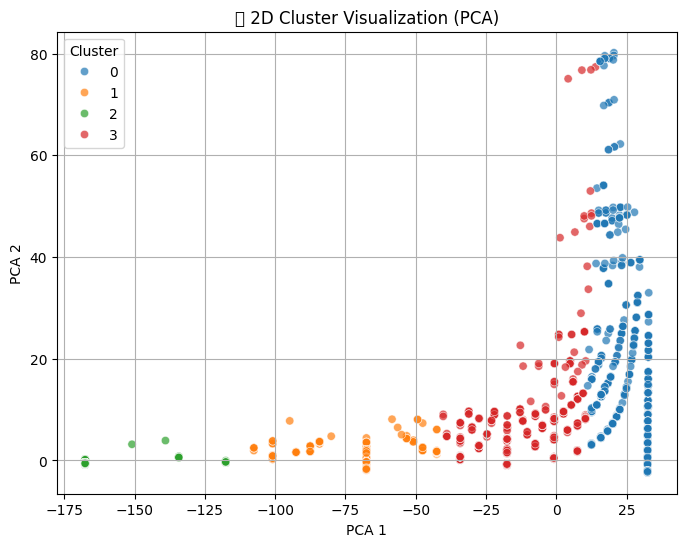

In [127]:
from sklearn.cluster import KMeans

# Fit clustering
kmeans = KMeans(n_clusters=4, random_state=42)
labels = kmeans.fit_predict(data_for_clustering)

# Visualize
visualize_clusters(data_for_clustering, labels)

# Regression

In [128]:
# nps_linear_reg = pd.read_csv("nps_linear_reg.csv")

In [129]:
from sklearn.preprocessing import OneHotEncoder
import statsmodels.api as sm
import numpy as np
from sklearn.preprocessing import OneHotEncoder
import statsmodels.api as sm

def run_nps_regression(df):
    working_df = df.copy()

    # Binary mapping for q16
    working_df["q16 - Response"] = working_df["q16 - Response"].map({"Yes": 1, "No": 0})

    # Drop rows with missing critical values
    required_cols = [
        "NPS",
        "q30 - Adjusted",
        "q29 - Response",
        "q16 - Response",
        'q31 - Response',
        'Which bank do you consider as your main primary bank? - Response'
    ]
    working_df = working_df.dropna(subset=required_cols)

    # One-hot encode categorical features
    categorical_features = ["q29 - Response", "q30 - Adjusted", 'Which bank do you consider as your main primary bank? - Response', 'q31 - Response']
    encoder = OneHotEncoder(drop="first", sparse_output=False, dtype=int)
    encoded_cat = encoder.fit_transform(working_df[categorical_features])
    encoded_df = pd.DataFrame(
        encoded_cat,
        columns=encoder.get_feature_names_out(categorical_features),
        index=working_df.index
    )

    # Select numeric columns and concatenate
    numeric_features = working_df[[
        "q16 - Response"
    ]].astype(float)  # Ensure float type

    X = pd.concat([encoded_df, numeric_features], axis=1)
    y = working_df["NPS"].astype(float)

    # Drop any remaining NaNs or infs
    X = X.replace([np.inf, -np.inf], np.nan).dropna()
    y = y.loc[X.index]  # Align y with cleaned X

    # Add constant for intercept
    X = sm.add_constant(X)

    # Run OLS regression
    model = sm.OLS(y, X).fit()
    print(model.summary())

    return model

In [130]:
from sklearn.preprocessing import OneHotEncoder
import statsmodels.api as sm
import numpy as np
from sklearn.preprocessing import OneHotEncoder
import statsmodels.api as sm

def run_nps_regression_noq31(df):
    working_df = df.copy()

    # Binary mapping for q16
    working_df["q16 - Response"] = working_df["q16 - Response"].map({"Yes": 1, "No": 0})

    # Drop rows with missing critical values
    required_cols = [
        "NPS",
        "q30 - Adjusted",
        "q29 - Response",
        "q16 - Response",
        'Which bank do you consider as your main primary bank? - Response'
    ]
    working_df = working_df.dropna(subset=required_cols)

    # One-hot encode categorical features
    categorical_features = ["q29 - Response", "q30 - Adjusted", 'Which bank do you consider as your main primary bank? - Response']
    encoder = OneHotEncoder(drop="first", sparse_output=False, dtype=int)
    encoded_cat = encoder.fit_transform(working_df[categorical_features])
    encoded_df = pd.DataFrame(
        encoded_cat,
        columns=encoder.get_feature_names_out(categorical_features),
        index=working_df.index
    )

    # Select numeric columns and concatenate
    numeric_features = working_df[[
        "q16 - Response"
    ]].astype(float)  # Ensure float type

    X = pd.concat([encoded_df, numeric_features], axis=1)
    y = working_df["NPS"].astype(float)

    # Drop any remaining NaNs or infs
    X = X.replace([np.inf, -np.inf], np.nan).dropna()
    y = y.loc[X.index]  # Align y with cleaned X

    # Add constant for intercept
    X = sm.add_constant(X)

    # Run OLS regression
    model = sm.OLS(y, X).fit()
    print(model.summary())

    return model

In [131]:
nps_try = nps_linear_reg[~(nps_linear_reg == "").any(axis=1)]

In [132]:
merged_df['q29 - Response'].value_counts(normalize=True)

q29 - Response
                                                 0.501595
Employment (Trabaho)                             0.337585
Business/SME                                     0.043736
Student (Allowance)                              0.035080
Part-time (VA, Photography, Consultancy etc.)    0.027790
Remittance                                       0.027335
Unemployed                                       0.019134
Retirement Pension                               0.007745
Name: proportion, dtype: float64

In [133]:
nps_try['q29 - Response'].value_counts()

q29 - Response
Employment (Trabaho)                             6210
Business/SME                                     1986
Part-time (VA, Photography, Consultancy etc.)    1483
Remittance                                       1380
Student (Allowance)                              1115
Unemployed                                        670
Retirement Pension                                405
Name: count, dtype: int64

In [134]:
nps_noq31 = nps_try.drop(columns=['q31 - Response'])

In [135]:
model = run_nps_regression(nps_try)

                            OLS Regression Results                            
Dep. Variable:                    NPS   R-squared:                       0.097
Model:                            OLS   Adj. R-squared:                  0.095
Method:                 Least Squares   F-statistic:                     59.10
Date:                Mon, 11 Aug 2025   Prob (F-statistic):          5.17e-270
Time:                        07:44:14   Log-Likelihood:                -71283.
No. Observations:               13249   AIC:                         1.426e+05
Df Residuals:                   13224   BIC:                         1.428e+05
Df Model:                          24                                         
Covariance Type:            nonrobust                                         
                                                                                                                                                                                                                  

In [136]:
model = run_nps_regression_noq31(nps_noq31)

                            OLS Regression Results                            
Dep. Variable:                    NPS   R-squared:                       0.095
Model:                            OLS   Adj. R-squared:                  0.093
Method:                 Least Squares   F-statistic:                     65.91
Date:                Mon, 11 Aug 2025   Prob (F-statistic):          4.64e-266
Time:                        07:44:14   Log-Likelihood:                -71299.
No. Observations:               13249   AIC:                         1.426e+05
Df Residuals:                   13227   BIC:                         1.428e+05
Df Model:                          21                                         
Covariance Type:            nonrobust                                         
                                                                                                                                                                                                                  

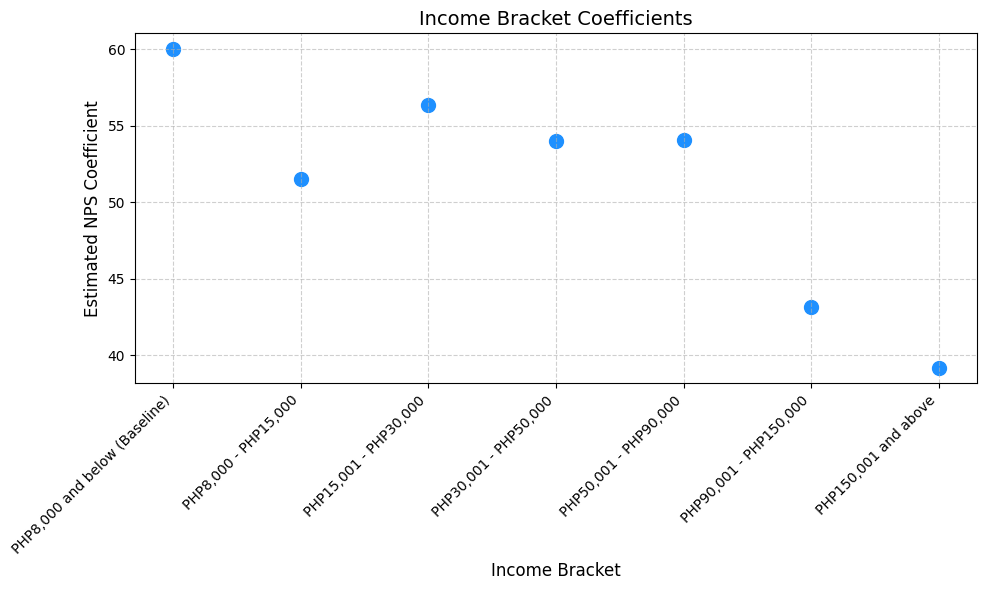

In [137]:
import matplotlib.pyplot as plt

# Income brackets and their adjusted coefficients (baseline = 60)
income_brackets = [
    "PHP8,000 and below (Baseline)",
    "PHP8,000 - PHP15,000",
    "PHP15,001 - PHP30,000",
    "PHP30,001 - PHP50,000",
    "PHP50,001 - PHP90,000",
    "PHP90,001 - PHP150,000",
    "PHP150,001 and above"
]

coefficients = [
    60.0000,    # Baseline
    60 - 8.4748,
    60 - 3.6169,
    60 - 5.9849,
    60 - 5.9048,
    60 - 16.8337,
    60 - 20.8182
]

# Plot
plt.figure(figsize=(10, 6))
plt.scatter(income_brackets, coefficients, color='dodgerblue', s=100)
plt.title("Income Bracket Coefficients", fontsize=14)
plt.xlabel("Income Bracket", fontsize=12)
plt.ylabel("Estimated NPS Coefficient", fontsize=12)
plt.xticks(rotation=45, ha='right')
plt.grid(True, linestyle='--', alpha=0.6)
plt.tight_layout()
plt.show()

**use individual data for regression**

In [138]:
regr_df = merged_df[["q30 - Adjusted", "q29 - Response", "q16 - Response",
        "total_balance_all_banks", "total_spend_all_banks", "total_transactions_all_banks",
        'Which bank do you consider as your main primary bank? - Response', 'q17 - Response']]

In [139]:
def run_nps_regression2(df):
    import numpy as np
    import pandas as pd
    import statsmodels.api as sm
    from sklearn.preprocessing import OneHotEncoder

    working_df = df.copy()

    # Binary mapping for q16
    working_df["q16 - Response"] = working_df["q16 - Response"].map({"Yes": 1, "No": 0})

    # Drop rows with missing critical values
    required_cols = [
        "q30 - Adjusted", "q29 - Response",
        "q16 - Response",
        # "total_balance_all_banks", "total_spend_all_banks", "total_transactions_all_banks",
        'Which bank do you consider as your main primary bank? - Response',
        'q17 - Response'
    ]
    working_df = working_df.dropna(subset=required_cols)

    # # Ensure types are correct
    # working_df["total_balance_all_banks"] = pd.to_numeric(working_df["total_balance_all_banks"], errors='coerce')
    # working_df["total_spend_all_banks"] = pd.to_numeric(working_df["total_spend_all_banks"], errors='coerce')
    # working_df["total_transactions_all_banks"] = pd.to_numeric(working_df["total_transactions_all_banks"], errors='coerce')
    working_df["q17 - Response"] = pd.to_numeric(working_df["q17 - Response"], errors='coerce')

    # Drop rows with NaN from numeric conversions
    working_df = working_df.dropna()

    # One-hot encode categorical features
    categorical_features = ["q29 - Response", "q30 - Adjusted", 'Which bank do you consider as your main primary bank? - Response']
    encoder = OneHotEncoder(drop="first", sparse_output=False, dtype=int)
    encoded_cat = encoder.fit_transform(working_df[categorical_features])
    encoded_df = pd.DataFrame(
        encoded_cat,
        columns=encoder.get_feature_names_out(categorical_features),
        index=working_df.index
    )

    # Combine numeric and encoded data
    numeric_features = working_df[[
        "q16 - Response",
        # "total_balance_all_banks",
        # "total_spend_all_banks",
        # "total_transactions_all_banks"
    ]]
    X = pd.concat([encoded_df, numeric_features], axis=1)

    # Target variable
    y = working_df["q17 - Response"]

    # Final type check
    assert X.select_dtypes(include=["object"]).empty, "X still contains string columns"

    # Add constant
    X = sm.add_constant(X)

    # Fit the model
    model = sm.OLS(y, X).fit()
    print(model.summary())

    return model


In [140]:
regr_df = regr_df[~(regr_df == "").any(axis=1)]

In [141]:
regr_df['q29 - Response'].value_counts()

q29 - Response
Employment (Trabaho)                             710
Business/SME                                      90
Student (Allowance)                               76
Remittance                                        60
Part-time (VA, Photography, Consultancy etc.)     58
Unemployed                                        35
Retirement Pension                                16
Name: count, dtype: int64

In [142]:
model = run_nps_regression2(regr_df)

                            OLS Regression Results                            
Dep. Variable:         q17 - Response   R-squared:                       0.131
Model:                            OLS   Adj. R-squared:                  0.114
Method:                 Least Squares   F-statistic:                     7.375
Date:                Mon, 11 Aug 2025   Prob (F-statistic):           1.23e-20
Time:                        07:44:15   Log-Likelihood:                -1709.4
No. Observations:                1045   AIC:                             3463.
Df Residuals:                    1023   BIC:                             3572.
Df Model:                          21                                         
Covariance Type:            nonrobust                                         
                                                                                                                                                                                                                  

In [143]:
merged_df['Which bank do you consider as your main primary bank? - Response'].value_counts()

Which bank do you consider as your main primary bank? - Response
                                                                                                                                                                                                                                            867
GoTyme Bank                                                                                                                                                                                                                                 642
BPI (Bank of the Philippine Islands)                                                                                                                                                                                                        171
GCash                                                                                                                                                                                                                                       165
Other Banks (Metrobank, Security Bank, CIMB Bank, RCBC (Rizal Commercial Banking Corporation), China Bank, EastWest Bank, PNB (Philippine National Bank), Overseas Bank (e.g., HSBC, Citibank, Standard Chartered), Tonik Bank, OwnBank)    103
BDO Unibank                                                                                                                                                                                                                                  81
Seabank                                                                                                                                                                                                                                      51
UnionBank                                                                                                                                                                                                                                    50
Maya Bank                                                                                                                                                                                                                                    35
Land Bank of the Philippines                                                                                                                                                                                                                 30
Name: count, dtype: int64

In [144]:
regr_df['Which bank do you consider as your main primary bank? - Response'].value_counts()

Which bank do you consider as your main primary bank? - Response
GoTyme Bank                                                                                                                                                                                                                                 499
BPI (Bank of the Philippine Islands)                                                                                                                                                                                                        139
GCash                                                                                                                                                                                                                                       133
Other Banks (Metrobank, Security Bank, CIMB Bank, RCBC (Rizal Commercial Banking Corporation), China Bank, EastWest Bank, PNB (Philippine National Bank), Overseas Bank (e.g., HSBC, Citibank, Standard Chartered), Tonik Bank, OwnBank)     86
BDO Unibank                                                                                                                                                                                                                                  66
Seabank                                                                                                                                                                                                                                      37
UnionBank                                                                                                                                                                                                                                    35
Maya Bank                                                                                                                                                                                                                                    25
Land Bank of the Philippines                                                                                                                                                                                                                 25
Name: count, dtype: int64

In [145]:
nps_linear_reg.head(5)

Question  Total Responses  \
0  q12 - I am satisfied in my overall experience ...                7   
1  q12 - I am satisfied in my overall experience ...                1   
2  q12 - I am satisfied in my overall experience ...                1   
3  q12 - I am satisfied in my overall experience ...               22   
4  q12 - I am satisfied in my overall experience ...                7   

   Promoters  Passives  Detractors     NPS        q29 - Response  \
0          3         3           1   28.57  Employment (Trabaho)   
1          0         0           1 -100.00          Business/SME   
2          1         0           0  100.00          Business/SME   
3         17         4           1   72.73  Employment (Trabaho)   
4          7         0           0  100.00  Employment (Trabaho)   

          q30 - Adjusted q16 - Response  \
0   PHP150,001 and above             No   
1  PHP50,001 - PHP90,000             No   
2  PHP30,001 - PHP50,000             No   
3  PHP15,001 - PHP30,000             No   
4        Below PHP 8,000             No   

  Which bank do you consider as your main primary bank? - Response  \
0               BPI (Bank of the Philippine Islands)                 
1                                                                    
2                                        GoTyme Bank                 
3                                              GCash                 
4                                        GoTyme Bank                 

  q31 - Response  
0   Metro Manila  
1   Metro Manila  
2       Mindanao  
3   Metro Manila  
4        Visayas

In [146]:
nps_linear_reg.sort_values('Total Responses', ascending = False).head(20)

Question  Total Responses  \
5918  q14 - I find the app reliable and free from te...               62   
949   q12 - I am going to continue using GoTyme Bank...               62   
5016  q14 - App is easy to navigate and get used to....               62   
4565  q14 - Mobile app is intuitive and user-friendl...               62   
1401  q12 - I feel SECURED whenever I use GoTyme Ban...               62   
6807  q15 - Sufficient security features to help me ...               62   
45    q12 - I am satisfied in my overall experience ...               62   
2757  q13 - It has various products and services whi...               62   
497   q12 - I strongly prefer GoTyme Bank over other...               62   
3209  q13 - Always available with no downtime whenev...               62   
5467  q14 - The app and kiosk instructions are clear...               62   
8568  q15 - I get helpful information to protect my ...               62   
6366  q15 - Overall security of account and transact...               62   
4113  q13 - Convenient than offline payment methods ...               62   
8129  q15 - Secure based on security-related feedbac...               62   
1853  q12 - I TRUST GoTyme Bank with my financial tr...               62   
2305  q13 - Overall Usefulness of GoTyme Bank.(Pang ...               62   
3661  q13 - Has a wide range of online and offline p...               62   
7688  q15 - Assurance that my funds stay intact in m...               61   
7247  q15 - Transparency on how my data is protected...               61   

      Promoters  Passives  Detractors    NPS        q29 - Response  \
5918         53         7           2  82.26  Employment (Trabaho)   
949          54         7           1  85.48  Employment (Trabaho)   
5016         54         7           1  85.48  Employment (Trabaho)   
4565         55         6           1  87.10  Employment (Trabaho)   
1401         54         6           2  83.87  Employment (Trabaho)   
6807         53         7           2  82.26  Employment (Trabaho)   
45           51        10           1  80.65  Employment (Trabaho)   
2757         50         9           3  75.81  Employment (Trabaho)   
497          50        11           1  79.03  Employment (Trabaho)   
3209         53         7           2  82.26  Employment (Trabaho)   
5467         54         7           1  85.48  Employment (Trabaho)   
8568         53         7           2  82.26  Employment (Trabaho)   
6366         54         6           2  83.87  Employment (Trabaho)   
4113         54         6           2  83.87  Employment (Trabaho)   
8129         54         6           2  83.87  Employment (Trabaho)   
1853         55         4           3  83.87  Employment (Trabaho)   
2305         56         4           2  87.10  Employment (Trabaho)   
3661         47        12           3  70.97  Employment (Trabaho)   
7688         55         4           2  86.89  Employment (Trabaho)   
7247         53         6           2  83.61  Employment (Trabaho)   

             q30 - Adjusted q16 - Response  \
5918  PHP15,001 - PHP30,000             No   
949   PHP15,001 - PHP30,000             No   
5016  PHP15,001 - PHP30,000             No   
4565  PHP15,001 - PHP30,000             No   
1401  PHP15,001 - PHP30,000             No   
6807  PHP15,001 - PHP30,000             No   
45    PHP15,001 - PHP30,000             No   
2757  PHP15,001 - PHP30,000             No   
497   PHP15,001 - PHP30,000             No   
3209  PHP15,001 - PHP30,000             No   
5467  PHP15,001 - PHP30,000             No   
8568  PHP15,001 - PHP30,000             No   
6366  PHP15,001 - PHP30,000             No   
4113  PHP15,001 - PHP30,000             No   
8129  PHP15,001 - PHP30,000             No   
1853  PHP15,001 - PHP30,000             No   
2305  PHP15,001 - PHP30,000             No   
3661  PHP15,001 - PHP30,000             No   
7688  PHP15,001 - PHP30,000             No   
7247  PHP15,001 - PHP30,000             No   

     Which b

In [147]:
nps_by_bank_all[nps_by_bank_all['Bank'] == 'Seabank'].head(10)

Question     Bank  \
8   q12 - I am satisfied in my overall experience ...  Seabank   
18  q12 - I strongly prefer GoTyme Bank over other...  Seabank   
28  q12 - I am going to continue using GoTyme Bank...  Seabank   
38  q12 - I feel SECURED whenever I use GoTyme Ban...  Seabank   
48  q12 - I TRUST GoTyme Bank with my financial tr...  Seabank   
58  q13 - Overall Usefulness of GoTyme Bank.(Pang ...  Seabank   
68  q13 - It has various products and services whi...  Seabank   
78  q13 - Always available with no downtime whenev...  Seabank   
88  q13 - Has a wide range of online and offline p...  Seabank   
98  q13 - Convenient than offline payment methods ...  Seabank   

    Total Responses  Promoters  Passives  Detractors    NPS  
8                46         25        13           8  36.96  
18               46          9        25          12  -6.52  
28               46         31         9           6  54.35  
38               46         30        10           6  52.17  
48               46         27        11           8  41.30  
58               44         31         6           7  54.55  
68               44         23        13           8  34.09  
78               44         27         9           8  43.18  
88               44         15        20           9  13.64  
98               44         26        11           7  43.18

# PRIMARY BANK - TOP3 DRILL

In [148]:
prim_3_df = merged_df.copy()

In [149]:
prim_3_needed_cols = ['Please select your top 3 primary banks/e-wallet. - None of the above',
 'Please select your top 3 primary banks/e-wallet. - BDO Unibank',
 'Please select your top 3 primary banks/e-wallet. - BPI (Bank of the Philippine Islands)',
 'Please select your top 3 primary banks/e-wallet. - Metrobank',
 'Please select your top 3 primary banks/e-wallet. - Land Bank of the Philippines',
 'Please select your top 3 primary banks/e-wallet. - Security Bank',
 'Please select your top 3 primary banks/e-wallet. - UnionBank',
 'Please select your top 3 primary banks/e-wallet. - RCBC (Rizal Commercial Banking Corporation)',
 'Please select your top 3 primary banks/e-wallet. - China Bank',
 'Please select your top 3 primary banks/e-wallet. - PNB (Philippine National Bank)',
 'Please select your top 3 primary banks/e-wallet. - EastWest Bank',
 'Please select your top 3 primary banks/e-wallet. - GoTyme Bank',
 'Please select your top 3 primary banks/e-wallet. - Maya Bank',
 'Please select your top 3 primary banks/e-wallet. - Tonik Bank',
 'Please select your top 3 primary banks/e-wallet. - CIMB Bank',
 'Please select your top 3 primary banks/e-wallet. - Overseas Bank (e.g., HSBC, Citibank, Standard Chartered)',
 'Please select your top 3 primary banks/e-wallet. - Seabank',
 'Please select your top 3 primary banks/e-wallet. - OwnBank',
 'Please select your top 3 primary banks/e-wallet. - GCash',
'How much is your usual balance in each bank? - BDO Unibank',
 'How much is your usual balance in each bank? - BPI (Bank of the Philippine Islands)',
 'How much is your usual balance in each bank? - Metrobank',
 'How much is your usual balance in each bank? - Land Bank of the Philippines',
 'How much is your usual balance in each bank? - Security Bank',
 'How much is your usual balance in each bank? - UnionBank',
 'How much is your usual balance in each bank? - RCBC (Rizal Commercial Banking Corporation)',
 'How much is your usual balance in each bank? - China Bank',
 'How much is your usual balance in each bank? - PNB (Philippine National Bank)',
 'How much is your usual balance in each bank? - EastWest Bank',
 'How much is your usual balance in each bank? - GoTyme Bank',
 'How much is your usual balance in each bank? - Maya Bank',
 'How much is your usual balance in each bank? - Tonik Bank',
 'How much is your usual balance in each bank? - CIMB Bank',
 'How much is your usual balance in each bank? - Overseas Bank (e.g., HSBC, Citibank, Standard Chartered)',
 'How much is your usual balance in each bank? - Seabank',
 'How much is your usual balance in each bank? - OwnBank',
 'How much is your usual balance in each bank? - GCash',
 'How much do you usually spend per month using your primary bank? (Include expenses like bills payment, transfers, online/offline purchases, subscriptions, etc.) - BDO Unibank',
 'How much do you usually spend per month using your primary bank? (Include expenses like bills payment, transfers, online/offline purchases, subscriptions, etc.) - BPI (Bank of the Philippine Islands)',
 'How much do you usually spend per month using your primary bank? (Include expenses like bills payment, transfers, online/offline purchases, subscriptions, etc.) - Metrobank',
 'How much do you usually spend per month using your primary bank? (Include expenses like bills payment, transfers, online/offline purchases, subscriptions, etc.) - Land Bank of the Philippines',
 'How much do you usually spend per month using your primary bank? (Include expenses like bills payment, transfers, online/offline purchases, subscriptions, etc.) - Security Bank',
 'How much do you usually spend per month using your primary bank? (Include expenses like bills payment, transfers, online/offline purchases, subscriptions, etc.) - UnionBank',
 'How much do you usually spend per month using your primary bank? (Include expenses like bills payment, transfers, online/offline purchases, subscriptions, etc.) - RCBC (Rizal Commercial Banking Corporation)',
 'How much do you usually spend per month using your primary bank? (Include expenses like bills payment, transfers, online/offline purchases, subscriptions, etc.) - China Bank',
 'How much do you usually spend per month using your primary bank? (Include expenses like bills payment, transfers, online/offline purchases, subscriptions, etc.) - PNB (Philippine National Bank)',
 'How much do you usually spend per month using your primary bank? (Include expenses like bills payment, transfers, online/offline purchases, subscriptions, etc.) - EastWest Bank',
 'How much do you usually spend per month using your primary bank? (Include expenses like bills payment, transfers, online/offline purchases, subscriptions, etc.) - GoTyme Bank',
 'How much do you usually spend per month using your primary bank? (Include expenses like bills payment, transfers, online/offline purchases, subscriptions, etc.) - Maya Bank',
 'How much do you usually spend per month using your primary bank? (Include expenses like bills payment, transfers, online/offline purchases, subscriptions, etc.) - Tonik Bank',
 'How much do you usually spend per month using your primary bank? (Include expenses like bills payment, transfers, online/offline purchases, subscriptions, etc.) - CIMB Bank',
 'How much do you usually spend per month using your primary bank? (Include expenses like bills payment, transfers, online/offline purchases, subscriptions, etc.) - Overseas Bank (e.g., HSBC, Citibank, Standard Chartered)',
 'How much do you usually spend per month using your primary bank? (Include expenses like bills payment, transfers, online/offline purchases, subscriptions, etc.) - Seabank',
 'How much do you usually spend per month using your primary bank? (Include expenses like bills payment, transfers, online/offline purchases, subscriptions, etc.) - OwnBank',
 'How much do you usually spend per month using your primary bank? (Include expenses like bills payment, transfers, online/offline purchases, subscriptions, etc.) - GCash',
 'How many transactions do you perform per month using your primary bank? (Include fund transfers, ATM withdrawals, bills payments, purchases, loan payments, etc.) - BDO Unibank',
 'How many transactions do you perform per month using your primary bank? (Include fund transfers, ATM withdrawals, bills payments, purchases, loan payments, etc.) - BPI (Bank of the Philippine Islands)',
 'How many transactions do you perform per month using your primary bank? (Include fund transfers, ATM withdrawals, bills payments, purchases, loan payments, etc.) - Metrobank',
 'How many transactions do you perform per month using your primary bank? (Include fund transfers, ATM withdrawals, bills payments, purchases, loan payments, etc.) - Land Bank of the Philippines',
 'How many transactions do you perform per month using your primary bank? (Include fund transfers, ATM withdrawals, bills payments, purchases, loan payments, etc.) - Security Bank',
 'How many transactions do you perform per month using your primary bank? (Include fund transfers, ATM withdrawals, bills payments, purchases, loan payments, etc.) - UnionBank',
 'How many transactions do you perform per month using your primary bank? (Include fund transfers, ATM withdrawals, bills payments, purchases, loan payments, etc.) - RCBC (Rizal Commercial Banking Corporation)',
 'How many transactions do you perform per month using your primary bank? (Include fund transfers, ATM withdrawals, bills payments, purchases, loan payments, etc.) - China Bank',
 'How many transactions do you perform per month using your primary bank? (Include fund transfers, ATM withdrawals, bills payments, purchases, loan payments, etc.) - PNB (Philippine National Bank)',
 'How many transactions do you perform per month using your primary bank? (Include fund transfers, ATM withdrawals, bills payments, purchases, loan payments, etc.) - EastWest Bank',
 'How many transactions do you perform per month using your primary bank? (Include fund transfers, ATM withdrawals, bills payments, purchases, loan payments, etc.) - GoTyme Bank',
 'How many transactions do you perform per month using your primary bank? (Include fund transfers, ATM withdrawals, bills payments, purchases, loan payments, etc.) - Maya Bank',
 'How many transactions do you perform per month using your primary bank? (Include fund transfers, ATM withdrawals, bills payments, purchases, loan payments, etc.) - Tonik Bank',
 'How many transactions do you perform per month using your primary bank? (Include fund transfers, ATM withdrawals, bills payments, purchases, loan payments, etc.) - CIMB Bank',
 'How many transactions do you perform per month using your primary bank? (Include fund transfers, ATM withdrawals, bills payments, purchases, loan payments, etc.) - Overseas Bank (e.g., HSBC, Citibank, Standard Chartered)',
 'How many transactions do you perform per month using your primary bank? (Include fund transfers, ATM withdrawals, bills payments, purchases, loan payments, etc.) - Seabank',
 'How many transactions do you perform per month using your primary bank? (Include fund transfers, ATM withdrawals, bills payments, purchases, loan payments, etc.) - OwnBank',
 'How many transactions do you perform per month using your primary bank? (Include fund transfers, ATM withdrawals, bills payments, purchases, loan payments, etc.) - GCash',
 'Which bank do you consider as your main primary bank? - Response',
'top_3_combined'
                      ]

In [150]:
prim_3_df[prim_3_needed_cols].head()

Please select your top 3 primary banks/e-wallet. - None of the above  \
0                                                                        
1                                  None of the above                     
2                                                                        
3                                                                        
4                                                                        

  Please select your top 3 primary banks/e-wallet. - BDO Unibank  \
0                                                                  
1                                                                  
2                                                                  
3                                                                  
4                                                                  

  Please select your top 3 primary banks/e-wallet. - BPI (Bank of the Philippine Islands)  \
0               BPI (Bank of the Philippine Islands)                                        
1                                                                                           
2                                                                                           
3                                                                                           
4                                                                                           

  Please select your top 3 primary banks/e-wallet. - Metrobank  \
0                                                                
1                                                                
2                                                                
3                                                                
4                                                                

  Please select your top 3 primary banks/e-wallet. - Land Bank of the Philippines  \
0                                                                                   
1                                                                                   
2                                                                                   
3                                                                                   
4                                                                                   

  Please select your top 3 primary banks/e-wallet. - Security Bank  \
0                                                                    
1                                                                    
2                                                                    
3  Other Banks (Metrobank, Security Bank, CIMB Ba...                 
4                                                                    

  Please select your top 3 primary banks/e-wallet. - UnionBank  \
0                                                                
1                                                                
2                                                                
3                                                                
4                                                                

  Please select your top 3 primary banks/e-wallet. - RCBC (Rizal Commercial Banking Corporation)  \
0                                                                                                  
1                                                                                                  
2                                                                                                  
3                                                                                                  
4                                                                                                  

  Please select your top 3 primary banks/e-wallet. - China Bank  \
0                                                                 
1                                                                 
2                                                            

In [151]:
bank_cols = [
     'How much is your usual balance in each bank? - BDO Unibank',
 'How much is your usual balance in each bank? - BPI (Bank of the Philippine Islands)',
 'How much is your usual balance in each bank? - Metrobank',
 'How much is your usual balance in each bank? - Land Bank of the Philippines',
 'How much is your usual balance in each bank? - Security Bank',
 'How much is your usual balance in each bank? - UnionBank',
 'How much is your usual balance in each bank? - RCBC (Rizal Commercial Banking Corporation)',
 'How much is your usual balance in each bank? - China Bank',
 'How much is your usual balance in each bank? - PNB (Philippine National Bank)',
 'How much is your usual balance in each bank? - EastWest Bank',
 'How much is your usual balance in each bank? - GoTyme Bank',
 'How much is your usual balance in each bank? - Maya Bank',
 'How much is your usual balance in each bank? - Tonik Bank',
 'How much is your usual balance in each bank? - CIMB Bank',
 'How much is your usual balance in each bank? - Overseas Bank (e.g., HSBC, Citibank, Standard Chartered)',
 'How much is your usual balance in each bank? - Seabank',
 'How much is your usual balance in each bank? - OwnBank',
 'How much is your usual balance in each bank? - GCash'
]

/tmp/ipython-input-1980458958.py:25: UserWarning: Tight layout not applied. The left and right margins cannot be made large enough to accommodate all Axes decorations.
  plt.tight_layout()


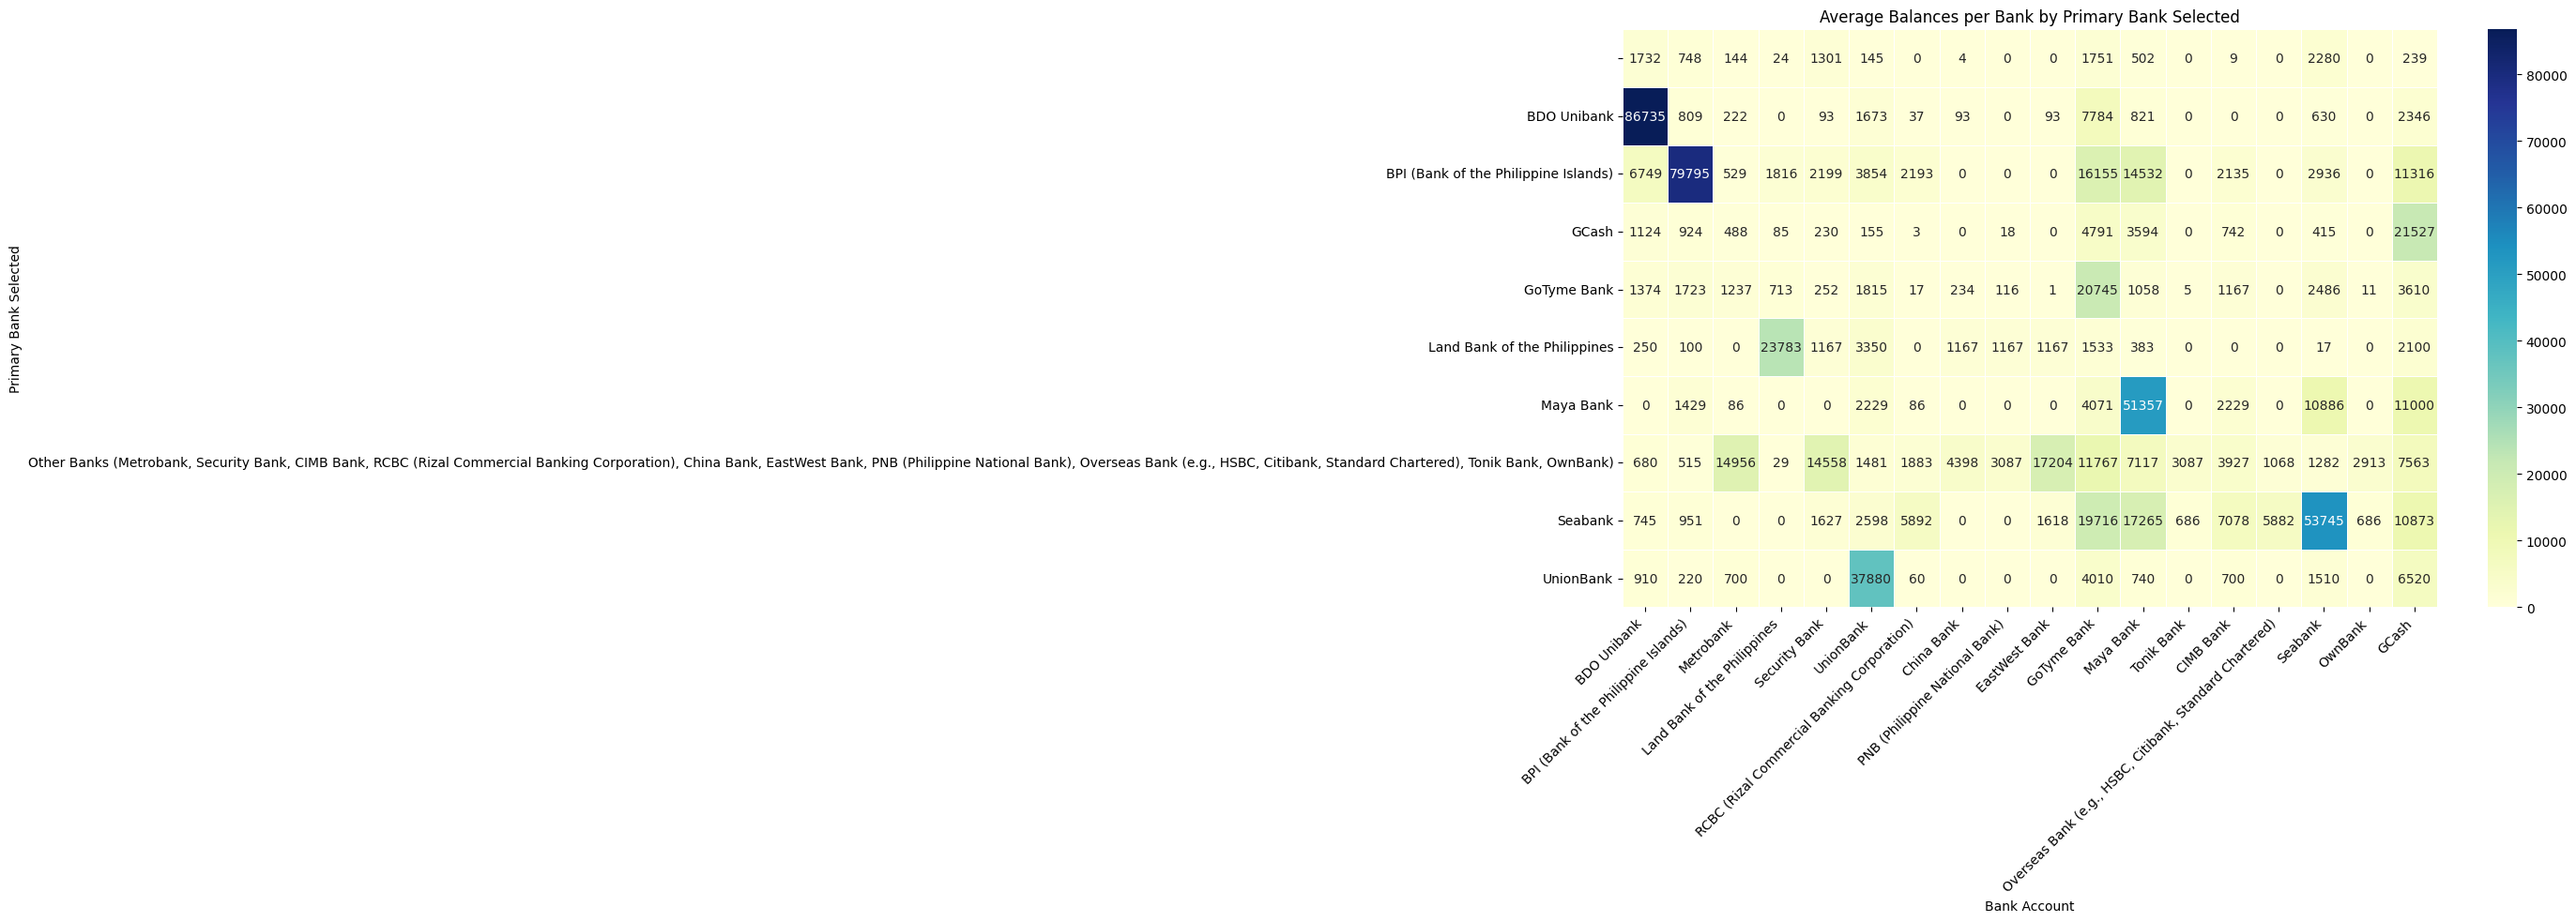

In [152]:
import matplotlib.pyplot as plt
# Set the column with primary bank selections
primary_bank_col = 'Which bank do you consider as your main primary bank? - Response'

# Select just primary bank + balance columns
df = prim_3_df[[primary_bank_col] + bank_cols].copy()

# Convert all balance columns to numeric
for col in bank_cols:
    df[col] = pd.to_numeric(df[col], errors='coerce')

# Group by primary bank, compute mean for each balance column
grouped_balances = df.groupby(primary_bank_col)[bank_cols].mean()

# Optional: clean column names for readability
grouped_balances.columns = [col.split(" - ")[-1] for col in grouped_balances.columns]

# Plot as heatmap
plt.figure(figsize=(14, 8))
sns.heatmap(grouped_balances, annot=True, fmt=".0f", cmap="YlGnBu", linewidths=0.5)
plt.title("Average Balances per Bank by Primary Bank Selected")
plt.xlabel("Bank Account")
plt.ylabel("Primary Bank Selected")
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

In [153]:
prim_3_df['Which bank do you consider as your main primary bank? - Response'].value_counts()

Which bank do you consider as your main primary bank? - Response
                                                                                                                                                                                                                                            867
GoTyme Bank                                                                                                                                                                                                                                 642
BPI (Bank of the Philippine Islands)                                                                                                                                                                                                        171
GCash                                                                                                                                                                                                                                       165
Other Banks (Metrobank, Security Bank, CIMB Bank, RCBC (Rizal Commercial Banking Corporation), China Bank, EastWest Bank, PNB (Philippine National Bank), Overseas Bank (e.g., HSBC, Citibank, Standard Chartered), Tonik Bank, OwnBank)    103
BDO Unibank                                                                                                                                                                                                                                  81
Seabank                                                                                                                                                                                                                                      51
UnionBank                                                                                                                                                                                                                                    50
Maya Bank                                                                                                                                                                                                                                    35
Land Bank of the Philippines                                                                                                                                                                                                                 30
Name: count, dtype: int64

# Transaction

In [154]:
spend_cols = ['How much do you usually spend per month using your primary bank? (Include expenses like bills payment, transfers, online/offline purchases, subscriptions, etc.) - BDO Unibank',
 'How much do you usually spend per month using your primary bank? (Include expenses like bills payment, transfers, online/offline purchases, subscriptions, etc.) - BPI (Bank of the Philippine Islands)',
 'How much do you usually spend per month using your primary bank? (Include expenses like bills payment, transfers, online/offline purchases, subscriptions, etc.) - Metrobank',
 'How much do you usually spend per month using your primary bank? (Include expenses like bills payment, transfers, online/offline purchases, subscriptions, etc.) - Land Bank of the Philippines',
 'How much do you usually spend per month using your primary bank? (Include expenses like bills payment, transfers, online/offline purchases, subscriptions, etc.) - Security Bank',
 'How much do you usually spend per month using your primary bank? (Include expenses like bills payment, transfers, online/offline purchases, subscriptions, etc.) - UnionBank',
 'How much do you usually spend per month using your primary bank? (Include expenses like bills payment, transfers, online/offline purchases, subscriptions, etc.) - RCBC (Rizal Commercial Banking Corporation)',
 'How much do you usually spend per month using your primary bank? (Include expenses like bills payment, transfers, online/offline purchases, subscriptions, etc.) - China Bank',
 'How much do you usually spend per month using your primary bank? (Include expenses like bills payment, transfers, online/offline purchases, subscriptions, etc.) - PNB (Philippine National Bank)',
 'How much do you usually spend per month using your primary bank? (Include expenses like bills payment, transfers, online/offline purchases, subscriptions, etc.) - EastWest Bank',
 'How much do you usually spend per month using your primary bank? (Include expenses like bills payment, transfers, online/offline purchases, subscriptions, etc.) - GoTyme Bank',
 'How much do you usually spend per month using your primary bank? (Include expenses like bills payment, transfers, online/offline purchases, subscriptions, etc.) - Maya Bank',
 'How much do you usually spend per month using your primary bank? (Include expenses like bills payment, transfers, online/offline purchases, subscriptions, etc.) - Tonik Bank',
 'How much do you usually spend per month using your primary bank? (Include expenses like bills payment, transfers, online/offline purchases, subscriptions, etc.) - CIMB Bank',
 'How much do you usually spend per month using your primary bank? (Include expenses like bills payment, transfers, online/offline purchases, subscriptions, etc.) - Overseas Bank (e.g., HSBC, Citibank, Standard Chartered)',
 'How much do you usually spend per month using your primary bank? (Include expenses like bills payment, transfers, online/offline purchases, subscriptions, etc.) - Seabank',
 'How much do you usually spend per month using your primary bank? (Include expenses like bills payment, transfers, online/offline purchases, subscriptions, etc.) - OwnBank',
 'How much do you usually spend per month using your primary bank? (Include expenses like bills payment, transfers, online/offline purchases, subscriptions, etc.) - GCash']

/tmp/ipython-input-3962837429.py:21: UserWarning: Tight layout not applied. The left and right margins cannot be made large enough to accommodate all Axes decorations.
  plt.tight_layout()


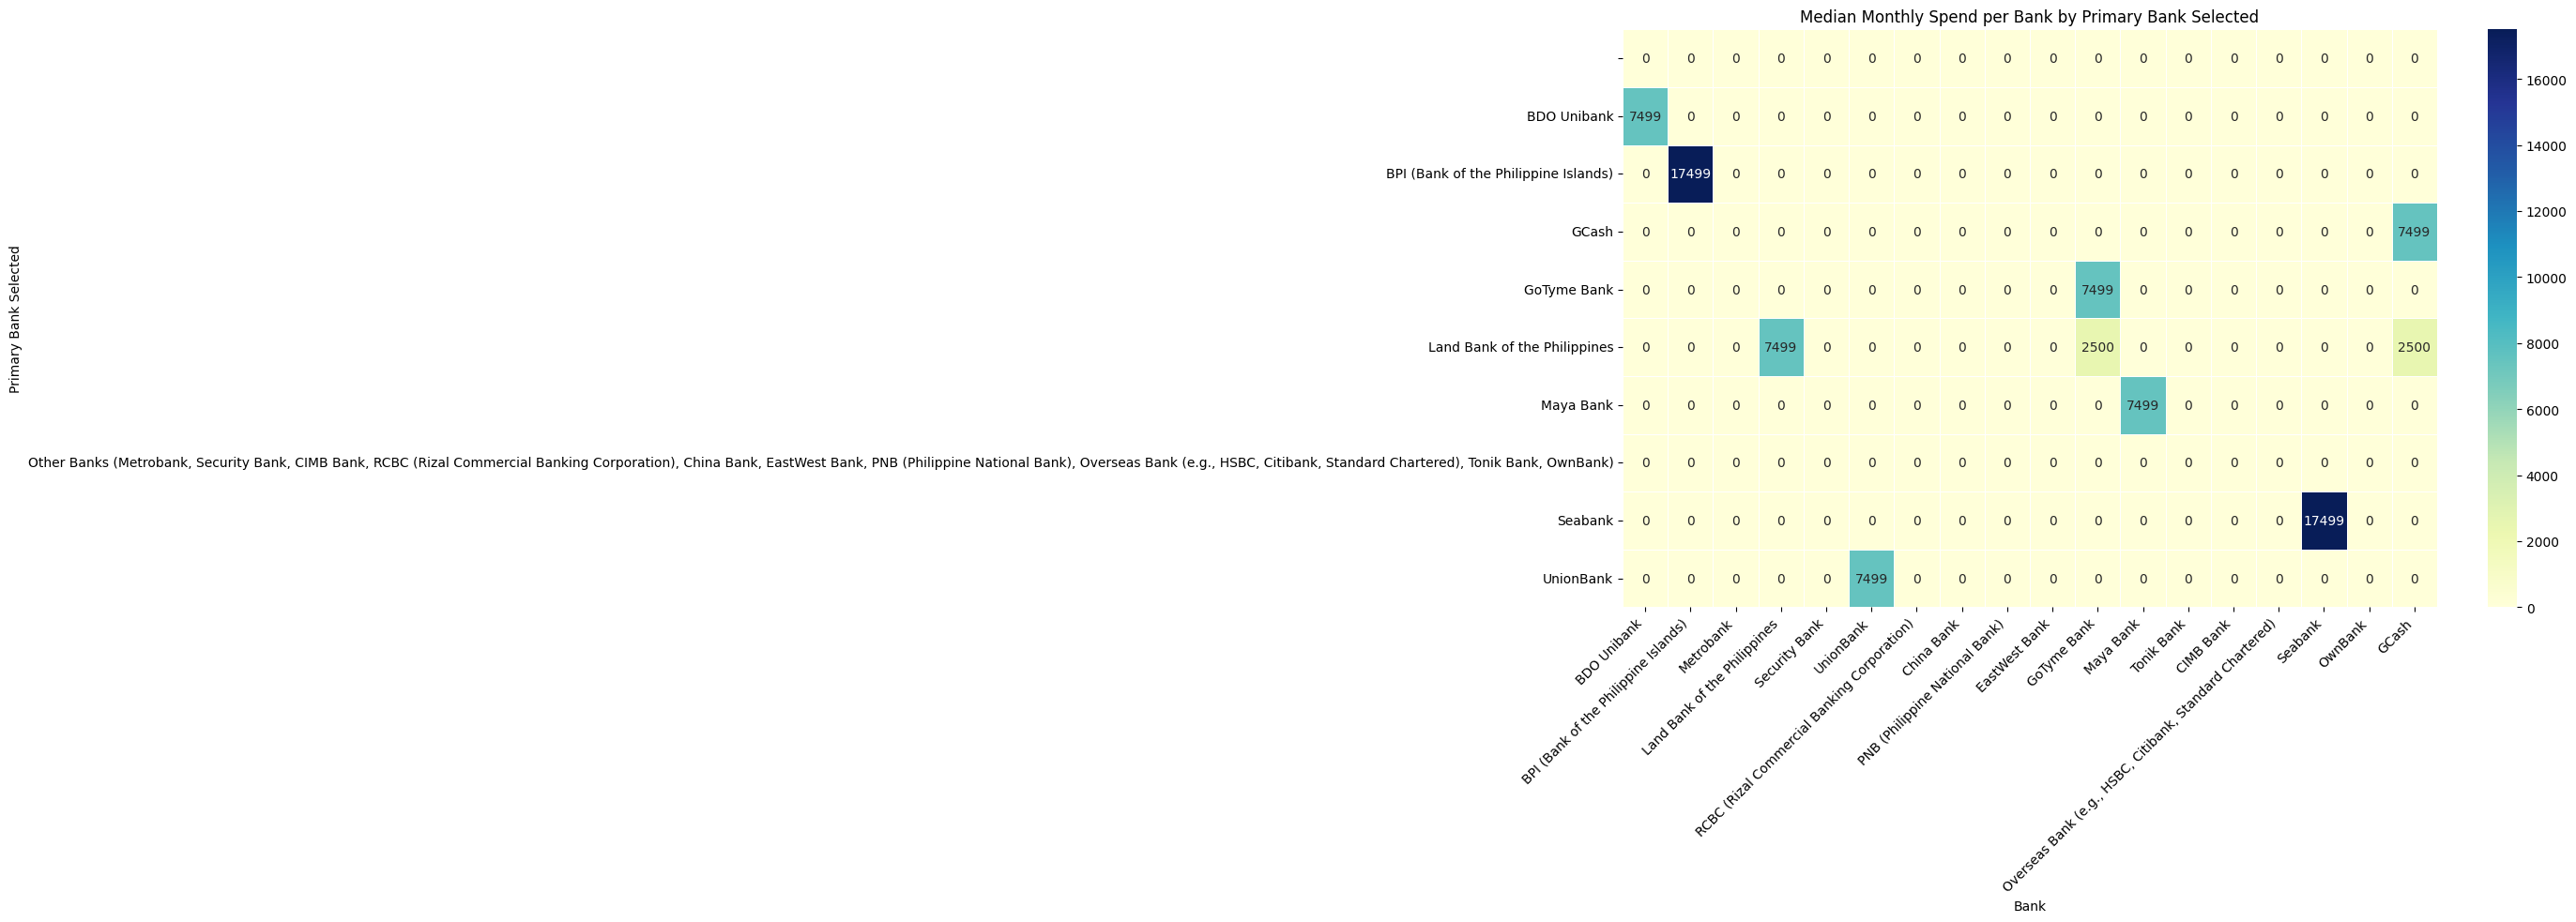

In [155]:
# Select only existing spend columns
df1 = merged_df[[primary_bank_col] + spend_cols].copy()

# Convert to numeric
for col in spend_cols:
    df1[col] = pd.to_numeric(df1[col], errors='coerce')

# Group and compute median
grouped_spend = df1.groupby(primary_bank_col)[spend_cols].median()

# Clean column names
grouped_spend.columns = [col.split(" - ")[-1] for col in grouped_spend.columns]

# Plot heatmap
plt.figure(figsize=(14, 8))
sns.heatmap(grouped_spend, annot=True, fmt=".0f", cmap="YlGnBu", linewidths=0.5)
plt.title("Median Monthly Spend per Bank by Primary Bank Selected")
plt.xlabel("Bank")
plt.ylabel("Primary Bank Selected")
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()


/tmp/ipython-input-1915273520.py:24: UserWarning: Tight layout not applied. The left and right margins cannot be made large enough to accommodate all Axes decorations.
  plt.tight_layout()


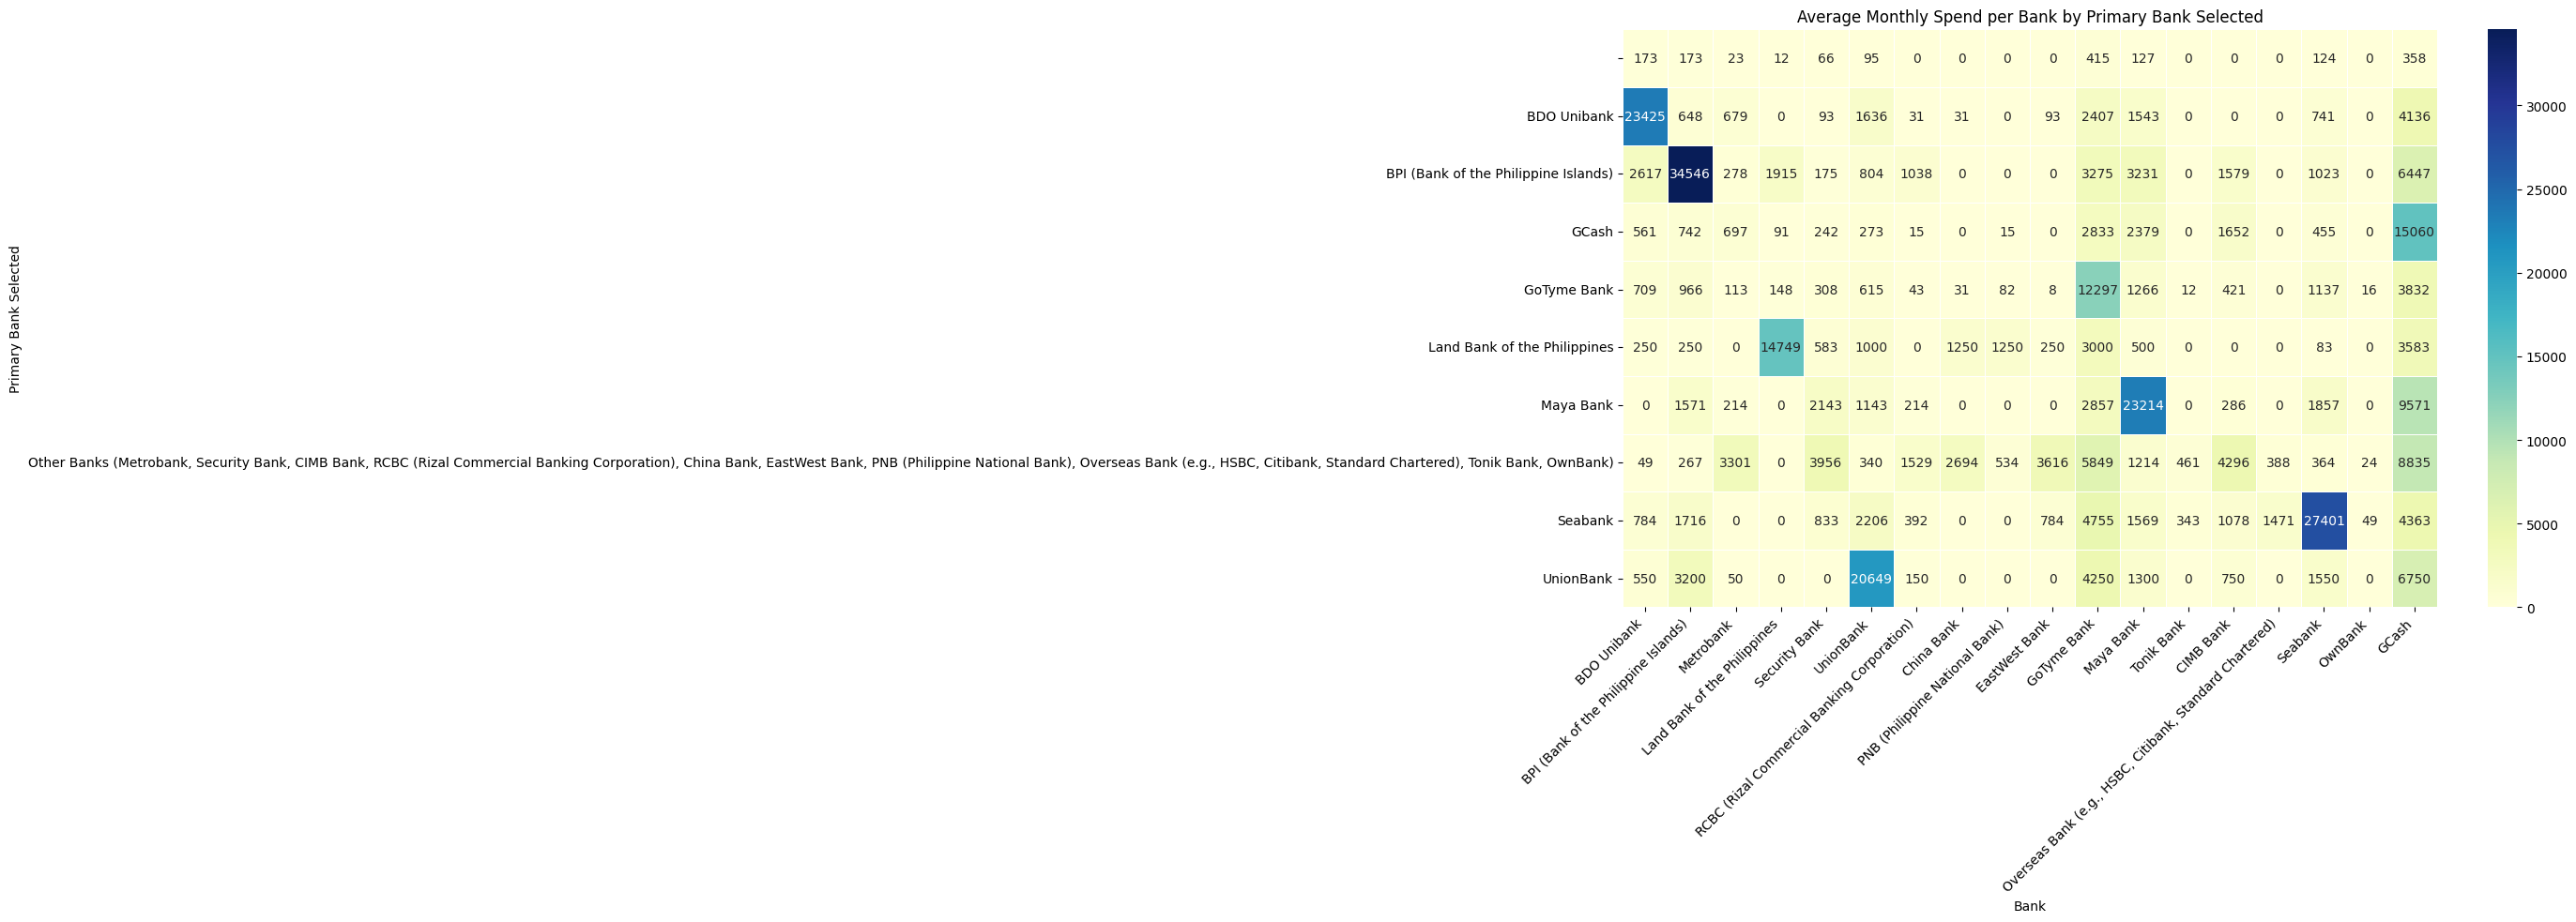

In [156]:
# Set the column with primary bank selections
primary_bank_col = 'Which bank do you consider as your main primary bank? - Response'

# Use spend_cols for this analysis
df1 = merged_df[[primary_bank_col] + spend_cols].copy()

# Convert all spending columns to numeric
for col in spend_cols:
    df1[col] = pd.to_numeric(df1[col], errors='coerce')

# Group by primary bank, compute mean for each spend column
grouped_spend = df1.groupby(primary_bank_col)[spend_cols].mean()

# Optional: clean column names for readability
grouped_spend.columns = [col.split(" - ")[-1] for col in grouped_spend.columns]

# Plot as heatmap
plt.figure(figsize=(14, 8))
sns.heatmap(grouped_spend, annot=True, fmt=".0f", cmap="YlGnBu", linewidths=0.5)
plt.title("Average Monthly Spend per Bank by Primary Bank Selected")
plt.xlabel("Bank")
plt.ylabel("Primary Bank Selected")
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()


In [157]:

merged_df[merged_df['Which bank do you consider as your main primary bank? - Response'] == 'GCash'][
    'How much do you usually spend per month using your primary bank? (Include expenses like bills payment, transfers, online/offline purchases, subscriptions, etc.) - GCash'
].median()

7499.0

# Transaction

In [158]:
transaction_cols = ['How many transactions do you perform per month using your primary bank? (Include fund transfers, ATM withdrawals, bills payments, purchases, loan payments, etc.) - BDO Unibank',
 'How many transactions do you perform per month using your primary bank? (Include fund transfers, ATM withdrawals, bills payments, purchases, loan payments, etc.) - BPI (Bank of the Philippine Islands)',
 'How many transactions do you perform per month using your primary bank? (Include fund transfers, ATM withdrawals, bills payments, purchases, loan payments, etc.) - Metrobank',
 'How many transactions do you perform per month using your primary bank? (Include fund transfers, ATM withdrawals, bills payments, purchases, loan payments, etc.) - Land Bank of the Philippines',
 'How many transactions do you perform per month using your primary bank? (Include fund transfers, ATM withdrawals, bills payments, purchases, loan payments, etc.) - Security Bank',
 'How many transactions do you perform per month using your primary bank? (Include fund transfers, ATM withdrawals, bills payments, purchases, loan payments, etc.) - UnionBank',
 'How many transactions do you perform per month using your primary bank? (Include fund transfers, ATM withdrawals, bills payments, purchases, loan payments, etc.) - RCBC (Rizal Commercial Banking Corporation)',
 'How many transactions do you perform per month using your primary bank? (Include fund transfers, ATM withdrawals, bills payments, purchases, loan payments, etc.) - China Bank',
 'How many transactions do you perform per month using your primary bank? (Include fund transfers, ATM withdrawals, bills payments, purchases, loan payments, etc.) - PNB (Philippine National Bank)',
 'How many transactions do you perform per month using your primary bank? (Include fund transfers, ATM withdrawals, bills payments, purchases, loan payments, etc.) - EastWest Bank',
 'How many transactions do you perform per month using your primary bank? (Include fund transfers, ATM withdrawals, bills payments, purchases, loan payments, etc.) - GoTyme Bank',
 'How many transactions do you perform per month using your primary bank? (Include fund transfers, ATM withdrawals, bills payments, purchases, loan payments, etc.) - Maya Bank',
 'How many transactions do you perform per month using your primary bank? (Include fund transfers, ATM withdrawals, bills payments, purchases, loan payments, etc.) - Tonik Bank',
 'How many transactions do you perform per month using your primary bank? (Include fund transfers, ATM withdrawals, bills payments, purchases, loan payments, etc.) - CIMB Bank',
 'How many transactions do you perform per month using your primary bank? (Include fund transfers, ATM withdrawals, bills payments, purchases, loan payments, etc.) - Overseas Bank (e.g., HSBC, Citibank, Standard Chartered)',
 'How many transactions do you perform per month using your primary bank? (Include fund transfers, ATM withdrawals, bills payments, purchases, loan payments, etc.) - Seabank',
 'How many transactions do you perform per month using your primary bank? (Include fund transfers, ATM withdrawals, bills payments, purchases, loan payments, etc.) - OwnBank',
 'How many transactions do you perform per month using your primary bank? (Include fund transfers, ATM withdrawals, bills payments, purchases, loan payments, etc.) - GCash']

/tmp/ipython-input-883707225.py:24: UserWarning: Tight layout not applied. The left and right margins cannot be made large enough to accommodate all Axes decorations.
  plt.tight_layout()


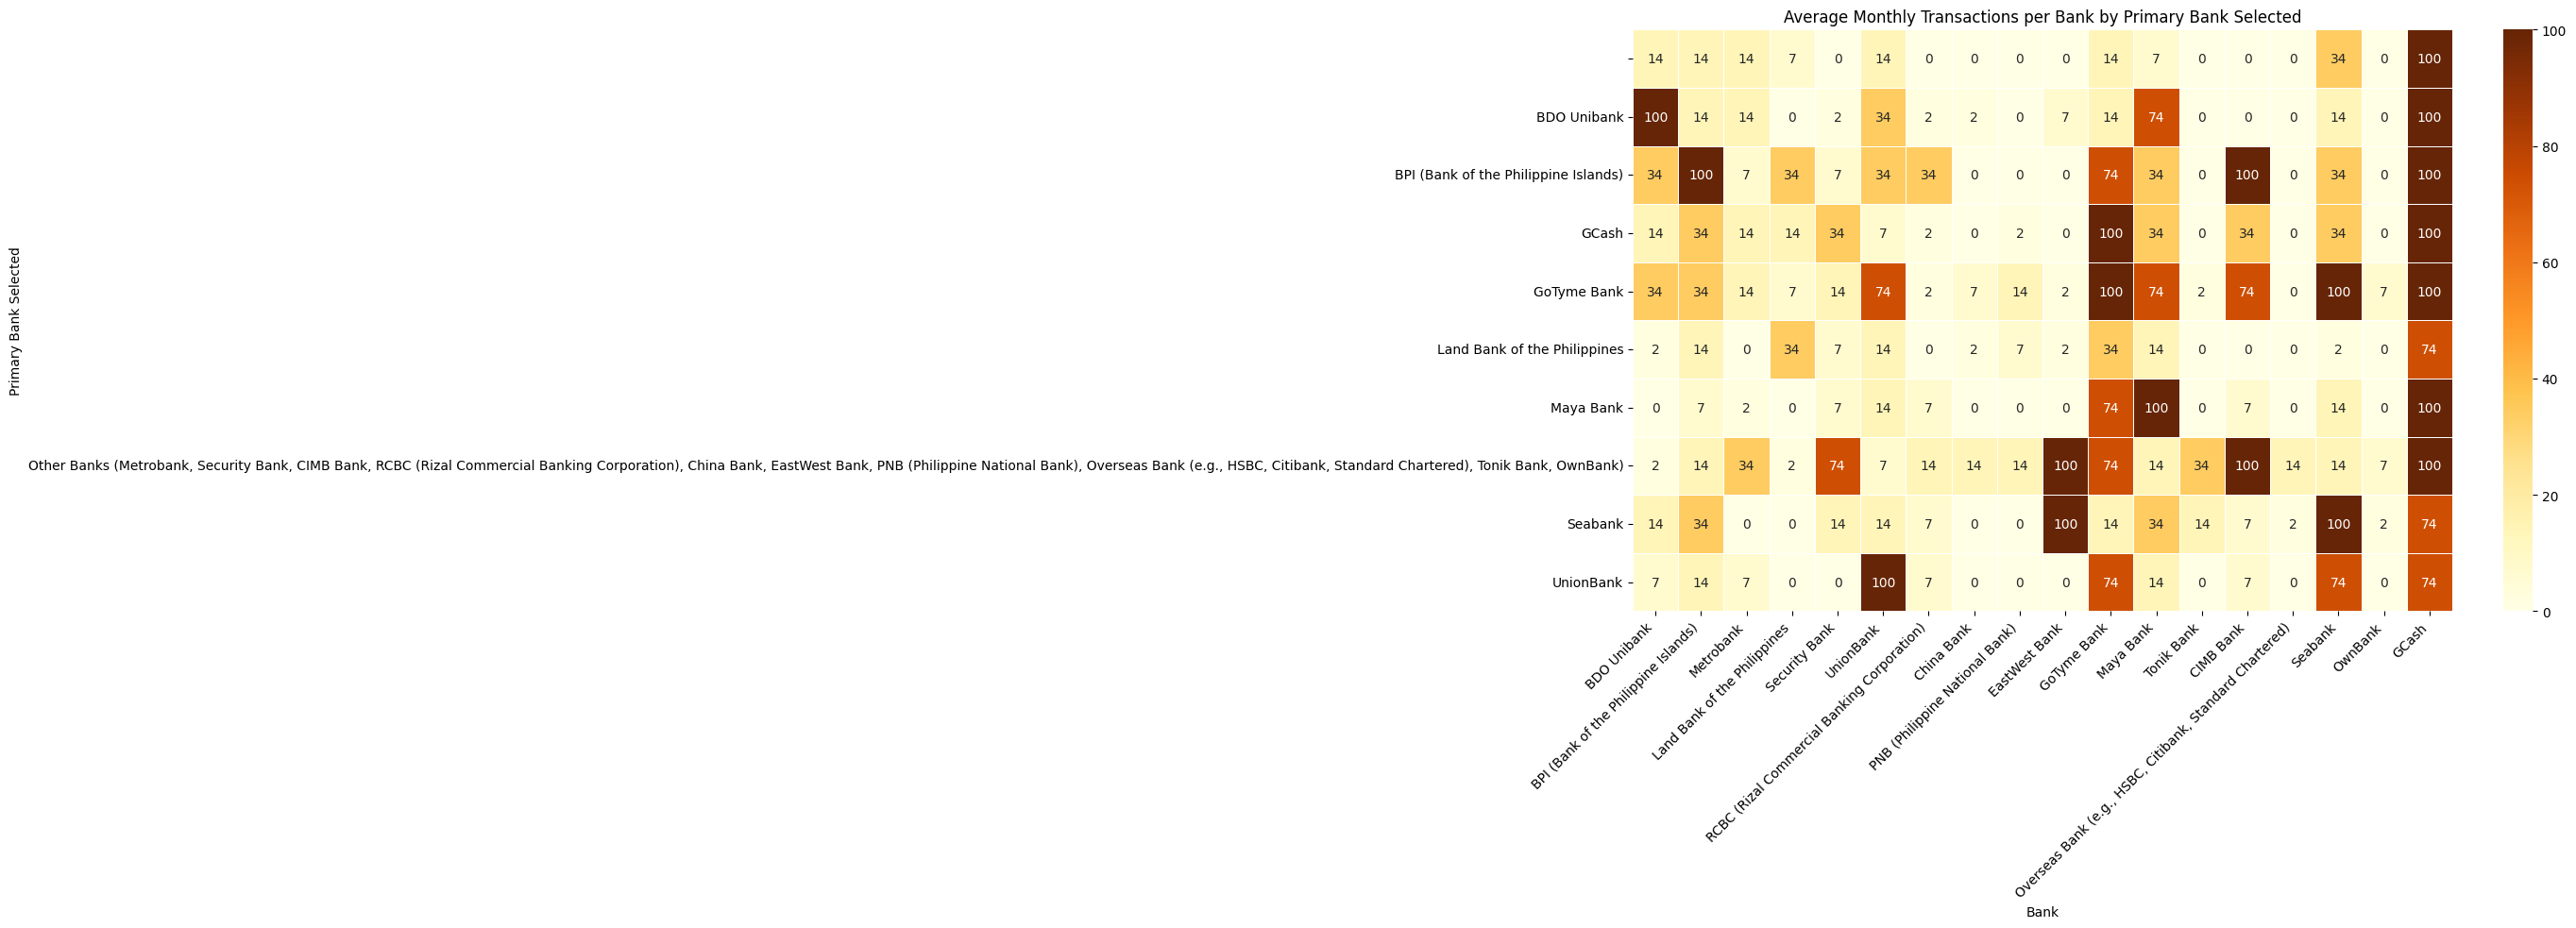

In [159]:
# Set the column with primary bank selections
primary_bank_col = 'Which bank do you consider as your main primary bank? - Response'

# Use transaction_cols for this analysis
df1 = merged_df[[primary_bank_col] + transaction_cols].copy()

# Convert all transaction columns to numeric
for col in transaction_cols:
    df1[col] = pd.to_numeric(df1[col], errors='coerce')

# Group by primary bank, compute mean for each transaction column
grouped_transactions = df1.groupby(primary_bank_col)[transaction_cols].max()

# Optional: clean column names for readability
grouped_transactions.columns = [col.split(" - ")[-1] for col in grouped_transactions.columns]

# Plot as heatmap
plt.figure(figsize=(14, 8))
sns.heatmap(grouped_transactions, annot=True, fmt=".0f", cmap="YlOrBr", linewidths=0.5)
plt.title("Average Monthly Transactions per Bank by Primary Bank Selected")
plt.xlabel("Bank")
plt.ylabel("Primary Bank Selected")
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()


In [160]:
merged_df['Which bank do you consider as your main primary bank? - Response'].value_counts()

Which bank do you consider as your main primary bank? - Response
                                                                                                                                                                                                                                            867
GoTyme Bank                                                                                                                                                                                                                                 642
BPI (Bank of the Philippine Islands)                                                                                                                                                                                                        171
GCash                                                                                                                                                                                                                                       165
Other Banks (Metrobank, Security Bank, CIMB Bank, RCBC (Rizal Commercial Banking Corporation), China Bank, EastWest Bank, PNB (Philippine National Bank), Overseas Bank (e.g., HSBC, Citibank, Standard Chartered), Tonik Bank, OwnBank)    103
BDO Unibank                                                                                                                                                                                                                                  81
Seabank                                                                                                                                                                                                                                      51
UnionBank                                                                                                                                                                                                                                    50
Maya Bank                                                                                                                                                                                                                                    35
Land Bank of the Philippines                                                                                                                                                                                                                 30
Name: count, dtype: int64

In [161]:
prim_bank_group = prim_3_df.groupby('Which bank do you consider as your main primary bank? - Response')

Which bank do you consider as your main primary bank? - Response
                                                                                                                                                                                                                                            Axes(0.125,0.11;0.775x0.77)
BDO Unibank                                                                                                                                                                                                                                 Axes(0.125,0.11;0.775x0.77)
BPI (Bank of the Philippine Islands)                                                                                                                                                                                                        Axes(0.125,0.11;0.775x0.77)
GCash                                                                                                                                                                                                                                       Axes(0.125,0.11;0.775x0.77)
GoTyme Bank                                                                                                                                                                                                                                 Axes(0.125,0.11;0.775x0.77)
Land Bank of the Philippines                                                                                                                                                                                                                Axes(0.125,0.11;0.775x0.77)
Maya Bank                                                                                                                                                                                                                                   Axes(0.125,0.11;0.775x0.77)
Other Banks (Metrobank, Security Bank, CIMB Bank, RCBC (Rizal Commercial Banking Corporation), China Bank, EastWest Bank, PNB (Philippine National Bank), Overseas Bank (e.g., HSBC, Citibank, Standard Chartered), Tonik Bank, OwnBank)    Axes(0.125,0.11;0.775x0.77)
Seabank                                                                                                                                                                                                                                     Axes(0.125,0.11;0.775x0.77)
UnionBank                                                                                                                                                                                                                                   Axes(0.125,0.11;0.775x0.77)
Name: How much is your usual balance in each bank? - BPI (Bank of the Philippine Islands), dtype: object

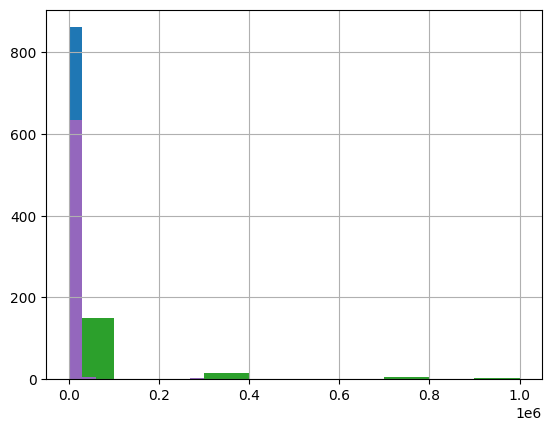

In [162]:
prim_bank_group['How much is your usual balance in each bank? - BPI (Bank of the Philippine Islands)'].hist()

/tmp/ipython-input-3865615634.py:45: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  plt.legend().remove()


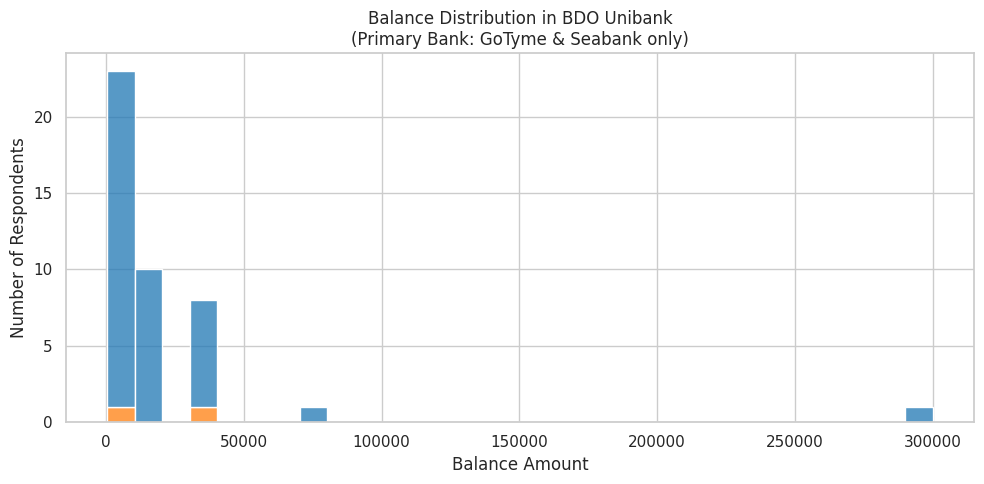

/tmp/ipython-input-3865615634.py:45: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  plt.legend().remove()


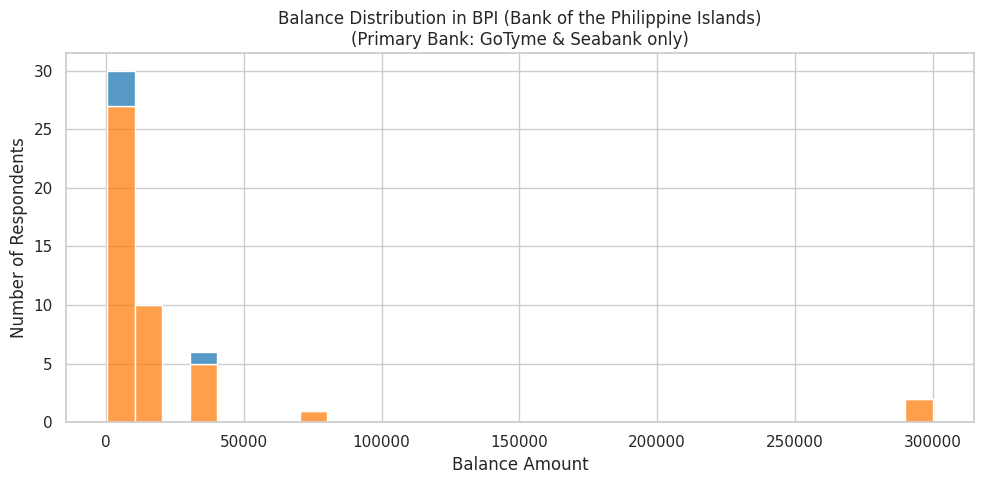

/tmp/ipython-input-3865615634.py:45: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  plt.legend().remove()


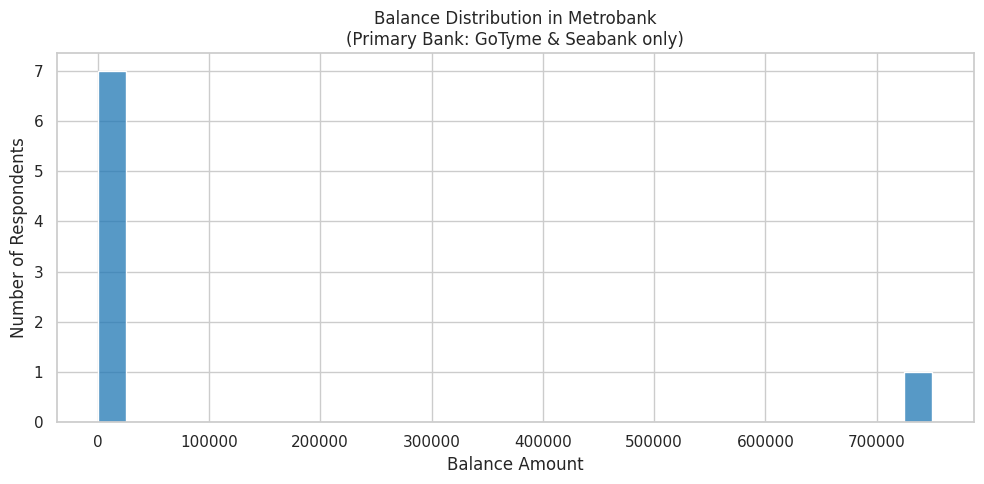

/tmp/ipython-input-3865615634.py:45: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  plt.legend().remove()


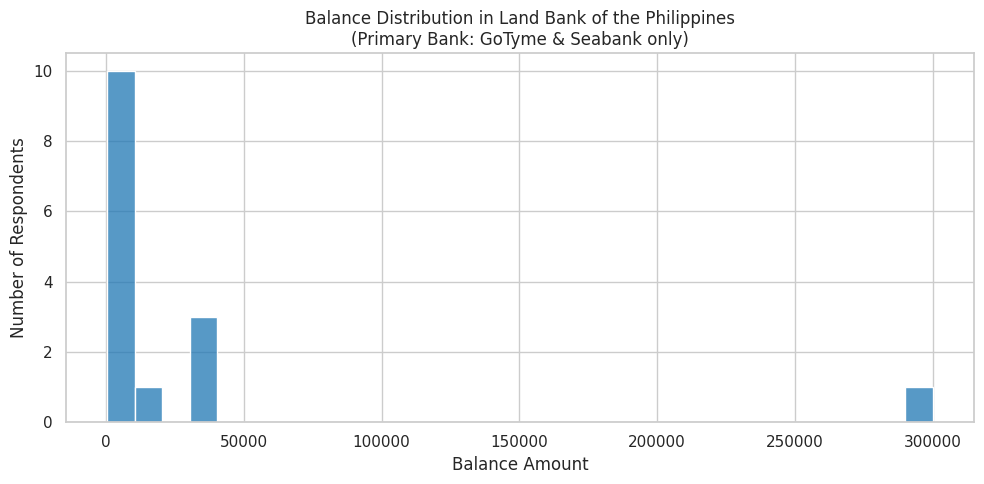

/tmp/ipython-input-3865615634.py:45: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  plt.legend().remove()


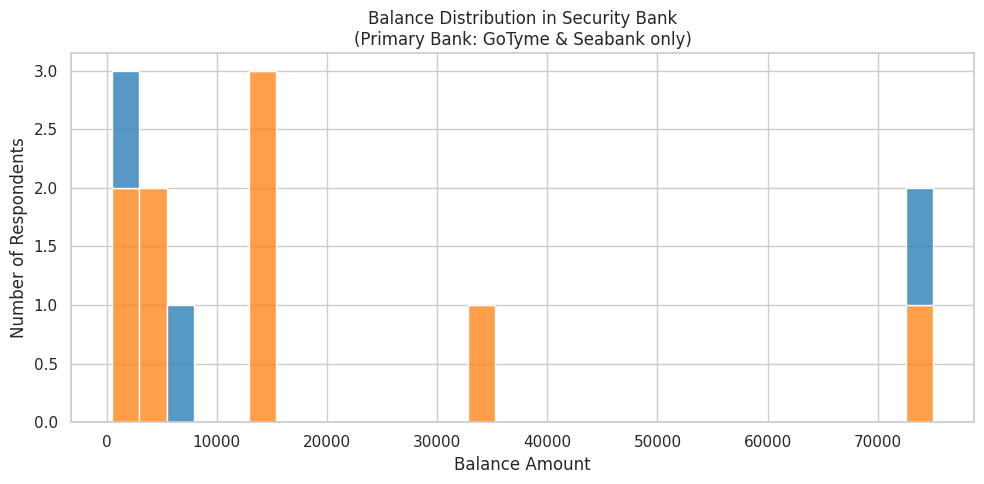

/tmp/ipython-input-3865615634.py:45: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  plt.legend().remove()


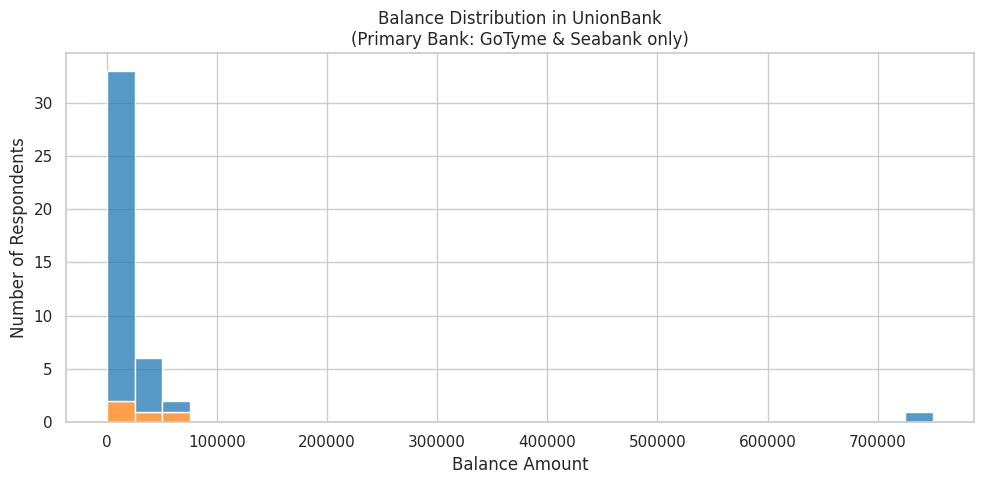

/tmp/ipython-input-3865615634.py:45: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  plt.legend().remove()


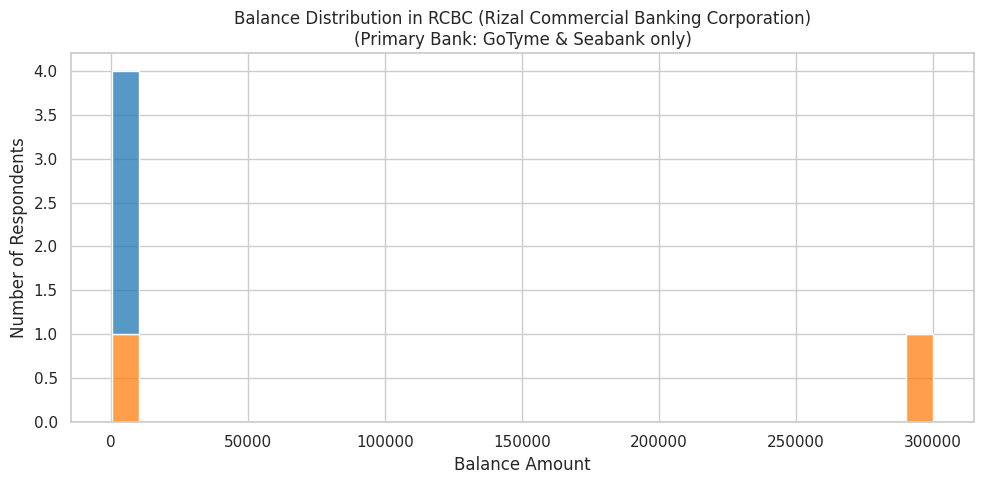

/tmp/ipython-input-3865615634.py:45: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  plt.legend().remove()


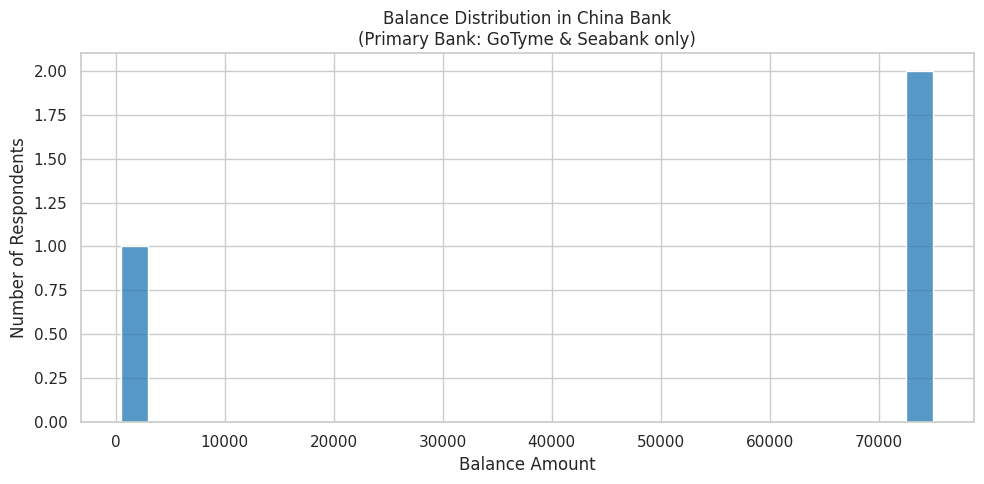

/tmp/ipython-input-3865615634.py:45: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  plt.legend().remove()


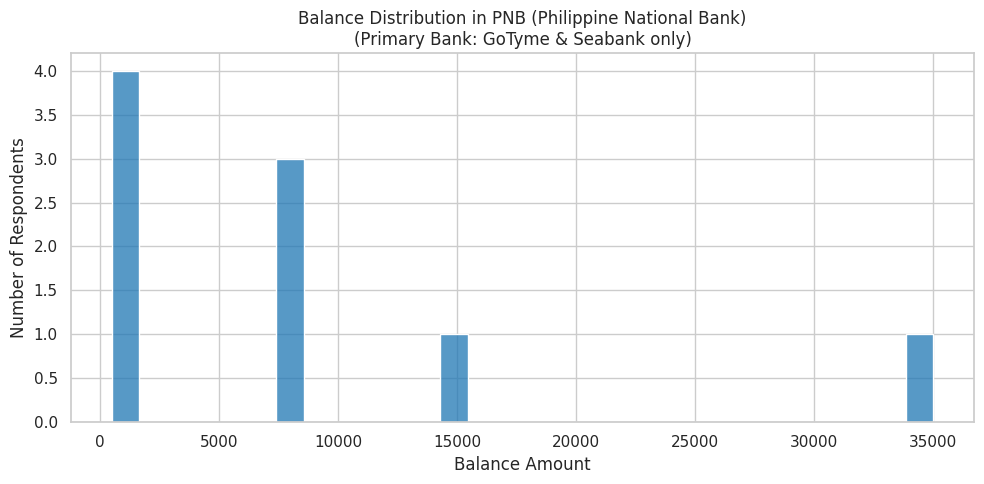

/tmp/ipython-input-3865615634.py:45: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  plt.legend().remove()


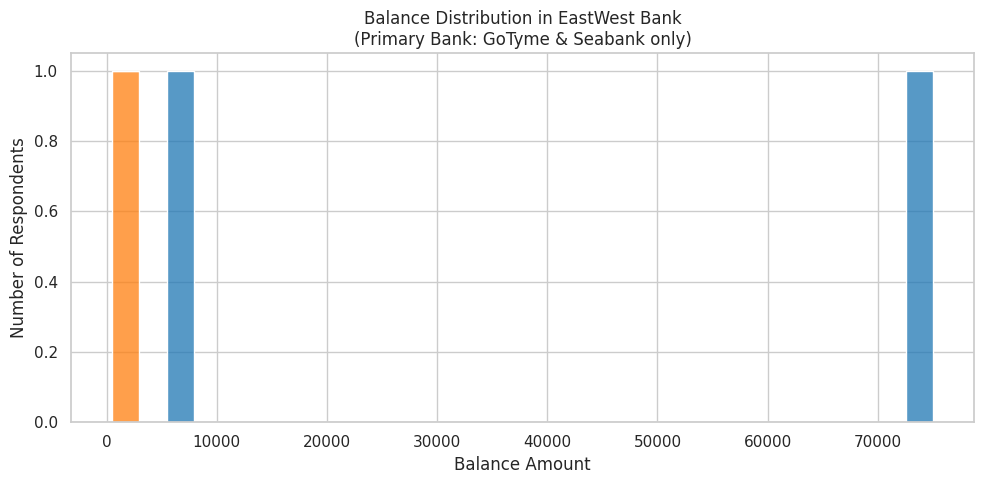

/tmp/ipython-input-3865615634.py:45: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  plt.legend().remove()


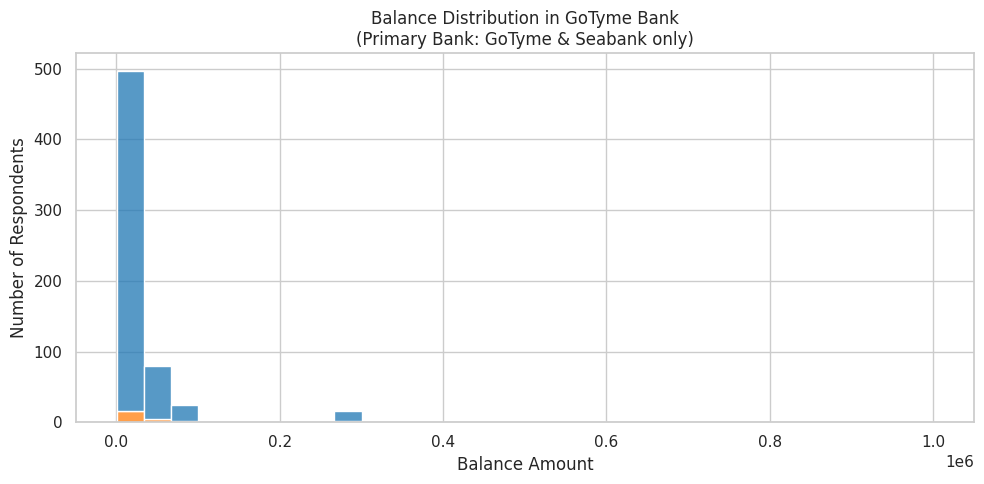

/tmp/ipython-input-3865615634.py:45: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  plt.legend().remove()


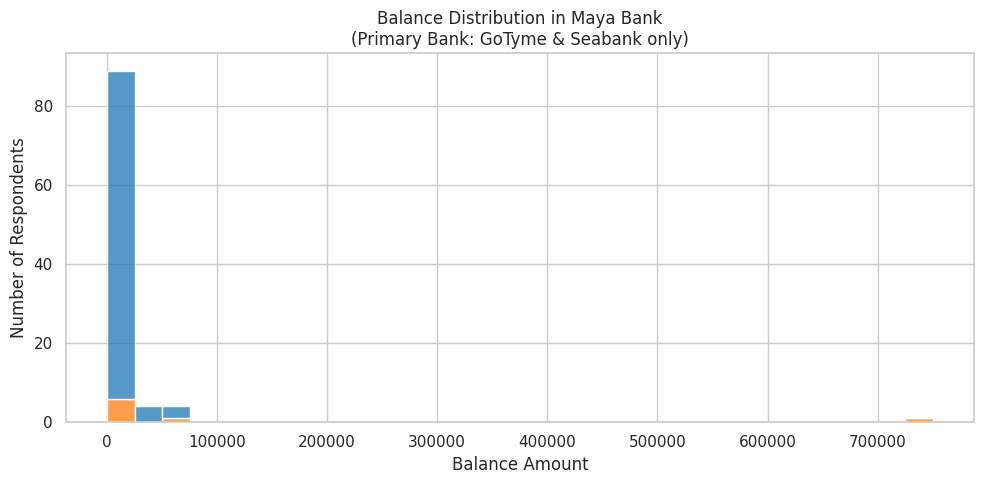

/tmp/ipython-input-3865615634.py:45: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  plt.legend().remove()


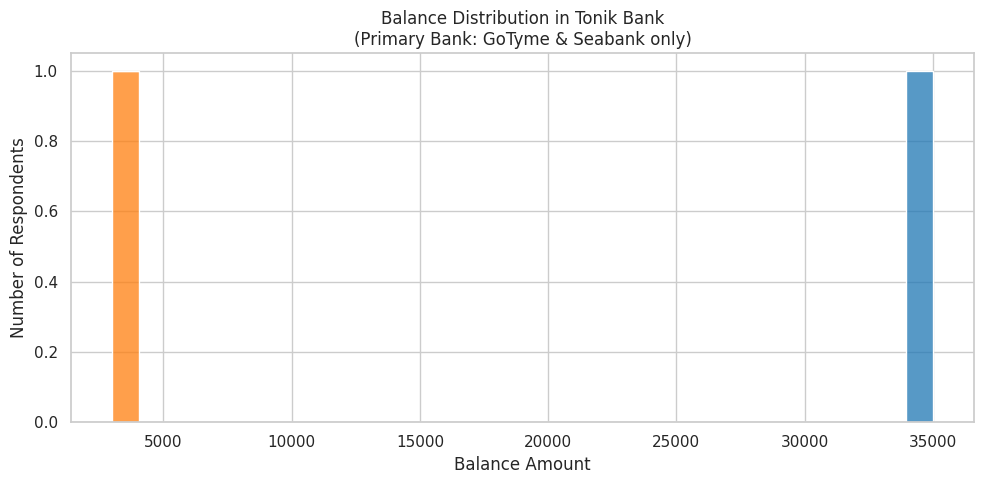

/tmp/ipython-input-3865615634.py:45: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  plt.legend().remove()


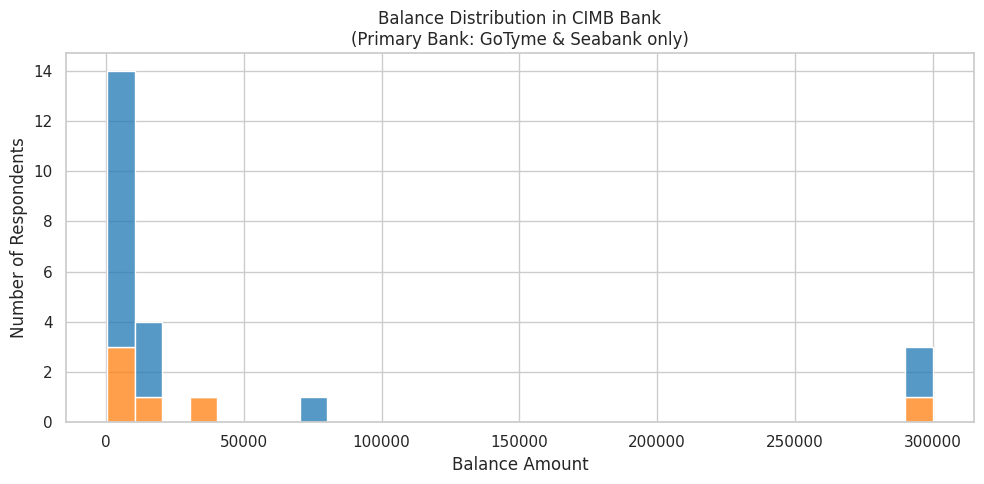

/tmp/ipython-input-3865615634.py:45: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  plt.legend().remove()


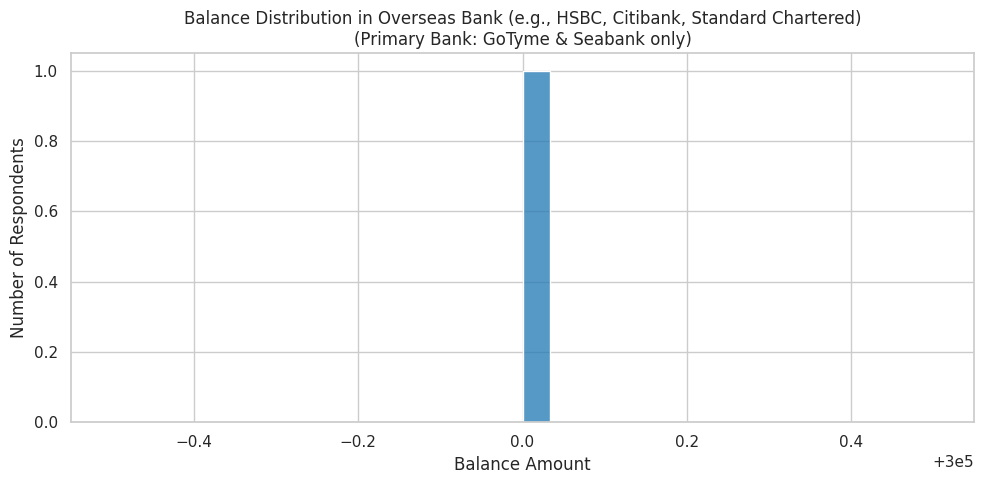

/tmp/ipython-input-3865615634.py:45: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  plt.legend().remove()


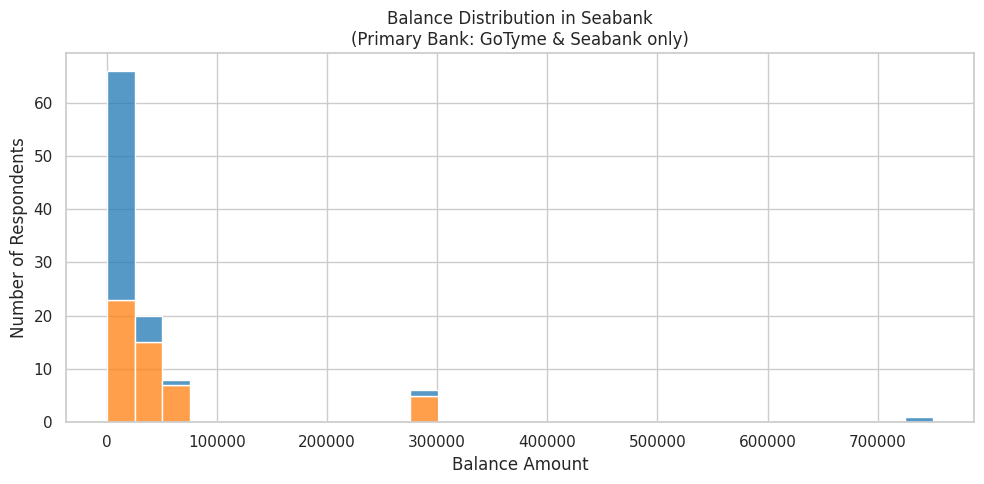

/tmp/ipython-input-3865615634.py:45: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  plt.legend().remove()


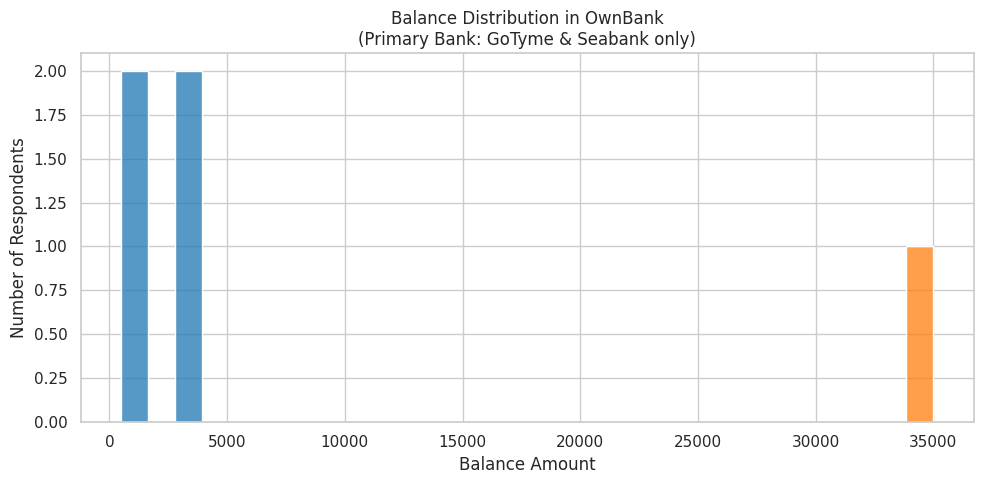

/tmp/ipython-input-3865615634.py:45: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  plt.legend().remove()


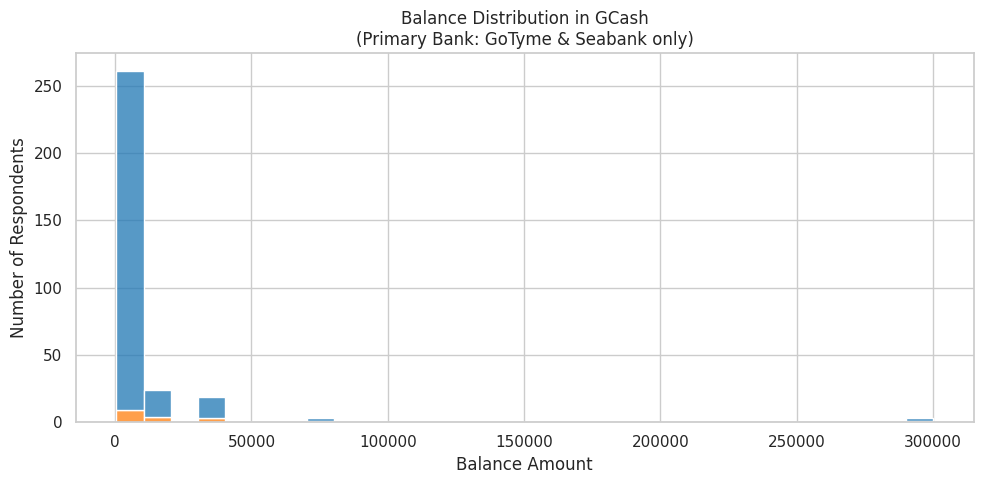

In [163]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Primary bank column
primary_bank_col = 'Which bank do you consider as your main primary bank? - Response'

# Banks to include as primary
target_primary_banks = ['GoTyme Bank', 'Seabank']

# Convert balance columns to numeric
for col in bank_cols:
    prim_3_df[col] = pd.to_numeric(prim_3_df[col], errors='coerce')

# Set plot style
sns.set(style="whitegrid")

# Plot each bank column with values > 0 and only selected primary banks
for col in bank_cols:
    # Filter by balance and selected primary banks
    filtered_df = prim_3_df[
        (prim_3_df[col] > 0) &
        (prim_3_df[primary_bank_col].isin(target_primary_banks))
    ]

    # Skip empty data
    if filtered_df.empty:
        continue

    plt.figure(figsize=(10, 5))
    sns.histplot(
        data=filtered_df,
        x=col,
        hue=primary_bank_col,
        multiple='stack',
        bins=30,
        palette='tab10'
    )

    bank_name = col.split(" - ")[-1]
    plt.title(f"Balance Distribution in {bank_name}\n(Primary Bank: GoTyme & Seabank only)")
    plt.xlabel("Balance Amount")
    plt.ylabel("Number of Respondents")
    plt.tight_layout()
    plt.legend().remove()
    plt.show()


In [164]:
prim_3_df['How much is your usual balance in each bank? - BDO Unibank'].value_counts()

How much is your usual balance in each bank? - BDO Unibank
0          2032
35000        32
7500         31
15000        31
3000         29
75000        12
300000       12
500          11
1000000       3
750000        2
Name: count, dtype: int64

/tmp/ipython-input-3117754471.py:28: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=avg_balance_df, x='Bank', y='Average Balance', palette='coolwarm')


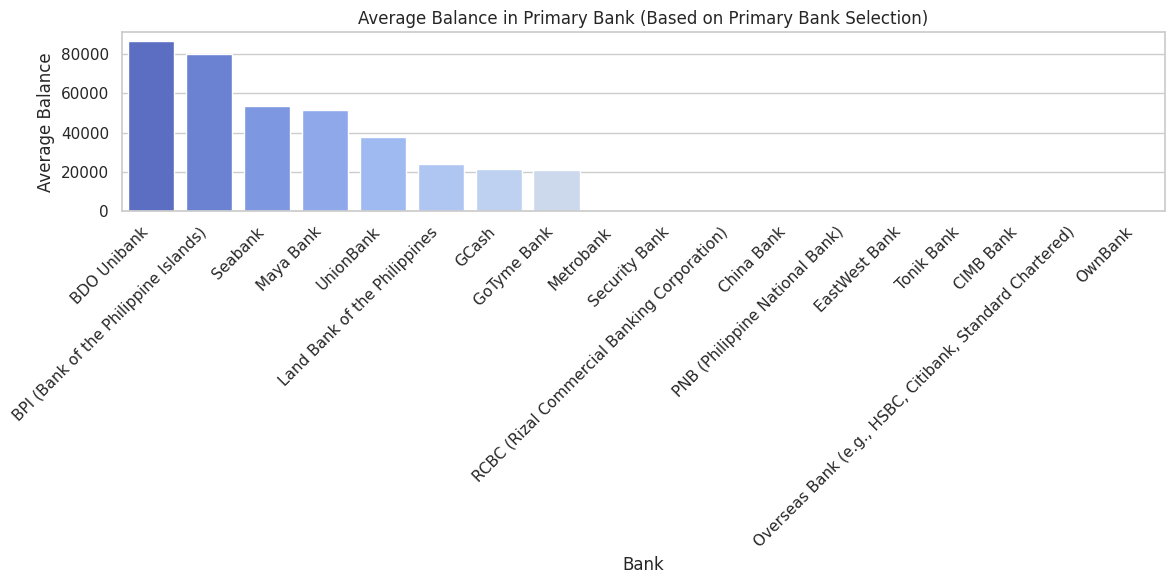

In [165]:
# Column that identifies the primary bank
primary_bank_col = 'Which bank do you consider as your main primary bank? - Response'

# Subset only balance-related columns + primary bank
balance_df = merged_df[[primary_bank_col] + bank_cols]

# Create a dictionary to store average balances per primary bank
average_balances = {}

# Loop through each bank
for col in bank_cols:
    # Extract bank name from the column
    bank_name = col.split(" - ")[-1]

    # Filter rows where this bank is the respondent's primary bank
    mask = balance_df[primary_bank_col] == bank_name

    # Calculate the average balance in that specific bank column
    avg_balance = balance_df.loc[mask, col].mean()

    average_balances[bank_name] = avg_balance

# Convert to DataFrame
avg_balance_df = pd.DataFrame(list(average_balances.items()), columns=['Bank', 'Average Balance']).sort_values(by='Average Balance', ascending=False)

# Plot
plt.figure(figsize=(12, 6))
sns.barplot(data=avg_balance_df, x='Bank', y='Average Balance', palette='coolwarm')
plt.xticks(rotation=45, ha='right')
plt.title('Average Balance in Primary Bank (Based on Primary Bank Selection)')
plt.xlabel('Bank')
plt.ylabel('Average Balance')
plt.tight_layout()
plt.show()


NPS Per primary bank = nps_by_bank_all

NPS per top5 bank - df_nps_top5

NPS per top3 bank - df_nps_top3

NPS Per q16 - experienced security issues - nps_by_q16

NPS per q29 - employment - nps_by_q30

NPS per q30 - monthly income - nps_by_q29

nps per q17 - general nps to q16 - security issues - nps_by_q16_q17

Nps per q17 - general nps to primary bank -= nps_by_q17_primbank


In [166]:
banks = ['GoTyme Bank', 'BPI (Bank of the Philippine Islands)', 'GCash', 'BDO Unibank', OTHER_BANKS]

# Ensure bank names in the DataFrame are in lowercase for case-insensitive matching
q12_df = nps_by_bank_all[
    nps_by_bank_all['Question'].str.startswith('q12', na=False) &
    nps_by_bank_all['Bank'].str.lower().isin(banks)
]

In [167]:
merged_df['Which bank do you consider as your main primary bank? - Response'].value_counts()

Which bank do you consider as your main primary bank? - Response
                                                                                                                                                                                                                                            867
GoTyme Bank                                                                                                                                                                                                                                 642
BPI (Bank of the Philippine Islands)                                                                                                                                                                                                        171
GCash                                                                                                                                                                                                                                       165
Other Banks (Metrobank, Security Bank, CIMB Bank, RCBC (Rizal Commercial Banking Corporation), China Bank, EastWest Bank, PNB (Philippine National Bank), Overseas Bank (e.g., HSBC, Citibank, Standard Chartered), Tonik Bank, OwnBank)    103
BDO Unibank                                                                                                                                                                                                                                  81
Seabank                                                                                                                                                                                                                                      51
UnionBank                                                                                                                                                                                                                                    50
Maya Bank                                                                                                                                                                                                                                    35
Land Bank of the Philippines                                                                                                                                                                                                                 30
Name: count, dtype: int64

In [168]:
from google.colab import files
# List of questions
question_prefixes = ["q12", "q13", "q14", "q15", "q19", "q20", "q21", "q22", "q23", "q24"]

# List of banks
banks = [
    'GoTyme Bank',
    'BPI (Bank of the Philippine Islands)',
    'GCash',
    'BDO Unibank',
    OTHER_BANKS,
    'Seabank',
    'UnionBank',
    'Maya Bank',
    'Metrobank',
    'Land Bank of the Philippines'
]

# Loop through each question, filter, save, and download as CSV
for q in question_prefixes:
    filtered_df = nps_by_bank_all[
        nps_by_bank_all['Question'].str.startswith(q, na=False) &
        nps_by_bank_all['Bank'].isin(banks)
    ]

    # Create file name
    file_name = f"{q}, q3-2025.csv"

    # Save to CSV
    filtered_df.to_csv(file_name, index=False)

    # Trigger download
    files.download(file_name)

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

In [169]:
merged_df[
    merged_df['Which bank do you consider as your main primary bank? - Response'] == 'BDO Unibank'
]['q12 - I am satisfied in my overall experience with GoTyme Bank.(Nasisiyahan ako sa aking overall experience gamit ang GoTyme Bank.)'].value_counts()


q12 - I am satisfied in my overall experience with GoTyme Bank.(Nasisiyahan ako sa aking overall experience gamit ang GoTyme Bank.)
10    37
8     16
9     11
5      4
7      4
6      4
Name: count, dtype: int64

In [170]:
merged_df['Which bank do you consider as your main primary bank? - Response'].value_counts()

Which bank do you consider as your main primary bank? - Response
                                                                                                                                                                                                                                            867
GoTyme Bank                                                                                                                                                                                                                                 642
BPI (Bank of the Philippine Islands)                                                                                                                                                                                                        171
GCash                                                                                                                                                                                                                                       165
Other Banks (Metrobank, Security Bank, CIMB Bank, RCBC (Rizal Commercial Banking Corporation), China Bank, EastWest Bank, PNB (Philippine National Bank), Overseas Bank (e.g., HSBC, Citibank, Standard Chartered), Tonik Bank, OwnBank)    103
BDO Unibank                                                                                                                                                                                                                                  81
Seabank                                                                                                                                                                                                                                      51
UnionBank                                                                                                                                                                                                                                    50
Maya Bank                                                                                                                                                                                                                                    35
Land Bank of the Philippines                                                                                                                                                                                                                 30
Name: count, dtype: int64

**Heatmap of spend/transaction/balance**

/tmp/ipython-input-313845049.py:17: UserWarning: Tight layout not applied. The left and right margins cannot be made large enough to accommodate all Axes decorations.
  plt.tight_layout()


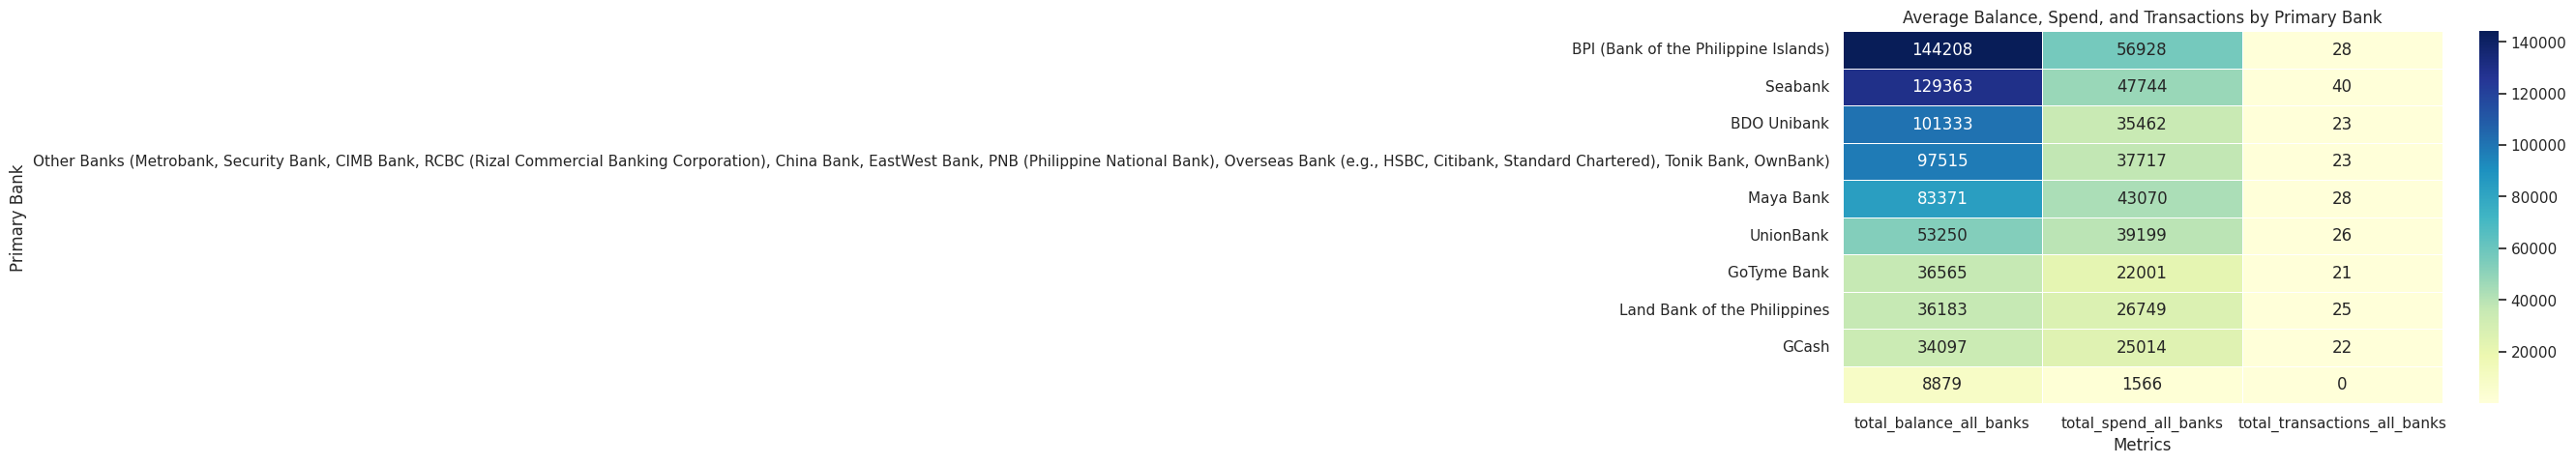

In [171]:
# Select relevant columns
heatmap_data = merged_df.groupby(
    'Which bank do you consider as your main primary bank? - Response'
)[['total_balance_all_banks', 'total_spend_all_banks', 'total_transactions_all_banks']].mean()

# Optional: sort banks by total balance or another metric
heatmap_data = heatmap_data.sort_values(by='total_balance_all_banks', ascending=False)

# Set up the heatmap
plt.figure(figsize=(10, len(heatmap_data) * 0.5))  # height adjusts to number of banks
sns.heatmap(heatmap_data, annot=True, fmt=".0f", cmap="YlGnBu", linewidths=0.5)

plt.title("Average Balance, Spend, and Transactions by Primary Bank")
plt.xlabel("Metrics")
plt.ylabel("Primary Bank")

plt.tight_layout()
plt.show()

In [172]:
merged_df.groupby('Which bank do you consider as your main primary bank? - Response')['total_balance_all_banks'].mean()

Which bank do you consider as your main primary bank? - Response
                                                                                                                                                                                                                                              8879.469435
BDO Unibank                                                                                                                                                                                                                                 101333.333333
BPI (Bank of the Philippine Islands)                                                                                                                                                                                                        144207.602339
GCash                                                                                                                                                                                                                                        34096.969697
GoTyme Bank                                                                                                                                                                                                                                  36564.641745
Land Bank of the Philippines                                                                                                                                                                                                                 36183.333333
Maya Bank                                                                                                                                                                                                                                    83371.428571
Other Banks (Metrobank, Security Bank, CIMB Bank, RCBC (Rizal Commercial Banking Corporation), China Bank, EastWest Bank, PNB (Philippine National Bank), Overseas Bank (e.g., HSBC, Citibank, Standard Chartered), Tonik Bank, OwnBank)     97514.563107
Seabank                                                                                                                                                                                                                                     129362.745098
UnionBank                                                                                                                                                                                                                                    53250.000000
Name: total_balance_all_banks, dtype: float64

                           Primary Bank  Average Balance  Average Spend  \
4                           BDO Unibank     86734.567901   23425.148148   
0  BPI (Bank of the Philippine Islands)     79795.321637   34546.011696   
6                               Seabank     53745.098039   27401.215686   
7                             Maya Bank     51357.142857   23213.714286   
3                             UnionBank     37880.000000   20649.280000   
5          Land Bank of the Philippines     23783.333333   14749.466667   
2                                 GCash     21527.272727   15060.090909   
1                           GoTyme Bank     20745.327103   12296.985981   

   Average Transactions  
4             11.271605  
0             11.760234  
6             24.803922  
7             15.457143  
3             11.700000  
5              9.233333  
2             15.896970  
1             11.591900  


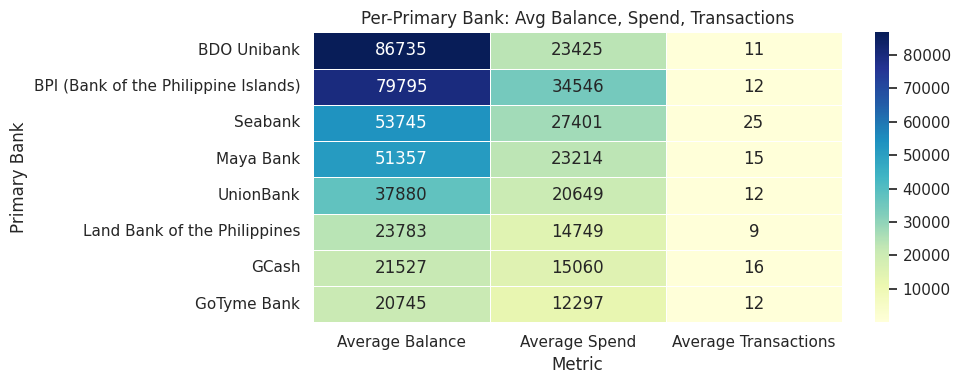

In [173]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from google.colab import files

# Make a safe copy
df = merged_df.copy()

# Prefixes
balance_prefix = "How much is your usual balance in each bank? - "
spend_prefix = "How much do you usually spend per month using your primary bank? (Include expenses like bills payment, transfers, online/offline purchases, subscriptions, etc.) - "
txn_prefix = "How many transactions do you perform per month using your primary bank? (Include fund transfers, ATM withdrawals, bills payments, purchases, loan payments, etc.) - "

# Get unique primary bank names
primary_banks = df['Which bank do you consider as your main primary bank? - Response'].dropna().unique()

# Collect results
records = []

for bank in primary_banks:
    balance_col = balance_prefix + bank
    spend_col = spend_prefix + bank
    txn_col = txn_prefix + bank

    # Check if all columns exist
    if all(col in df.columns for col in [balance_col, spend_col, txn_col]):
        bank_df = df[df['Which bank do you consider as your main primary bank? - Response'] == bank]

        avg_balance = bank_df[balance_col].mean()
        avg_spend = bank_df[spend_col].mean()
        avg_txns = bank_df[txn_col].mean()

        records.append({
            "Primary Bank": bank,
            "Average Balance": avg_balance,
            "Average Spend": avg_spend,
            "Average Transactions": avg_txns
        })
    else:
        # Skip silently if any column is missing
        continue

# Create the result DataFrame
bank_metrics_df = pd.DataFrame(records)

# If there's data, show and export
if not bank_metrics_df.empty:
    bank_metrics_df = bank_metrics_df.sort_values(by="Average Balance", ascending=False)
    print(bank_metrics_df)

    # Export to CSV and download
    # csv_name = "per_primary_bank_metrics.csv"
    # bank_metrics_df.to_csv(csv_name, index=False)
    # files.download(csv_name)

    # Plot heatmap
    plt.figure(figsize=(10, len(bank_metrics_df) * 0.5))
    sns.heatmap(bank_metrics_df.set_index("Primary Bank"), annot=True, fmt=".0f", cmap="YlGnBu", linewidths=0.5)

    plt.title("Per-Primary Bank: Avg Balance, Spend, Transactions")
    plt.xlabel("Metric")
    plt.ylabel("Primary Bank")
    plt.tight_layout()
    plt.show()
else:
    print("⚠️ No complete data available for any primary bank (check column existence).")


                           Primary Bank  Avg Balance (midpoint)  \
4                           BDO Unibank            86734.567901   
0  BPI (Bank of the Philippine Islands)            79795.321637   
6                               Seabank            53745.098039   
7                             Maya Bank            51357.142857   
3                             UnionBank            37880.000000   
5          Land Bank of the Philippines            23783.333333   
2                                 GCash            21527.272727   
1                           GoTyme Bank            20745.327103   

   Mode Balance (bin)  Avg Spend (midpoint)  Mode Spend (bin)  \
4                3000          23425.148148              7499   
0               35000          34546.011696              7499   
6               35000          27401.215686              2500   
7                3000          23213.714286              2500   
3                 500          20649.280000              2500   
5     

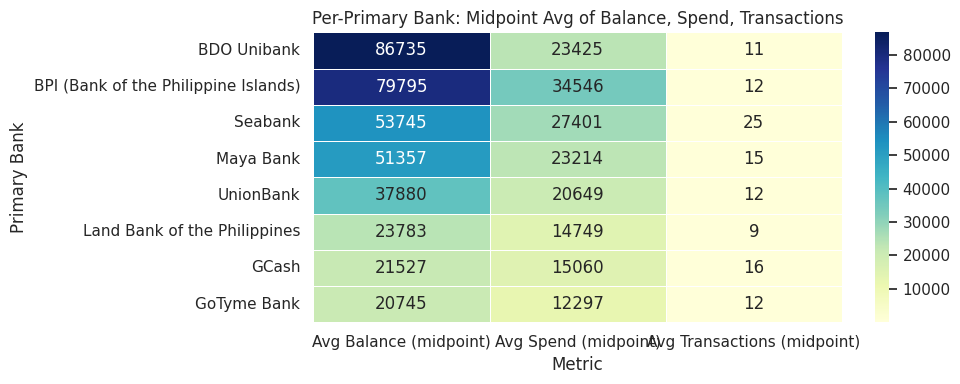

In [174]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from google.colab import files

# Safe copy
df = merged_df.copy()

# Prefixes
balance_prefix = "How much is your usual balance in each bank? - "
spend_prefix = "How much do you usually spend per month using your primary bank? (Include expenses like bills payment, transfers, online/offline purchases, subscriptions, etc.) - "
txn_prefix = "How many transactions do you perform per month using your primary bank? (Include fund transfers, ATM withdrawals, bills payments, purchases, loan payments, etc.) - "

# Unique banks
primary_banks = df['Which bank do you consider as your main primary bank? - Response'].dropna().unique()

records = []

for bank in primary_banks:
    balance_col = balance_prefix + bank
    spend_col = spend_prefix + bank
    txn_col = txn_prefix + bank

    if all(col in df.columns for col in [balance_col, spend_col, txn_col]):
        bank_df = df[df['Which bank do you consider as your main primary bank? - Response'] == bank]

        # Mean of midpoint values
        avg_balance = bank_df[balance_col].mean()
        avg_spend = bank_df[spend_col].mean()
        avg_txns = bank_df[txn_col].mean()

        # Mode (most common bin label) using original values
        mode_balance = bank_df[balance_col].mode().iloc[0] if not bank_df[balance_col].mode().empty else None
        mode_spend = bank_df[spend_col].mode().iloc[0] if not bank_df[spend_col].mode().empty else None
        mode_txns = bank_df[txn_col].mode().iloc[0] if not bank_df[txn_col].mode().empty else None

        records.append({
            "Primary Bank": bank,
            "Avg Balance (midpoint)": avg_balance,
            "Mode Balance (bin)": mode_balance,
            "Avg Spend (midpoint)": avg_spend,
            "Mode Spend (bin)": mode_spend,
            "Avg Transactions (midpoint)": avg_txns,
            "Mode Transactions (bin)": mode_txns
        })

# Create result DataFrame
bank_metrics_df = pd.DataFrame(records)

if not bank_metrics_df.empty:
    bank_metrics_df = bank_metrics_df.sort_values(by="Avg Balance (midpoint)", ascending=False)

    # Show full table
    print(bank_metrics_df)

    # Optional: download CSV
    csv_name = "per_primary_bank_metrics_with_mode.csv"
    bank_metrics_df.to_csv(csv_name, index=False)
    # files.download(csv_name)

    # Optional: heatmap only for midpoint values
    heatmap_data = bank_metrics_df.set_index("Primary Bank")[
        ["Avg Balance (midpoint)", "Avg Spend (midpoint)", "Avg Transactions (midpoint)"]
    ]

    plt.figure(figsize=(10, len(heatmap_data) * 0.5))
    sns.heatmap(heatmap_data, annot=True, fmt=".0f", cmap="YlGnBu", linewidths=0.5)

    plt.title("Per-Primary Bank: Midpoint Avg of Balance, Spend, Transactions")
    plt.xlabel("Metric")
    plt.ylabel("Primary Bank")
    plt.tight_layout()
    plt.show()
else:
    print("⚠️ No complete data available for any primary bank (check column existence).")


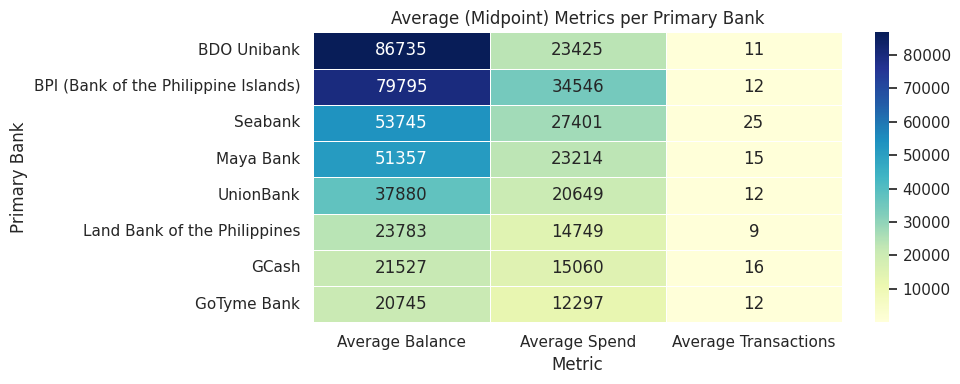

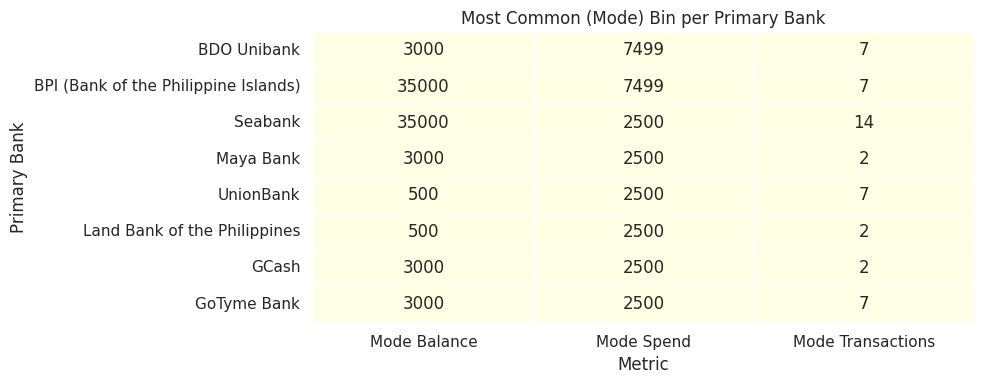

In [175]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from google.colab import files

# Make a safe copy
df = merged_df.copy()

# Prefixes
balance_prefix = "How much is your usual balance in each bank? - "
spend_prefix = "How much do you usually spend per month using your primary bank? (Include expenses like bills payment, transfers, online/offline purchases, subscriptions, etc.) - "
txn_prefix = "How many transactions do you perform per month using your primary bank? (Include fund transfers, ATM withdrawals, bills payments, purchases, loan payments, etc.) - "

# Unique primary banks
primary_banks = df['Which bank do you consider as your main primary bank? - Response'].dropna().unique()

# Collect data
records = []

for bank in primary_banks:
    balance_col = balance_prefix + bank
    spend_col = spend_prefix + bank
    txn_col = txn_prefix + bank

    if all(col in df.columns for col in [balance_col, spend_col, txn_col]):
        bank_df = df[df['Which bank do you consider as your main primary bank? - Response'] == bank]

        # Metrics
        avg_balance = bank_df[balance_col].mean()
        avg_spend = bank_df[spend_col].mean()
        avg_txns = bank_df[txn_col].mean()

        mode_balance = bank_df[balance_col].mode().iloc[0] if not bank_df[balance_col].mode().empty else None
        mode_spend = bank_df[spend_col].mode().iloc[0] if not bank_df[spend_col].mode().empty else None
        mode_txns = bank_df[txn_col].mode().iloc[0] if not bank_df[txn_col].mode().empty else None

        respondent_count = len(bank_df)

        records.append({
            "Primary Bank": bank,
            "Primary Bank + n": f"{bank}",
            "Average Balance": avg_balance,
            "Mode Balance": mode_balance,
            "Average Spend": avg_spend,
            "Mode Spend": mode_spend,
            "Average Transactions": avg_txns,
            "Mode Transactions": mode_txns
        })

# Create DataFrame
bank_metrics_df = pd.DataFrame(records)

if not bank_metrics_df.empty:
    # Sort by average balance
    bank_metrics_df = bank_metrics_df.sort_values(by="Average Balance", ascending=False)

    # --- HEATMAP 1: Averages with Respondent Count ---
    avg_cols = ["Average Balance", "Average Spend", "Average Transactions"]
    plt.figure(figsize=(10, len(bank_metrics_df) * 0.5))
    sns.heatmap(
        bank_metrics_df.set_index("Primary Bank + n")[avg_cols],
        annot=True,
        fmt=".0f",
        cmap="YlGnBu",
        linewidths=0.5
    )
    plt.title("Average (Midpoint) Metrics per Primary Bank")
    plt.xlabel("Metric")
    plt.ylabel("Primary Bank")
    plt.tight_layout()
    plt.show()

    # --- HEATMAP 2: Modes without Respondent Count ---
    mode_cols = ["Mode Balance", "Mode Spend", "Mode Transactions"]
    mode_data = bank_metrics_df.set_index("Primary Bank")[mode_cols].astype(str)

    plt.figure(figsize=(10, len(mode_data) * 0.5))

    dummy_data = [[0]*len(mode_cols)] * len(mode_data)

    sns.heatmap(
        dummy_data,
        annot=mode_data,
        fmt="",
        cmap="YlOrBr",
        linewidths=0.5,
        cbar=False,
        xticklabels=mode_cols,
        yticklabels=mode_data.index
    )
    plt.title("Most Common (Mode) Bin per Primary Bank")
    plt.xlabel("Metric")
    plt.ylabel("Primary Bank")
    plt.tight_layout()
    plt.show()

else:
    print("⚠️ No complete data available for any primary bank (check column existence).")


In [176]:
# Show final DataFrame with all computed metrics (CSV-style table)
display_columns = [
    "Primary Bank",
    "Average Balance", "Mode Balance",
    "Average Spend", "Mode Spend",
    "Average Transactions", "Mode Transactions"
]

print(bank_metrics_df[display_columns].to_string(index=False))


                        Primary Bank  Average Balance  Mode Balance  Average Spend  Mode Spend  Average Transactions  Mode Transactions
                         BDO Unibank     86734.567901          3000   23425.148148        7499             11.271605                  7
BPI (Bank of the Philippine Islands)     79795.321637         35000   34546.011696        7499             11.760234                  7
                             Seabank     53745.098039         35000   27401.215686        2500             24.803922                 14
                           Maya Bank     51357.142857          3000   23213.714286        2500             15.457143                  2
                           UnionBank     37880.000000           500   20649.280000        2500             11.700000                  7
        Land Bank of the Philippines     23783.333333           500   14749.466667        2500              9.233333                  2
                               GCash     21527.2

In [177]:
csv_export_name = "bank_metrics_summary.csv"
bank_metrics_df[display_columns].to_csv(csv_export_name, index=False)
# files.download(csv_export_name)

**Verify data**

In [178]:
merged_df[merged_df['Which bank do you consider as your main primary bank? - Response'] == 'GoTyme Bank']['How much is your usual balance in each bank? - GoTyme Bank'].mean()

np.float64(20745.327102803738)

In [179]:
profile_df[profile_df['Which bank do you consider as your main primary bank? - Response'] == 'GoTyme Bank']['How much is your usual balance in each bank? - GoTyme Bank'].mean()

np.float64(20745.327102803738)

In [180]:
merged_df[merged_df['Which bank do you consider as your main primary bank? - Response'] == 'GCash']['How much is your usual balance in each bank? - GCash'].mean()

np.float64(21527.272727272728)

In [181]:
merged_df[merged_df['Which bank do you consider as your main primary bank? - Response'] == 'Seabank']['How much is your usual balance in each bank? - Seabank'].mean()

np.float64(53745.098039215685)

In [182]:
print(average_balances)

{'BDO Unibank': np.float64(86734.56790123456), 'BPI (Bank of the Philippine Islands)': np.float64(79795.3216374269), 'Metrobank': nan, 'Land Bank of the Philippines': np.float64(23783.333333333332), 'Security Bank': nan, 'UnionBank': np.float64(37880.0), 'RCBC (Rizal Commercial Banking Corporation)': nan, 'China Bank': nan, 'PNB (Philippine National Bank)': nan, 'EastWest Bank': nan, 'GoTyme Bank': np.float64(20745.327102803738), 'Maya Bank': np.float64(51357.142857142855), 'Tonik Bank': nan, 'CIMB Bank': nan, 'Overseas Bank (e.g., HSBC, Citibank, Standard Chartered)': nan, 'Seabank': np.float64(53745.098039215685), 'OwnBank': nan, 'GCash': np.float64(21527.272727272728)}


In [183]:
merged_df[merged_df['Which bank do you consider as your main primary bank? - Response'] == 'Seabank']['How much is your usual balance in each bank? - Seabank'].value_counts()

How much is your usual balance in each bank? - Seabank
35000     15
7500       8
15000      8
75000      7
300000     5
500        4
3000       3
0          1
Name: count, dtype: int64

In [184]:
merged_df[merged_df['Which bank do you consider as your main primary bank? - Response'] == 'GoTyme Bank']['How much is your usual balance in each bank? - GoTyme Bank'].value_counts()

How much is your usual balance in each bank? - GoTyme Bank
3000       132
7500       121
500        120
15000      108
35000       76
0           46
75000       23
300000      14
1000000      1
750000       1
Name: count, dtype: int64

In [185]:
merged_df[merged_df['Which bank do you consider as your main primary bank? - Response'] == 'GCash']['How much is your usual balance in each bank? - GCash'].value_counts()

How much is your usual balance in each bank? - GCash
3000       45
500        44
7500       28
15000      21
35000      17
0           4
300000      4
1000000     1
75000       1
Name: count, dtype: int64

In [186]:
nps_by_bank_all[nps_by_bank_all['Question'].str.startswith("q15")]

Question  \
140  q15 - Overall security of account and transact...   
141  q15 - Overall security of account and transact...   
142  q15 - Overall security of account and transact...   
143  q15 - Overall security of account and transact...   
144  q15 - Overall security of account and transact...   
145  q15 - Overall security of account and transact...   
146  q15 - Overall security of account and transact...   
147  q15 - Overall security of account and transact...   
148  q15 - Overall security of account and transact...   
149  q15 - Overall security of account and transact...   
150  q15 - Sufficient security features to help me ...   
151  q15 - Sufficient security features to help me ...   
152  q15 - Sufficient security features to help me ...   
153  q15 - Sufficient security features to help me ...   
154  q15 - Sufficient security features to help me ...   
155  q15 - Sufficient security features to help me ...   
156  q15 - Sufficient security features to help me ...   
157  q15 - Sufficient security features to help me ...   
158  q15 - Sufficient security features to help me ...   
159  q15 - Sufficient security features to help me ...   
160  q15 - Transparency on how my data is protected...   
161  q15 - Transparency on how my data is protected...   
162  q15 - Transparency on how my data is protected...   
163  q15 - Transparency on how my data is protected...   
164  q15 - Transparency on how my data is protected...   
165  q15 - Transparency on how my data is protected...   
166  q15 - Transparency on how my data is protected...   
167  q15 - Transparency on how my data is protected...   
168  q15 - Transparency on how my data is protected...   
169  q15 - Transparency on how my data is protected...   
170  q15 - Assurance that my funds stay intact in m...   
171  q15 - Assurance that my funds stay intact in m...   
172  q15 - Assurance that my funds stay intact in m...   
173  q15 - Assurance that my funds stay intact in m...   
174  q15 - Assurance that my funds stay intact in m...   
175  q15 - Assurance that my funds stay intact in m...   
176  q15 - Assurance that my funds stay intact in m...   
177  q15 - Assurance that my funds stay intact in m...   
178  q15 - Assurance that my funds stay intact in m...   
179  q15 - Assurance that my funds stay intact in m...   
180  q15 - Secure based on security-related feedbac...   
181  q15 - Secure based on security-related feedbac...   
182  q15 - Secure based on security-related feedbac...   
183  q15 - Secure based on security-related feedbac...   
184  q15 - Secure based on security-related feedbac...   
185  q15 - Secure based on security-related feedbac...   
186  q15 - Secure based on security-related feedbac...   
187  q15 - Secure based on security-related feedbac...   
188  q15 - Secure based on security-related feedbac...   
189  q15 - Secure based on security-related feedbac...   
190  q15 - I get helpful information to protect my ...   
191  q15 - I get helpful information to protect my ...   
192  q15 - I get helpful information to protect my ...   
193  q15 - I get helpful information to protect my ...   
194  q15 - I get helpful information to protect my ...   
195  q15 - I get helpful information to protect my ...   
196  q15 - I get helpful information to protect my ...   
197  q15 - I get helpful information to protect my ...   
198  q15 - I get helpful information to protect my ...   
199  q15 - I get helpful information to protect my ...   

                                                  Bank  Total Responses  \
140               BPI (Bank of the Philippine Islands)              153   
141                                                                  60   
142                                        GoTyme Bank              539   
143                                              GCash              142   
144                                          UnionBank               38   
145  Other Banks (Metrobank, Security Bank, CIMB Ba...   

# Sum total nps on main question

In [187]:
nps_by_q16.head()

Question q16 - Response  \
0  q12 - I am satisfied in my overall experience ...             No   
1  q12 - I am satisfied in my overall experience ...                  
2  q12 - I am satisfied in my overall experience ...            Yes   
3  q12 - I strongly prefer GoTyme Bank over other...             No   
4  q12 - I strongly prefer GoTyme Bank over other...                  

   Total Responses  Promoters  Passives  Detractors    NPS  
0             1109        841       198          70  69.52  
1              114         93        16           5  77.19  
2               86         57        20           9  55.81  
3             1109        695       272         142  49.86  
4              114         74        31           9  57.02

In [188]:
def compute_nps_by_question_prefix_and_group(
    df,
    question_col='Question',
    group_col='q16 - Response',
    total_col='Total Responses',
    promoters_col='Promoters',
    detractors_col='Detractors',
    prefix_len=3
):
    # Copy to avoid modifying the original DataFrame
    df = df.copy()

    # Extract prefix from the question column
    # df['Prefix'] = df[question_col].str[:prefix_len]
    df['Prefix'] = df[question_col]


    # Group by both Prefix and the secondary grouping column
    grouped = df.groupby(['Prefix', group_col]).agg({
        promoters_col: 'sum',
        detractors_col: 'sum',
        total_col: 'sum'
    }).reset_index()

    # Compute NPS
    grouped['NPS'] = (
        (grouped[promoters_col] / grouped[total_col]) * 100
        - (grouped[detractors_col] / grouped[total_col]) * 100
    ).round(2)

    return grouped


In [189]:
nps_q16_general = compute_nps_by_question_prefix_and_group(nps_by_q16)


In [190]:
nps_q16_general = nps_q16_general[nps_q16_general['q16 - Response'].str.strip() != ''].head(30)

In [191]:
nps_q16_general.head(20)

Prefix q16 - Response  \
1   q12 - I TRUST GoTyme Bank with my financial tr...             No   
2   q12 - I TRUST GoTyme Bank with my financial tr...            Yes   
4   q12 - I am going to continue using GoTyme Bank...             No   
5   q12 - I am going to continue using GoTyme Bank...            Yes   
7   q12 - I am satisfied in my overall experience ...             No   
8   q12 - I am satisfied in my overall experience ...            Yes   
10  q12 - I feel SECURED whenever I use GoTyme Ban...             No   
11  q12 - I feel SECURED whenever I use GoTyme Ban...            Yes   
13  q12 - I strongly prefer GoTyme Bank over other...             No   
14  q12 - I strongly prefer GoTyme Bank over other...            Yes   
16  q13 - Always available with no downtime whenev...             No   
17  q13 - Always available with no downtime whenev...            Yes   
19  q13 - Convenient than offline payment methods ...             No   
20  q13 - Convenient than offline payment methods ...            Yes   
22  q13 - Has a wide range of online and offline p...             No   
23  q13 - Has a wide range of online and offline p...            Yes   
25  q13 - It has various products and services whi...             No   
26  q13 - It has various products and services whi...            Yes   
28  q13 - Overall Usefulness of GoTyme Bank.(Pang ...             No   
29  q13 - Overall Usefulness of GoTyme Bank.(Pang ...            Yes   

    Promoters  Detractors  Total Responses    NPS  
1         850          86             1109  68.89  
2          59          10               86  56.98  
4         908          62             1109  76.28  
5          64          11               86  61.63  
7         841          70             1109  69.52  
8          57           9               86  55.81  
10        840          80             1109  68.53  
11         59          11               86  55.81  
13        695         142             1109  49.86  
14         54          13               86  47.67  
16        861          76             1109  70.78  
17         54          16               86  44.19  
19        840          79             1109  68.62  
20         54          14               86  46.51  
22        791         104             1109  61.95  
23         55          14               86  47.67  
25        823          84             1109  66.64  
26         61          14               86  54.65  
28        918          48             1109  78.45  
29         66          12               86  62.79

In [192]:
# Step 2: Save to CSV with the correct filename
# nps_q16_general.to_csv('general_nps_security_issue.csv', index=False)

# Step 3: Trigger download
from google.colab import files
# files.download('general_nps_security_issue.csv')

# Primary Bank - TOP 3 association

/tmp/ipython-input-1447035514.py:32: UserWarning: Tight layout not applied. The left and right margins cannot be made large enough to accommodate all Axes decorations.
  plt.tight_layout()


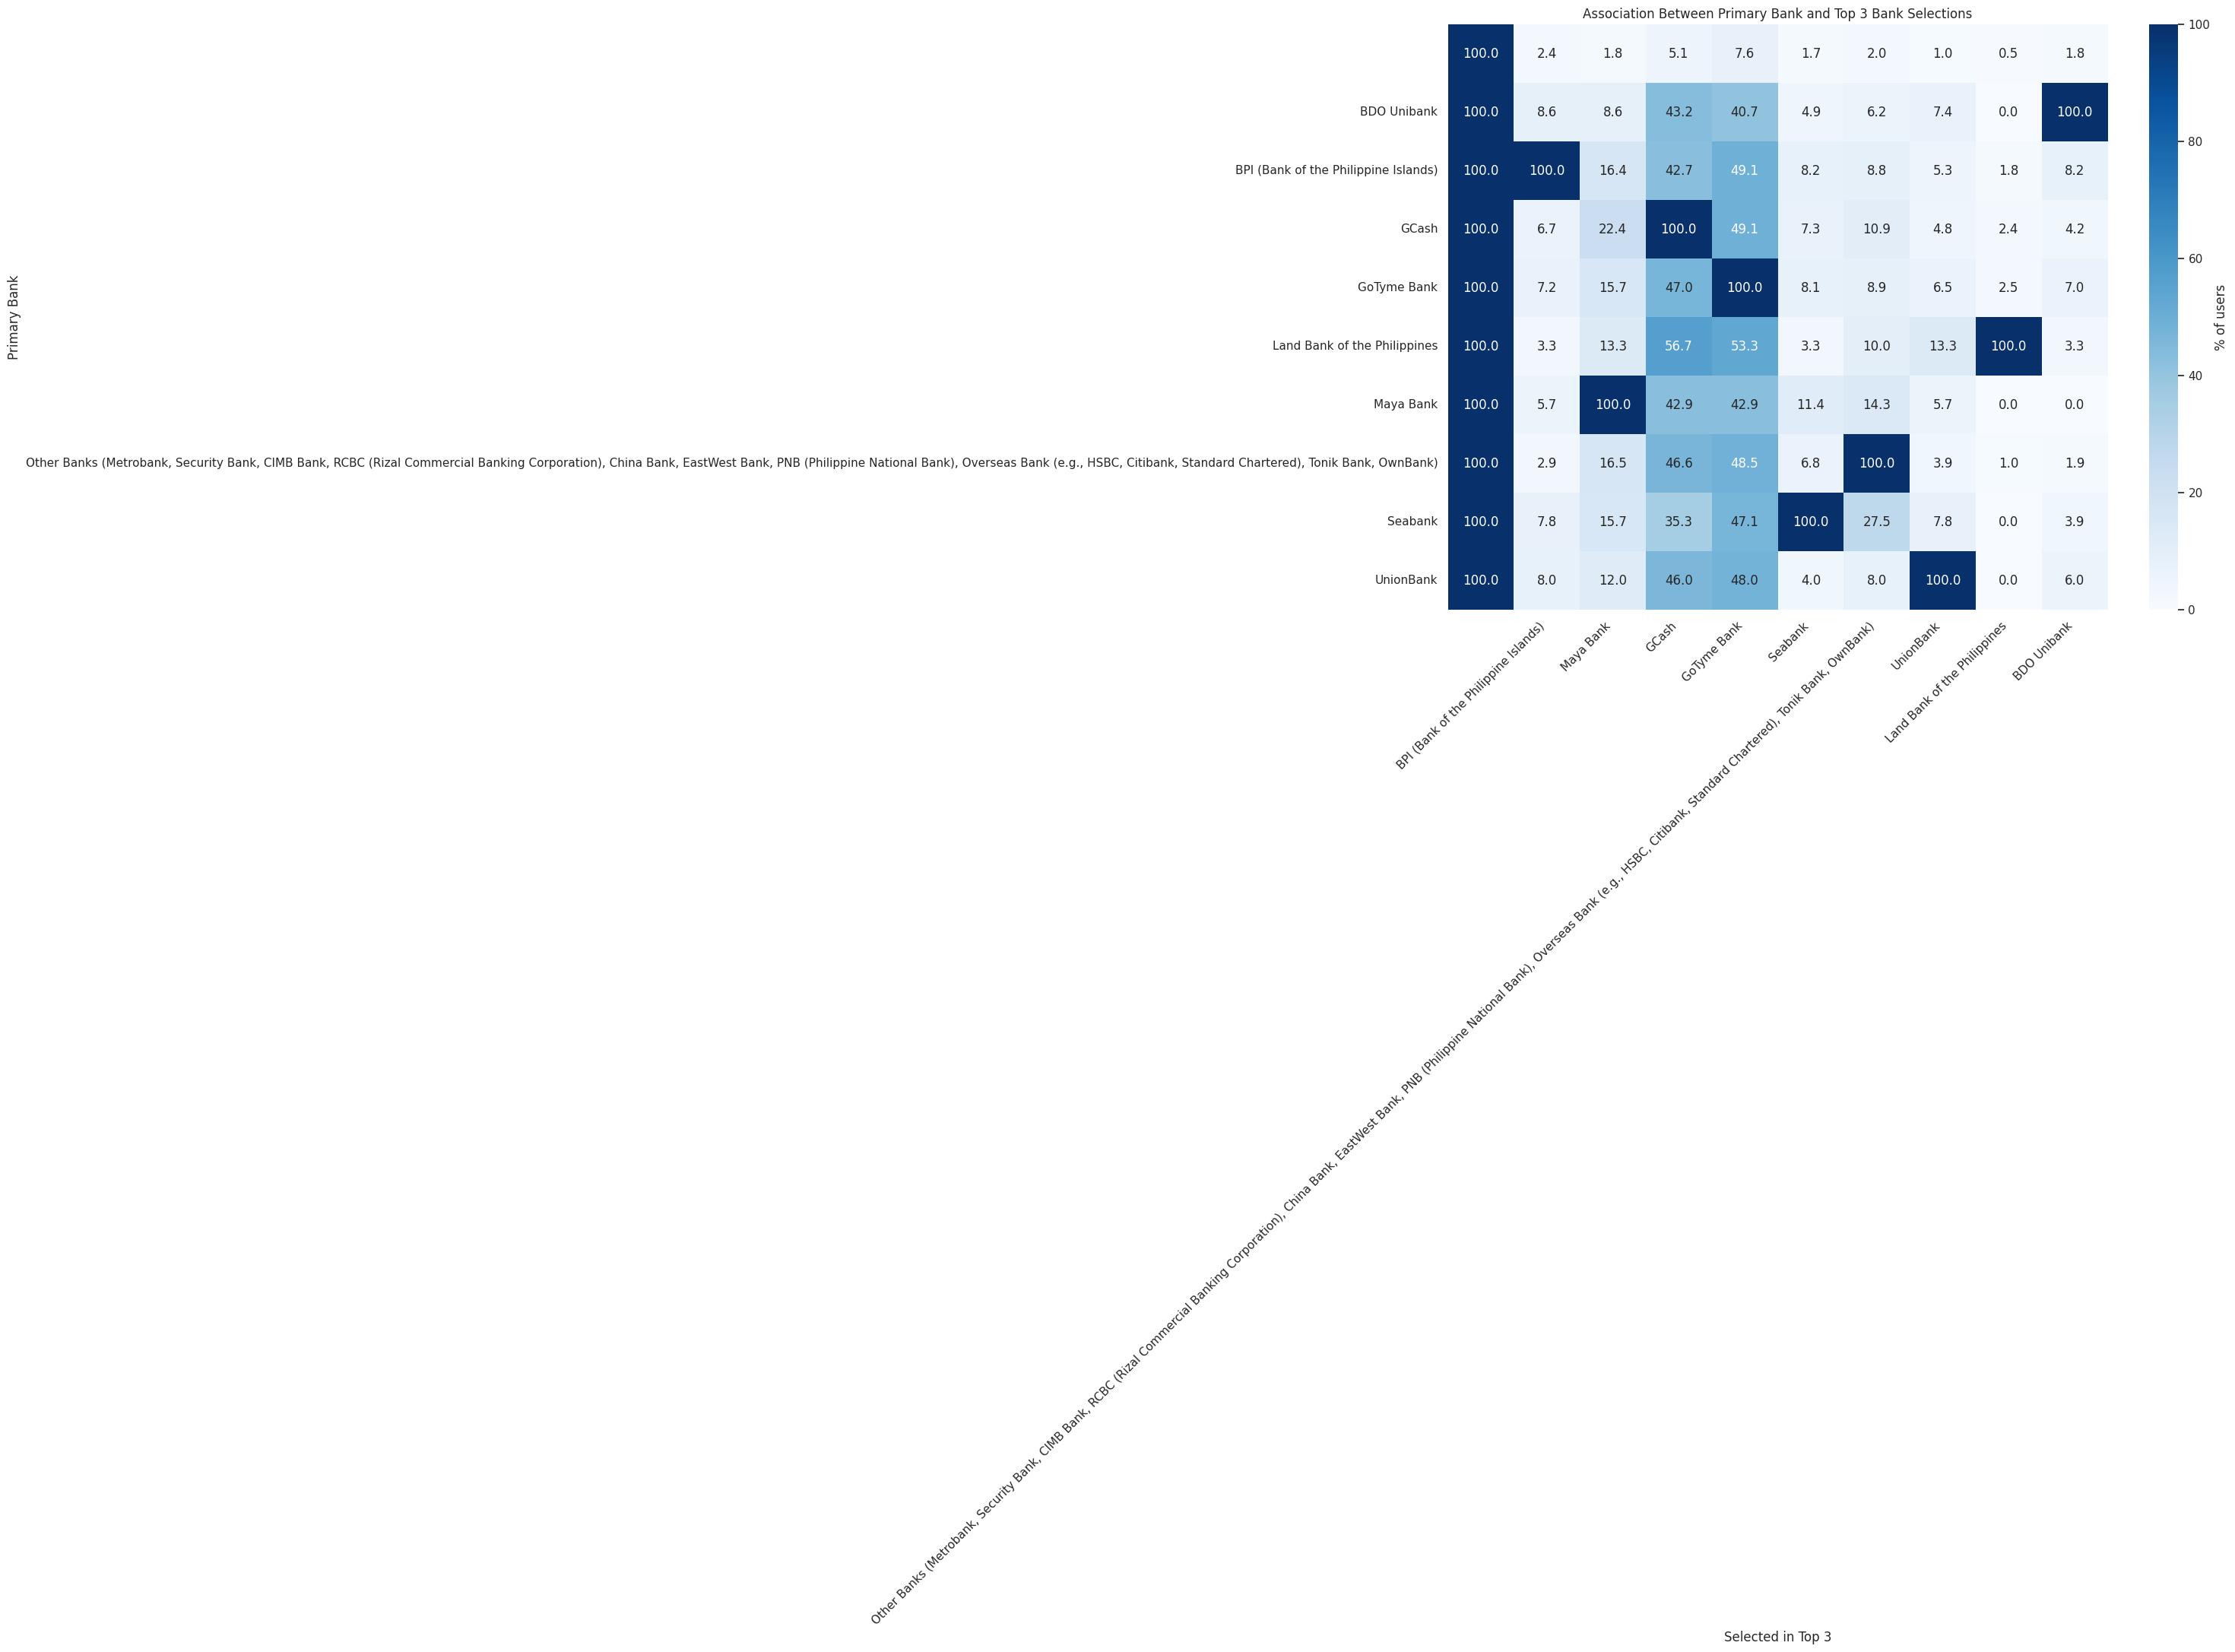

In [193]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Step 1: Define column groups
primary_col = 'Which bank do you consider as your main primary bank? - Response'
top3_cols = [col for col in merged_df.columns if col.startswith('Please select your top 3 primary banks/e-wallet.') and 'None of the above' not in col]

# Step 2: Identify all unique banks mentioned in the top 3 columns
all_selected_banks = pd.Series(merged_df[top3_cols].values.ravel()).dropna().unique()

# Step 3: Create new binary one-hot encoded columns (1 if bank is in any of the top 3 columns)
for bank in all_selected_banks:
    merged_df[f'Top3_{bank}'] = merged_df[top3_cols].apply(lambda row: bank in row.values, axis=1).astype(int)

# Step 4: Generate new top3 binary columns (we'll only use these for the heatmap)
top3_binary_cols = [f'Top3_{bank}' for bank in all_selected_banks]

# Step 5: Create the association matrix (grouped mean = % selected in top 3)
association_matrix = merged_df.groupby(primary_col)[top3_binary_cols].mean() * 100
association_matrix.columns = all_selected_banks  # rename columns for display
association_matrix = association_matrix.round(1)

# Step 6: Plot heatmap
plt.figure(figsize=(14, 10))
sns.heatmap(association_matrix, annot=True, fmt=".1f", cmap="Blues", cbar_kws={'label': '% of users'})
plt.title("Association Between Primary Bank and Top 3 Bank Selections")
plt.xlabel("Selected in Top 3")
plt.ylabel("Primary Bank")
plt.xticks(rotation=45, ha='right')
plt.yticks(rotation=0)
plt.tight_layout()
plt.show()


In [194]:
association_matrix

\
Which bank do you consider as your main primary...          
                                                    100.0   
BDO Unibank                                         100.0   
BPI (Bank of the Philippine Islands)                100.0   
GCash                                               100.0   
GoTyme Bank                                         100.0   
Land Bank of the Philippines                        100.0   
Maya Bank                                           100.0   
Other Banks (Metrobank, Security Bank, CIMB Ban...  100.0   
Seabank                                             100.0   
UnionBank                                           100.0   

                                                    BPI (Bank of the Philippine Islands)  \
Which bank do you consider as your main primary...                                         
                                                                                     2.4   
BDO Unibank                                                                          8.6   
BPI (Bank of the Philippine Islands)                                               100.0   
GCash                                                                                6.7   
GoTyme Bank                                                                          7.2   
Land Bank of the Philippines                                                         3.3   
Maya Bank                                                                            5.7   
Other Banks (Metrobank, Security Bank, CIMB Ban...                                   2.9   
Seabank                                                                              7.8   
UnionBank                                                                            8.0   

                                                    Maya Bank  GCash  \
Which bank do you consider as your main primary...                     
                                                          1.8    5.1   
BDO Unibank                                               8.6   43.2   
BPI (Bank of the Philippine Islands)                     16.4   42.7   
GCash                                                    22.4  100.0   
GoTyme Bank                                              15.7   47.0   
Land Bank of the Philippines                             13.3   56.7   
Maya Bank                                               100.0   42.9   
Other Banks (Metrobank, Security Bank, CIMB Ban...       16.5   46.6   
Seabank                                                  15.7   35.3   
UnionBank                                                12.0   46.0   

                                                    GoTyme Bank  Seabank  \
Which bank do you consider as your main primary...                         
                                                            7.6      1.7   
BDO Unibank                                                40.7      4.9   
BPI (Bank of the Philippine Islands)                       49.1      8.2   
GCash                                                      49.1      7.3   
GoTyme Bank                                               100.0      8.1   
Land Bank of the Philippines                               53.3      3.3   
Maya Bank                                                  42.9     11.4   
Other Banks (Metrobank, Security Bank, CIMB Ban...         48.5      6.8   
Seabank                                                    47.1    100.0   
UnionBank                                                  48.0      4.0   

                                                    Other Banks (Metrobank, Security Bank, CIMB Bank, RCBC (Rizal Commercial Banking Corporation), China Bank, EastWest Bank, PNB (Philippine National Bank), Overseas Bank (e.g., HSBC, Citibank, Standard Chartered), Tonik Bank, OwnBank)  \
Which bank do you consider as your main primary...                                                                                                         

In [195]:
# Step 6: Align both rows and columns to the same bank order
ordered_banks = [
    'BDO Unibank',
    'BPI (Bank of the Philippine Islands)',
    'Metrobank',
    'Land Bank of the Philippines',
    'Security Bank',
    'UnionBank',
    'RCBC (Rizal Commercial Banking Corporation)',
    'China Bank',
    'PNB (Philippine National Bank)',
    'EastWest Bank',
    'GoTyme Bank',
    'Maya Bank',
    'Tonik Bank',
    'CIMB Bank',
    'Overseas Bank (e.g., HSBC, Citibank, Standard Chartered)',
    'Seabank',
    'OwnBank',
    'GCash',
    OTHER_BANKS
]

# Only keep banks present in your matrix
available = [b for b in ordered_banks if b in association_matrix.index]
association_matrix = association_matrix.reindex(index=available, columns=available)


In [196]:
association_matrix

BDO Unibank  \
Which bank do you consider as your main primary...                
BDO Unibank                                               100.0   
BPI (Bank of the Philippine Islands)                        8.2   
Land Bank of the Philippines                                3.3   
UnionBank                                                   6.0   
GoTyme Bank                                                 7.0   
Maya Bank                                                   0.0   
Seabank                                                     3.9   
GCash                                                       4.2   
Other Banks (Metrobank, Security Bank, CIMB Ban...          1.9   

                                                    BPI (Bank of the Philippine Islands)  \
Which bank do you consider as your main primary...                                         
BDO Unibank                                                                          8.6   
BPI (Bank of the Philippine Islands)                                               100.0   
Land Bank of the Philippines                                                         3.3   
UnionBank                                                                            8.0   
GoTyme Bank                                                                          7.2   
Maya Bank                                                                            5.7   
Seabank                                                                              7.8   
GCash                                                                                6.7   
Other Banks (Metrobank, Security Bank, CIMB Ban...                                   2.9   

                                                    Land Bank of the Philippines  \
Which bank do you consider as your main primary...                                 
BDO Unibank                                                                  0.0   
BPI (Bank of the Philippine Islands)                                         1.8   
Land Bank of the Philippines                                               100.0   
UnionBank                                                                    0.0   
GoTyme Bank                                                                  2.5   
Maya Bank                                                                    0.0   
Seabank                                                                      0.0   
GCash                                                                        2.4   
Other Banks (Metrobank, Security Bank, CIMB Ban...                           1.0   

                                                    UnionBank  GoTyme Bank  \
Which bank do you consider as your main primary...                           
BDO Unibank                                               7.4         40.7   
BPI (Bank of the Philippine Islands)                      5.3         49.1   
Land Bank of the Philippines                             13.3         53.3   
UnionBank                                               100.0         48.0   
GoTyme Bank                                               6.5        100.0   
Maya Bank                                                 5.7         42.9   
Seabank                                                   7.8         47.1   
GCash                                                     4.8         49.1   
Other Banks (Metrobank, Security Bank, CIMB Ban...        3.9         48.5   

                                                    Maya Bank  Seabank  GCash  \
Which bank do you consider as your main primary...                              
BDO Unibank                                               8.6      4.9   43.2   
BPI (Bank of the Philippine Islands)                     16.4      8.2   42.7   
Land Bank of the Philippines                             13.3      3.3   56.7   
UnionBank                                                12.0      4.0   46.0   
GoTyme Bank                    

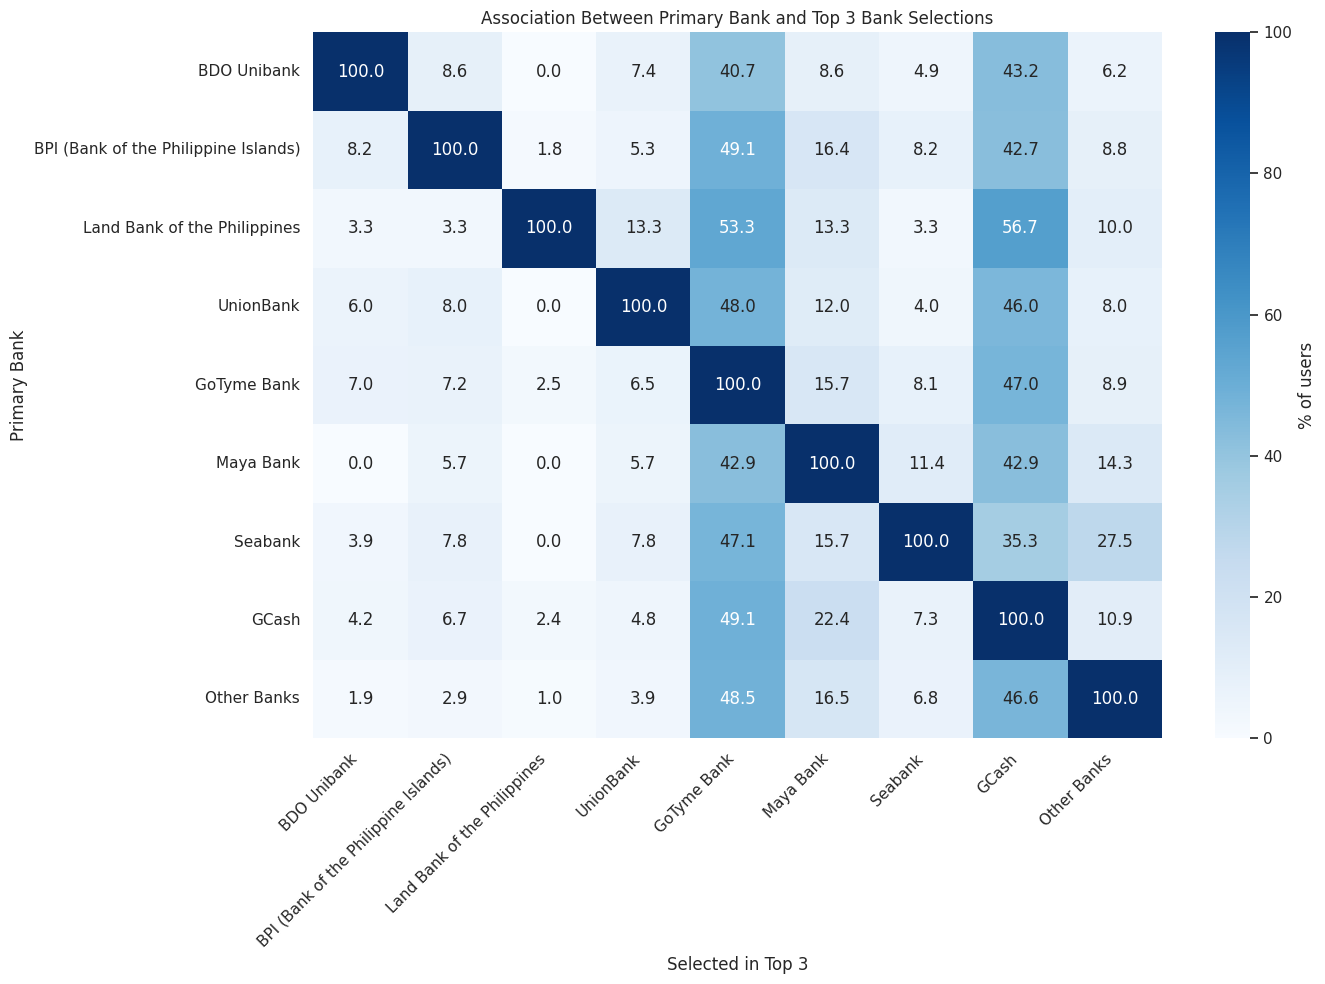

In [197]:
# Step 6: Plot heatmap
# Step 7: Shorten long label for "Other" banks
short_label = "Other Banks"
long_label = OTHER_BANKS

# Rename in both index and columns if present
association_matrix.rename(index={long_label: short_label}, inplace=True)
association_matrix.rename(columns={long_label: short_label}, inplace=True)

plt.figure(figsize=(14, 10))
sns.heatmap(association_matrix, annot=True, fmt=".1f", cmap="Blues", cbar_kws={'label': '% of users'})
plt.title("Association Between Primary Bank and Top 3 Bank Selections")
plt.xlabel("Selected in Top 3")
plt.ylabel("Primary Bank")
plt.xticks(rotation=45, ha='right')
plt.yticks(rotation=0)
plt.tight_layout()
plt.show()

In [198]:
merged_df['Please select your top 3 primary banks/e-wallet. - Overseas Bank (e.g., HSBC, Citibank, Standard Chartered)'].value_counts()

Please select your top 3 primary banks/e-wallet. - Overseas Bank (e.g., HSBC, Citibank, Standard Chartered)
                                                                                                                                                                                                                                            2191
Other Banks (Metrobank, Security Bank, CIMB Bank, RCBC (Rizal Commercial Banking Corporation), China Bank, EastWest Bank, PNB (Philippine National Bank), Overseas Bank (e.g., HSBC, Citibank, Standard Chartered), Tonik Bank, OwnBank)       4
Name: count, dtype: int64

# Primary -Top 5 Association

In [199]:
merged_df['Which bank do you consider as your main primary bank? - Response'].value_counts()

Which bank do you consider as your main primary bank? - Response
                                                                                                                                                                                                                                            867
GoTyme Bank                                                                                                                                                                                                                                 642
BPI (Bank of the Philippine Islands)                                                                                                                                                                                                        171
GCash                                                                                                                                                                                                                                       165
Other Banks (Metrobank, Security Bank, CIMB Bank, RCBC (Rizal Commercial Banking Corporation), China Bank, EastWest Bank, PNB (Philippine National Bank), Overseas Bank (e.g., HSBC, Citibank, Standard Chartered), Tonik Bank, OwnBank)    103
BDO Unibank                                                                                                                                                                                                                                  81
Seabank                                                                                                                                                                                                                                      51
UnionBank                                                                                                                                                                                                                                    50
Maya Bank                                                                                                                                                                                                                                    35
Land Bank of the Philippines                                                                                                                                                                                                                 30
Name: count, dtype: int64

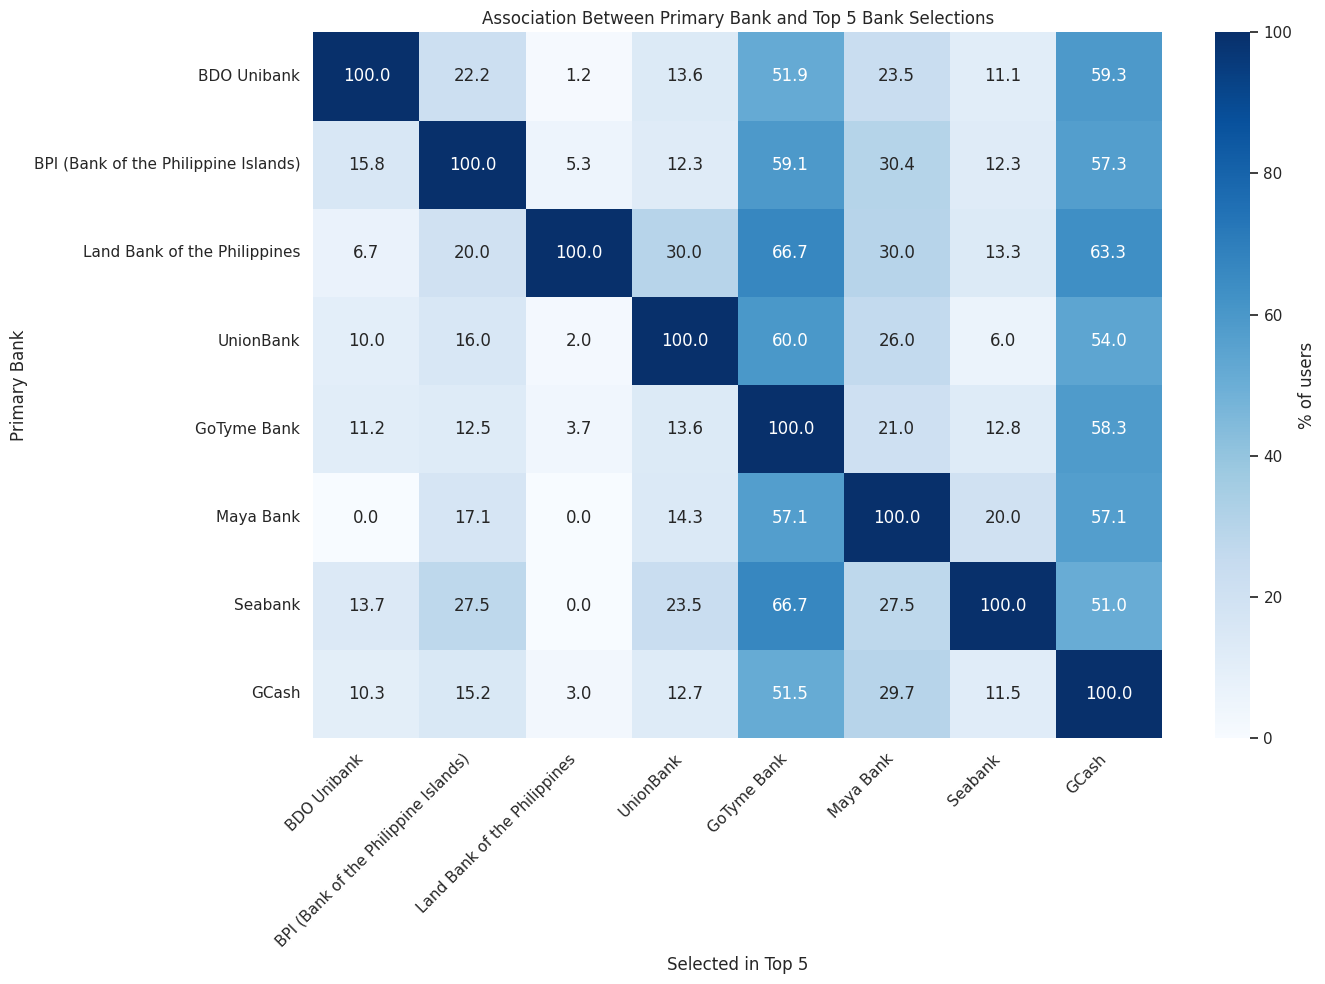

In [200]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Step 1: Define primary column and relevant top 5 columns
primary_col = 'Which bank do you consider as your main primary bank? - Response'
top5_cols = [col for col in merged_df.columns if col.startswith('Please select your top 5 primary banks/e-wallet.') and 'None of the above' not in col]

# Step 2: Extract all unique bank names
all_selected_banks = pd.Series(merged_df[top5_cols].values.ravel()).dropna().unique()

# Step 3: One-hot encode top 5 selection
for bank in all_selected_banks:
    merged_df[f'Top5_{bank}'] = merged_df[top5_cols].apply(lambda row: bank in row.values, axis=1).astype(int)

top5_binary_cols = [f'Top5_{bank}' for bank in all_selected_banks]

# Step 4: Create association matrix
association_matrix = merged_df.groupby(primary_col)[top5_binary_cols].mean() * 100
association_matrix.columns = all_selected_banks
association_matrix = association_matrix.round(1)

# Step 5: Shorten “Other” bank label
long_other_label = OTHER_BANKS
short_other_label = "Other Banks"

association_matrix.rename(columns={long_other_label: short_other_label}, inplace=True)
association_matrix.rename(index={long_other_label: short_other_label}, inplace=True)

# Step 6: Fix row/column ordering
# ordered_banks = [
#     "BDO Unibank",
#     "BPI (Bank of the Philippine Islands)",
#     # "Metrobank",
#     "Land Bank of the Philippines",
#     "UnionBank",
#     "GoTyme Bank",
#     "Maya Bank",
#     "Seabank",
#     "GCash",
#     short_other_label
# ]

# # Reorder rows and columns
# association_matrix = association_matrix.loc[ordered_banks, ordered_banks]

ordered_banks = [
    'BDO Unibank',
    'BPI (Bank of the Philippine Islands)',
    'Metrobank',
    'Land Bank of the Philippines',
    'Security Bank',
    'UnionBank',
    'RCBC (Rizal Commercial Banking Corporation)',
    'China Bank',
    'PNB (Philippine National Bank)',
    'EastWest Bank',
    'GoTyme Bank',
    'Maya Bank',
    'Tonik Bank',
    'CIMB Bank',
    'Overseas Bank (e.g., HSBC, Citibank, Standard Chartered)',
    'Seabank',
    'OwnBank',
    'GCash',
    OTHER_BANKS
]

# Only keep banks present in your matrix
available = [b for b in ordered_banks if b in association_matrix.index]
association_matrix = association_matrix.reindex(index=available, columns=available)

# Step 7: Plot heatmap
plt.figure(figsize=(14, 10))
sns.heatmap(association_matrix, annot=True, fmt=".1f", cmap="Blues", cbar_kws={'label': '% of users'})
plt.title("Association Between Primary Bank and Top 5 Bank Selections")
plt.xlabel("Selected in Top 5")
plt.ylabel("Primary Bank")
plt.xticks(rotation=45, ha='right')
plt.yticks(rotation=0)
plt.tight_layout()
plt.show()


In [201]:
association_matrix

BDO Unibank  \
Which bank do you consider as your main primary...                
BDO Unibank                                               100.0   
BPI (Bank of the Philippine Islands)                       15.8   
Land Bank of the Philippines                                6.7   
UnionBank                                                  10.0   
GoTyme Bank                                                11.2   
Maya Bank                                                   0.0   
Seabank                                                    13.7   
GCash                                                      10.3   

                                                    BPI (Bank of the Philippine Islands)  \
Which bank do you consider as your main primary...                                         
BDO Unibank                                                                         22.2   
BPI (Bank of the Philippine Islands)                                               100.0   
Land Bank of the Philippines                                                        20.0   
UnionBank                                                                           16.0   
GoTyme Bank                                                                         12.5   
Maya Bank                                                                           17.1   
Seabank                                                                             27.5   
GCash                                                                               15.2   

                                                    Land Bank of the Philippines  \
Which bank do you consider as your main primary...                                 
BDO Unibank                                                                  1.2   
BPI (Bank of the Philippine Islands)                                         5.3   
Land Bank of the Philippines                                               100.0   
UnionBank                                                                    2.0   
GoTyme Bank                                                                  3.7   
Maya Bank                                                                    0.0   
Seabank                                                                      0.0   
GCash                                                                        3.0   

                                                    UnionBank  GoTyme Bank  \
Which bank do you consider as your main primary...                           
BDO Unibank                                              13.6         51.9   
BPI (Bank of the Philippine Islands)                     12.3         59.1   
Land Bank of the Philippines                             30.0         66.7   
UnionBank                                               100.0         60.0   
GoTyme Bank                                              13.6        100.0   
Maya Bank                                                14.3         57.1   
Seabank                                                  23.5         66.7   
GCash                                                    12.7         51.5   

                                                    Maya Bank  Seabank  GCash  
Which bank do you consider as your main primary...                             
BDO Unibank                                              23.5     11.1   59.3  
BPI (Bank of the Philippine Islands)                     30.4     12.3   57.3  
Land Bank of the Philippines                             30.0     13.3   63.3  
UnionBank                                                26.0      6.0   54.0  
GoTyme Bank                                              21.0     12.8   58.3  
Maya Bank                                               100.0     20.0   57.1  
Seabank                                                  27.5    100.0   51.0  
GCash                                                    29.7     11.5  100.0